In [22]:
###################### Libraries ###############################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from ast import literal_eval



################################################################

In [23]:
cd

/Users/alondraalvarez


In [24]:
cd Desktop/REU 2025

/Users/alondraalvarez/Desktop/REU 2025


In [25]:
site = "M1"
path = f"{site}_data/"

if site == "M1":
    sample_size = np.arange(0, 132, 1)
    
elif site == "S2":
    sample_size = np.arange(0, 134, 1)

elif site == "S3":
    sample_size = np.arange(0, 121, 1)
    


Open File

In [17]:

num_pos_coefs_of_0 = []
num_pos_coefs_of_1 = []
num_pos_coefs_of_2 = []
num_pos_coefs_of_3 = []
num_pos_coefs_of_4 = []
num_pos_coefs_of_5 = []


data_coef = pd.read_csv(path + f"{site}_resumen_morning_10h.csv")

data_coef = data_coef[['P_P_coef', 
                       'P_T_coef', 
                       'P_H_coef',
                       'T_P_coef',
                       'T_T_coef',
                       'T_H_coef',
                       'H_P_coef',
                       'H_T_coef',
                       'H_H_coef',
                       'P_P_elem',
                       'P_T_elem', 
                       'P_H_elem',
                       'T_P_elem',
                       'T_T_elem',
                       'T_H_elem',
                       'H_P_elem',
                       'H_T_elem',
                       'H_H_elem',
                       
                      ]]

lag_size = np.arange(0, 5+1, 1)

coeficient = ['P_P_coef', 
              'P_T_coef', 
              'P_H_coef',
              'T_P_coef',
              'T_T_coef',
              'T_H_coef',
              'H_P_coef',
              'H_T_coef',
              'H_H_coef']

lag_0, lag_1, lag_2, lag_3, lag_4, lag_5 = [],[],[],[],[],[]

lags=[lag_0, lag_1, lag_2, lag_3, lag_4, lag_5]

#####################################################################################################

met_vars = ["Precipitation", "Temperature", "Specific Humidity"]

a=0
b=0
c=0

for coef, element in enumerate(sample_size):
    
    for i in coeficient:

        print(f"{met_vars[b]}:{coef}")

        numbers = ast.literal_eval(data_coef[i][coef])

        for element in numbers:
            print(element)

            lags[lag_size[a]].append(element)

            a=a+1

        if a == 5+1:
            a = 0
            b = b+1

            if b == 3:
                b = 0


significant_lags = [col for col in data_coef.columns if col.endswith('_elem')]

In [26]:
data_coef = pd.read_csv(path + f"1_min_aerosols/{site}_continuous_rain_periods_aerosols.csv")

significant_lags = [col for col in data_coef.columns if col.endswith('_elem')]


In [27]:
# Saves significant pairs
significant_pairs = {key.replace('_elem', ''): [] for key in significant_lags}

for idx, row in data_coef.iterrows():
    for var_pair in significant_lags:
        
        lags = literal_eval(row[var_pair])        # List of significant coefficients
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        # List of coefficientes

        # Extraer solo los coeficientes en los lags significativos
        lag_coef_pairs = [(lag, coefs[lag]) for lag in lags if lag < len(coefs)]
        significant_pairs[var_pair.replace('_elem', '')].append(lag_coef_pairs)


In [28]:
rows = []

# Iterates over every row in the dataframe
for idx, row in data_coef.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])     
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])      

        for lag in lags:
            if lag < len(coefs):  
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''), 
                    "lag": lag,
                    "coef": coef
                })

significant_df = pd.DataFrame(rows)

# Save file
significant_df.to_csv(path + f"{site}_significant_lags_min_aerosols_coefs.csv", index=False)



In [29]:
significant_df

row_index   var_pair  lag      coef
0             0        P_P    1  0.534302
1             0        P_P    2  0.279920
2             0        T_T    1  0.816956
3             0        T_T    2  0.717519
4             0        T_T    3  0.630513
...         ...        ...  ...       ...
7160        131  aero_aero    1  0.922313
7161        131  aero_aero    2  0.867119
7162        131  aero_aero    3  0.820502
7163        131  aero_aero    4  0.783077
7164        131  aero_aero    5  0.753286

[7165 rows x 4 columns]

In [216]:
################################### Plotting ###############################################

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

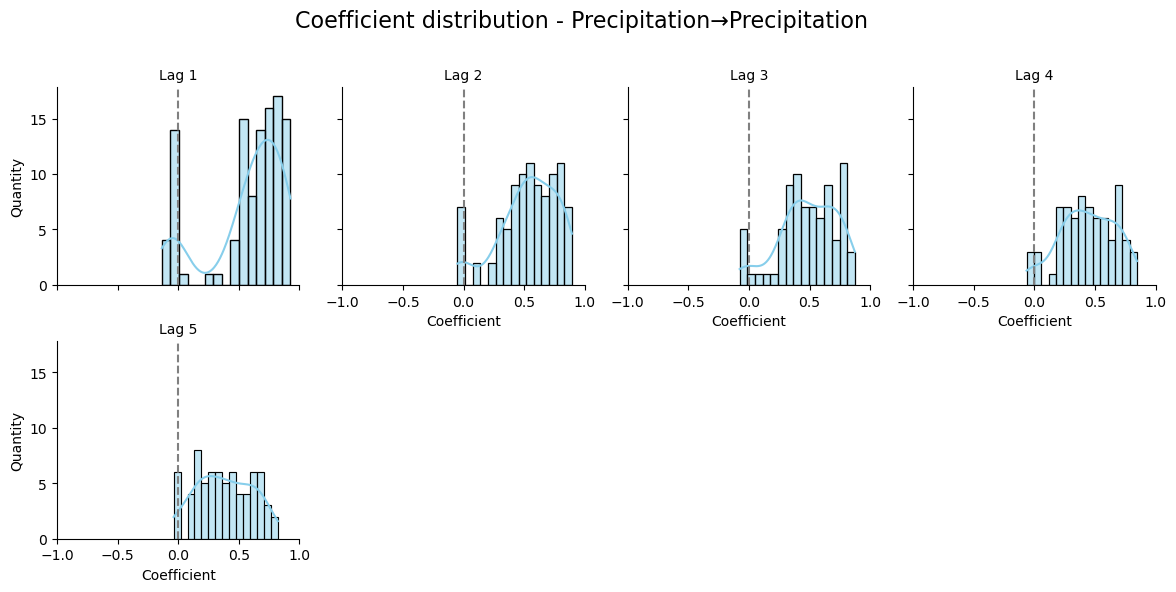

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

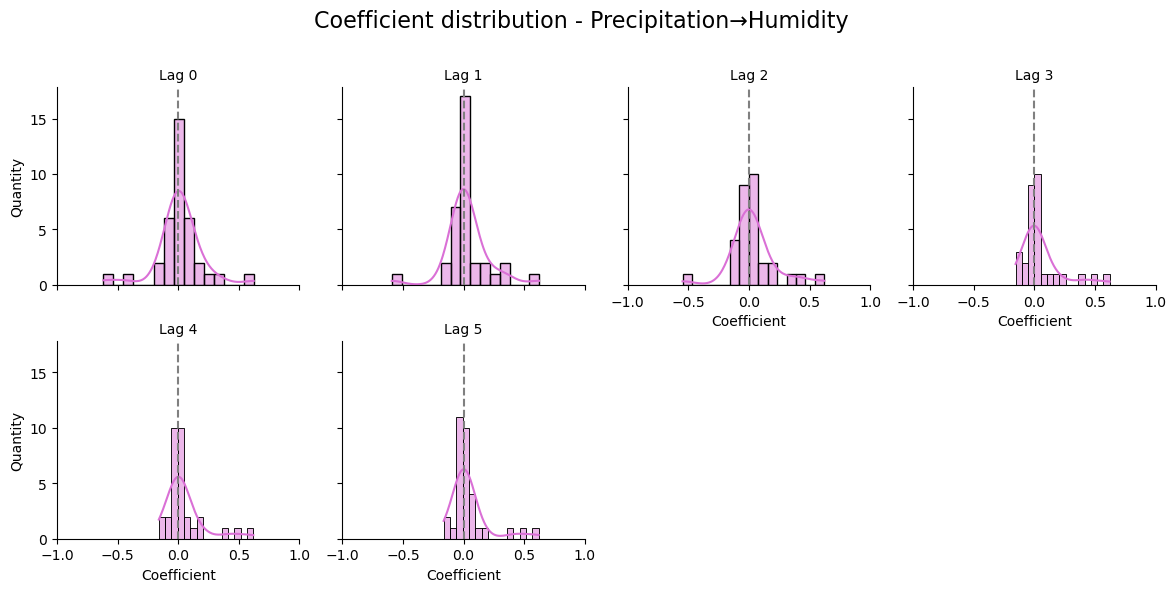

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

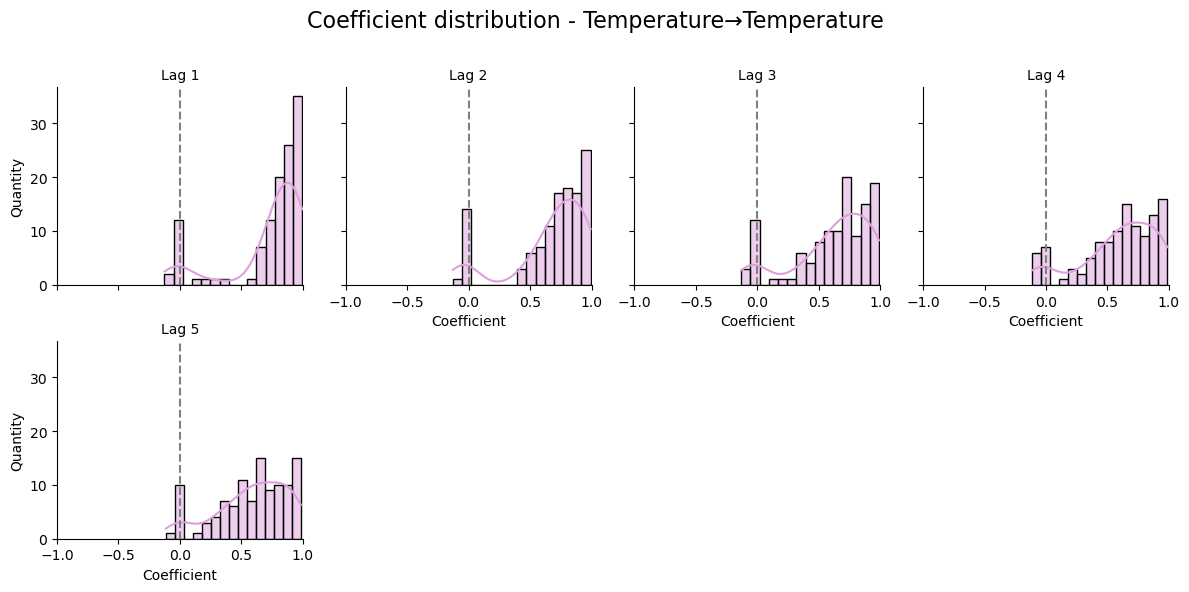

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

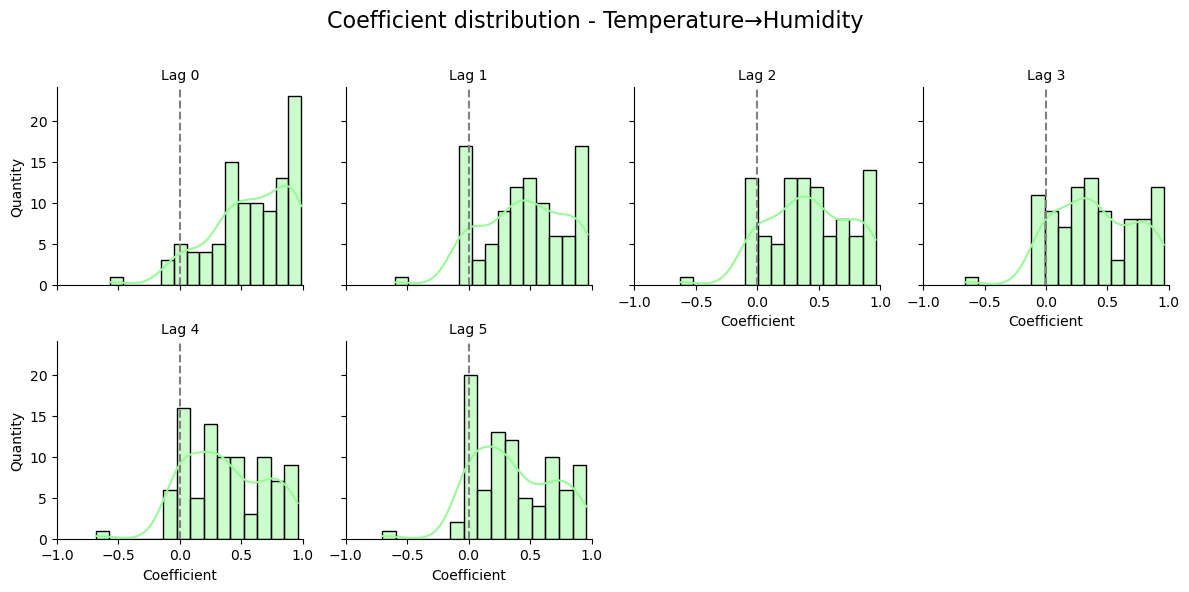

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

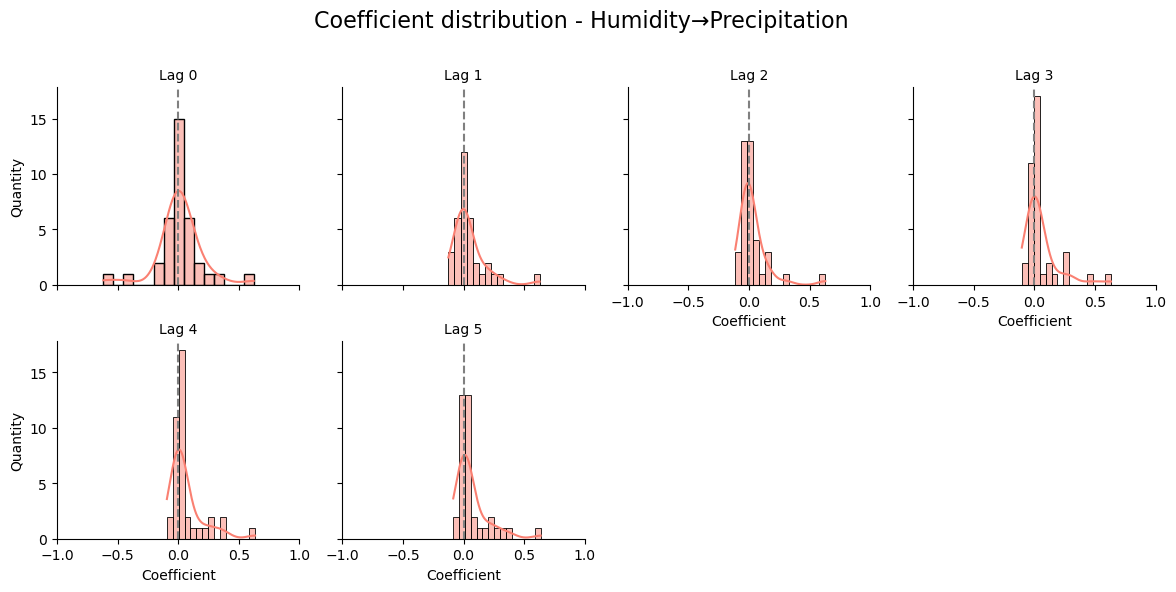

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

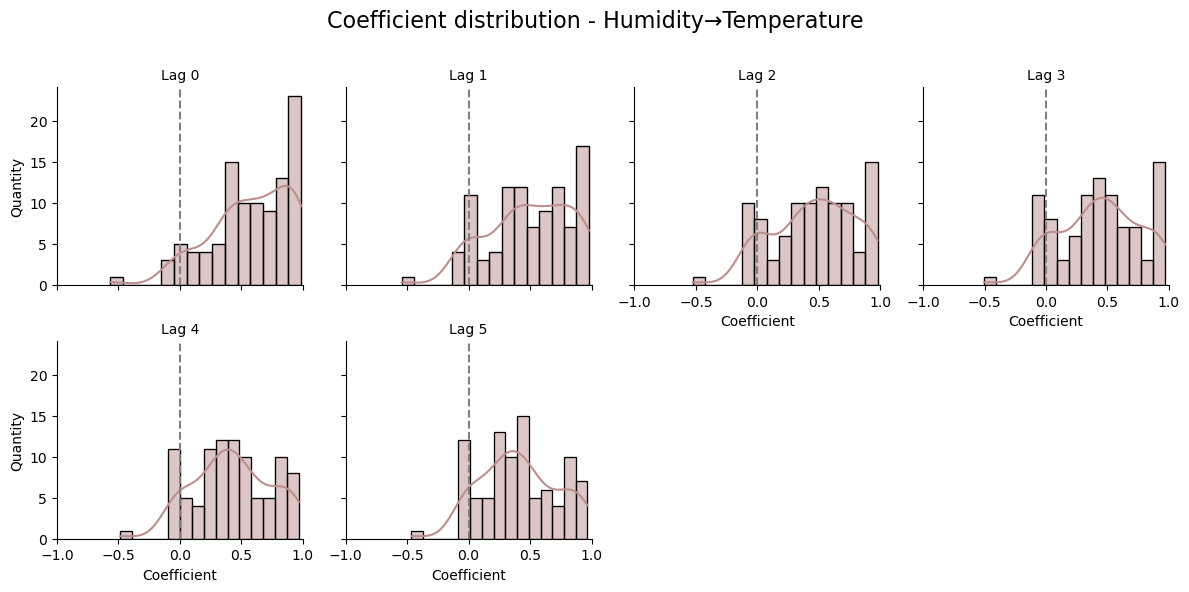

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

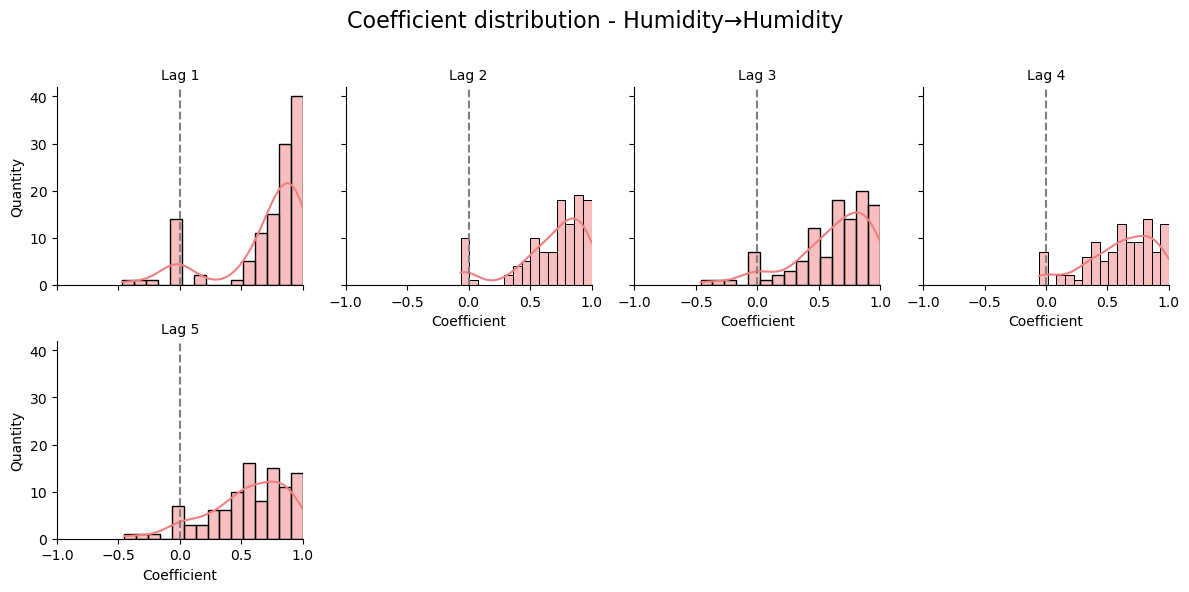

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

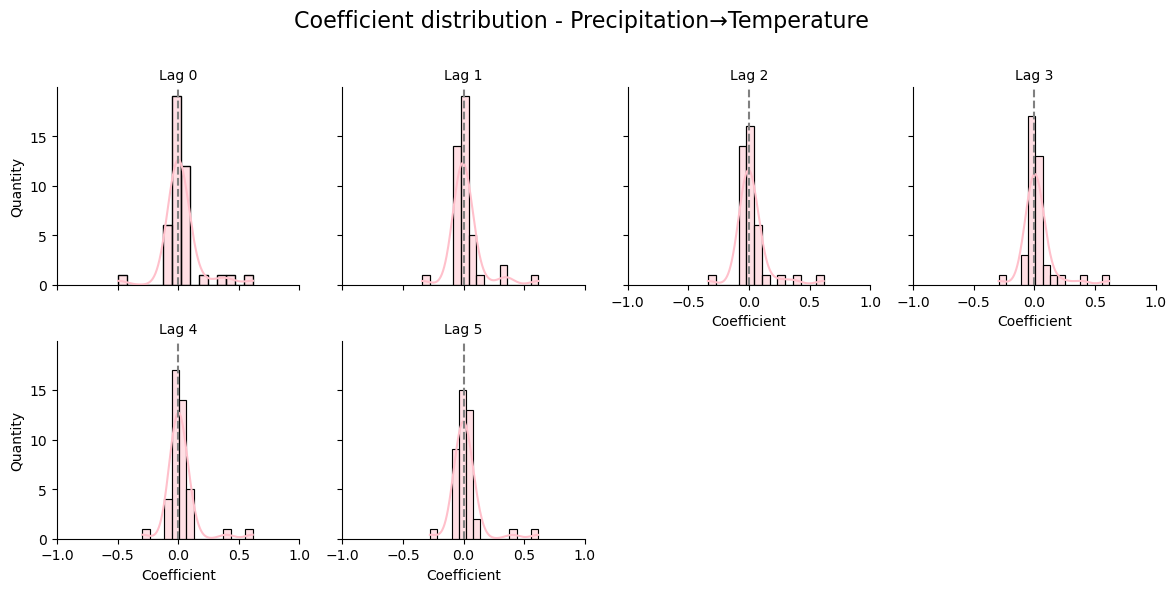

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

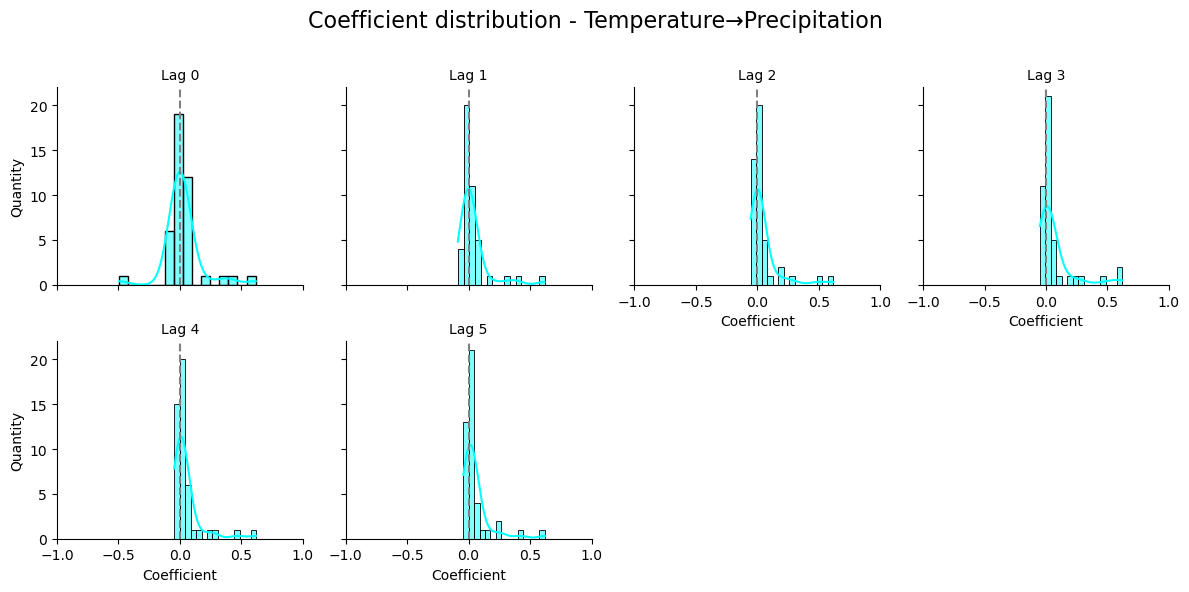

In [10]:
# Variable relations
variable_pairs = significant_df['var_pair'].unique()

relations_vals = ['Precipitation->Precipitation',
                  'Precipitation->Temperature',
                  'Precipitation->Humidity',
                  'Temperature->Precipitation',
                  'Temperature->Temperature',
                  'Temperature->Humidity',
                  'Humidity->Precipitation',
                  'Humidity->Temperature',
                  'Humidity->Humidity',]

colors = ['skyblue',
          'pink',
          'orchid',
          'cyan',
          'plum',
          'palegreen',
          'salmon',
          'rosybrown',
          'lightcoral']

# Diccionario con títulos y colores
pair_metadata = {
    'P_P': {'label': 'Precipitation→Precipitation', 'color': 'skyblue'},
    'P_T': {'label': 'Precipitation→Temperature',   'color': 'pink'},
    'P_H': {'label': 'Precipitation→Humidity',      'color': 'orchid'},
    'T_P': {'label': 'Temperature→Precipitation',   'color': 'cyan'},
    'T_T': {'label': 'Temperature→Temperature',     'color': 'plum'},
    'T_H': {'label': 'Temperature→Humidity',        'color': 'palegreen'},
    'H_P': {'label': 'Humidity→Precipitation',      'color': 'salmon'},
    'H_T': {'label': 'Humidity→Temperature',        'color': 'rosybrown'},
    'H_H': {'label': 'Humidity→Humidity',           'color': 'lightcoral'},
}

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_sh.pdf") as pdf:

    for pair in variable_pairs:
        subset = significant_df[significant_df['var_pair'] == pair]

        # Obtener color y etiqueta del diccionario
        label = pair_metadata[pair]['label']
        color = pair_metadata[pair]['color']

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=color)
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {label}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

        pdf.savefig(g.fig)
        plt.close()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

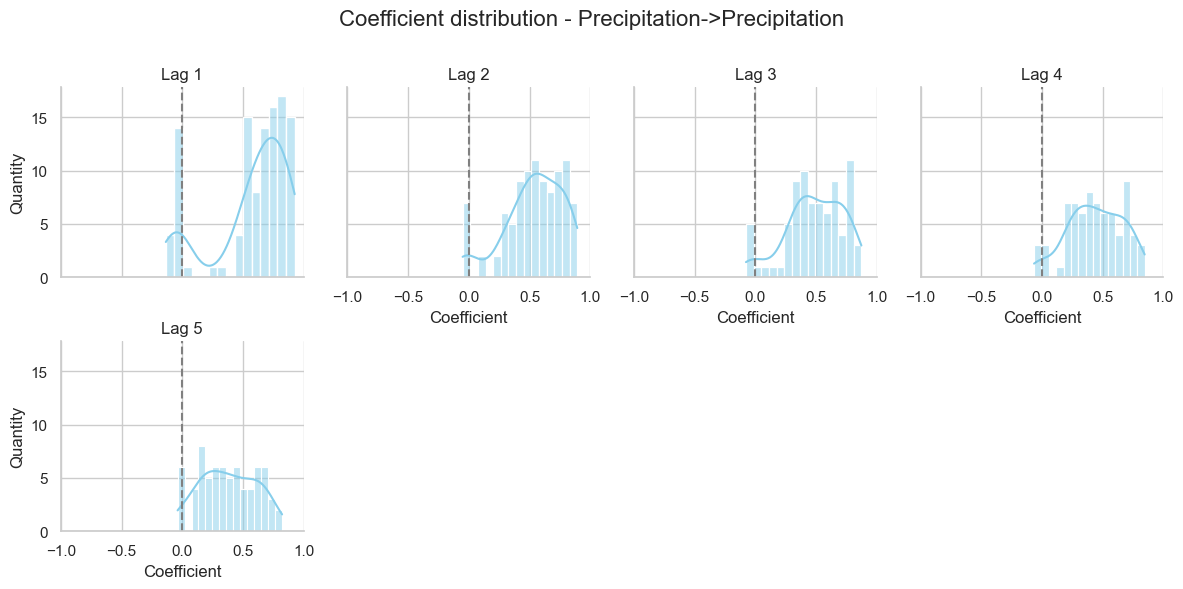

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

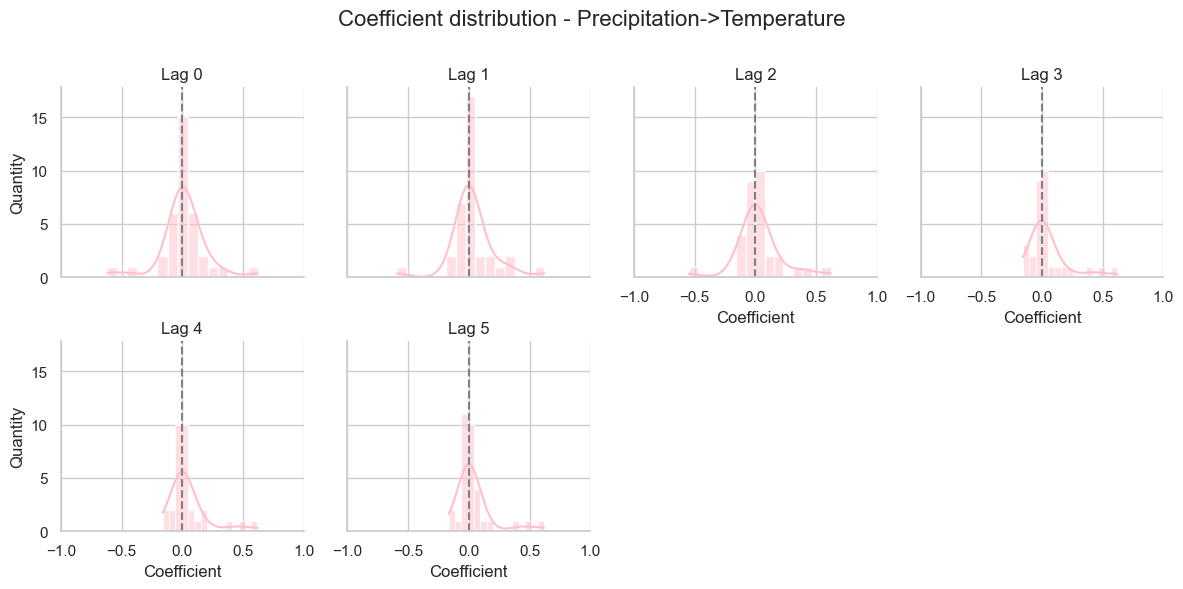

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

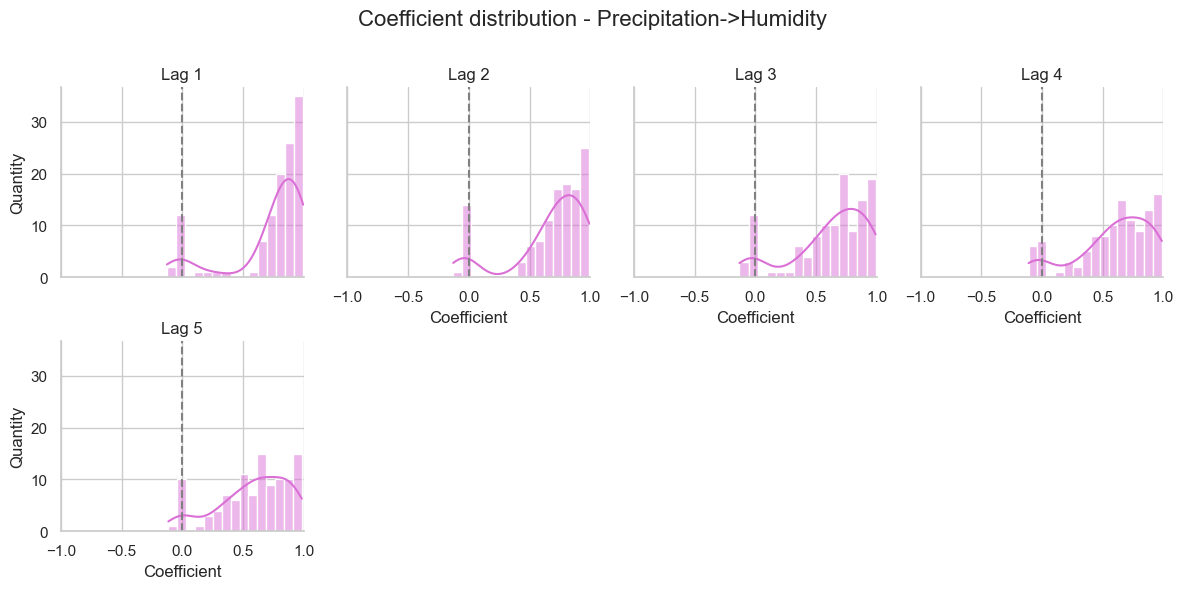

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

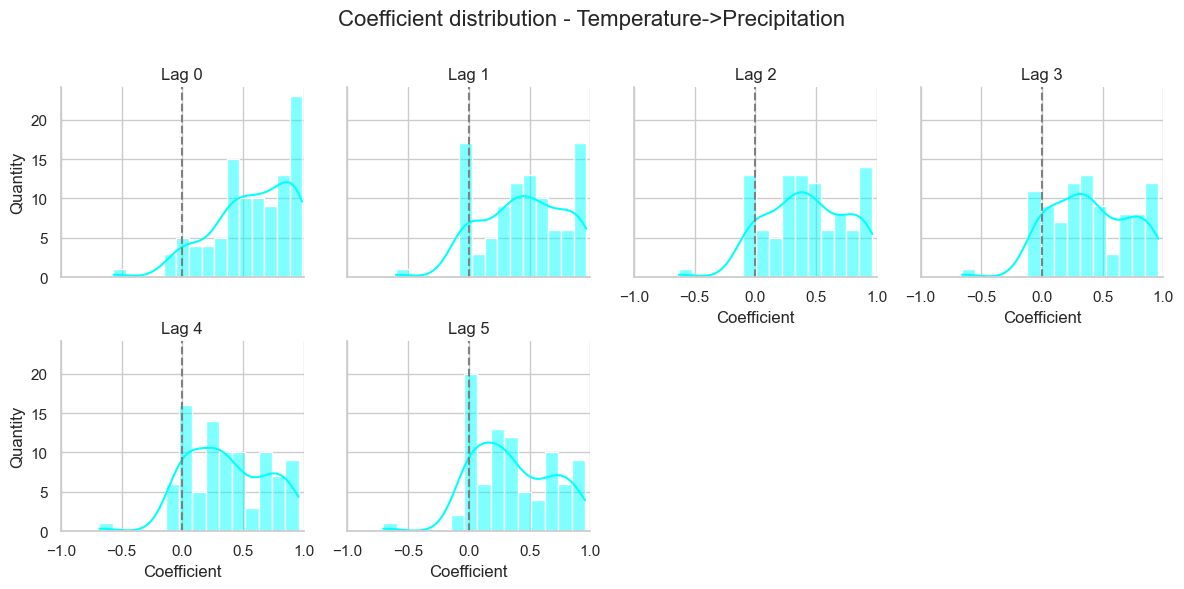

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

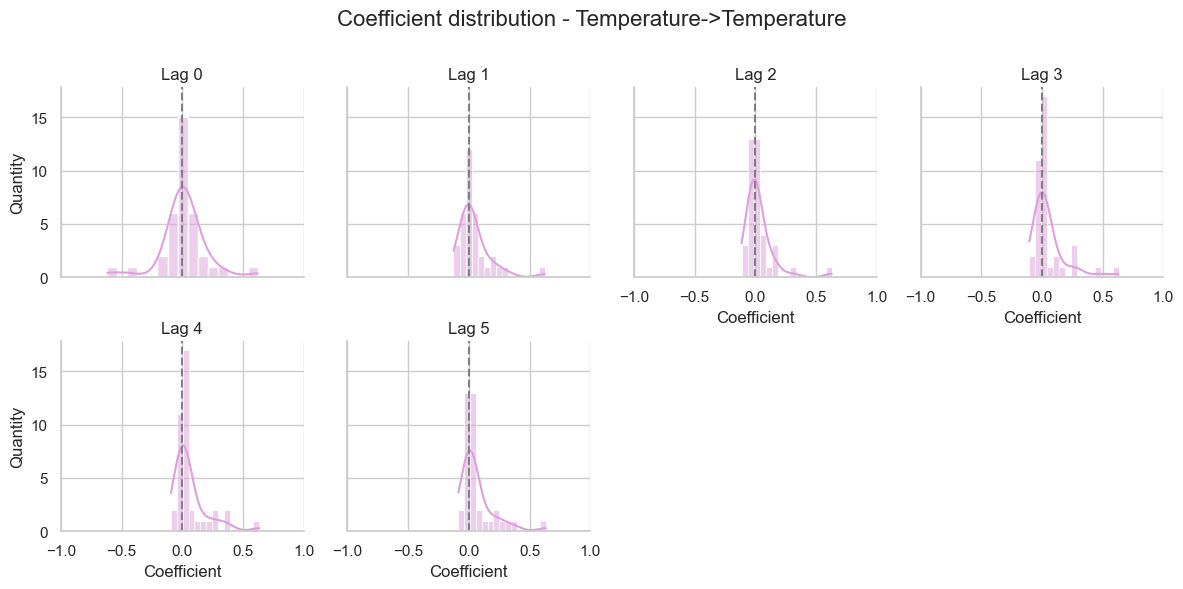

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

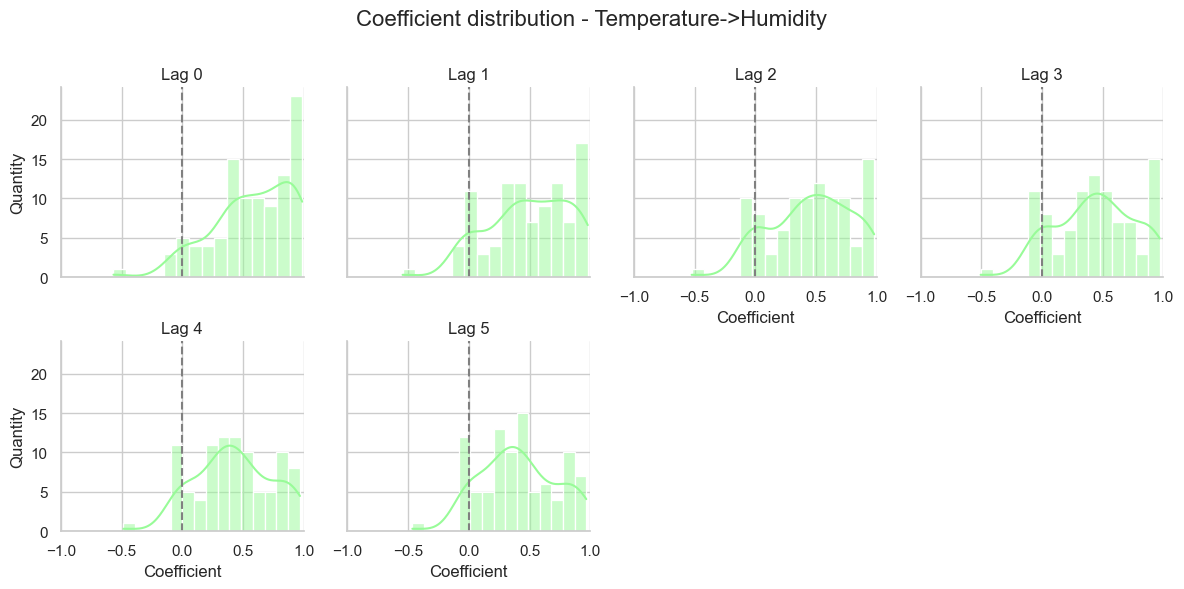

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

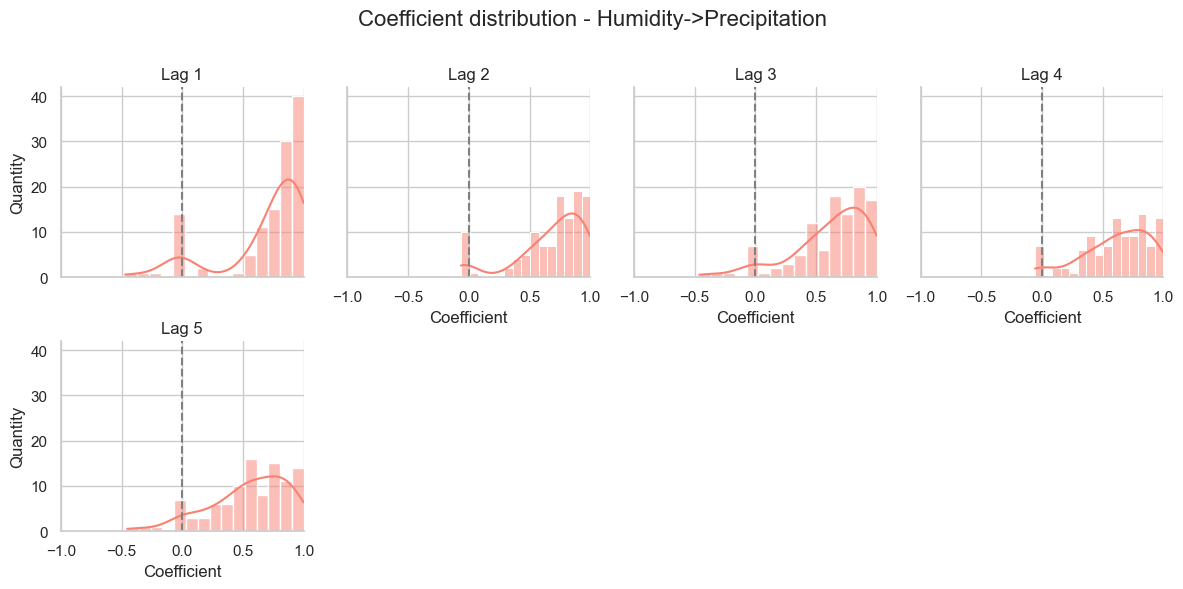

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

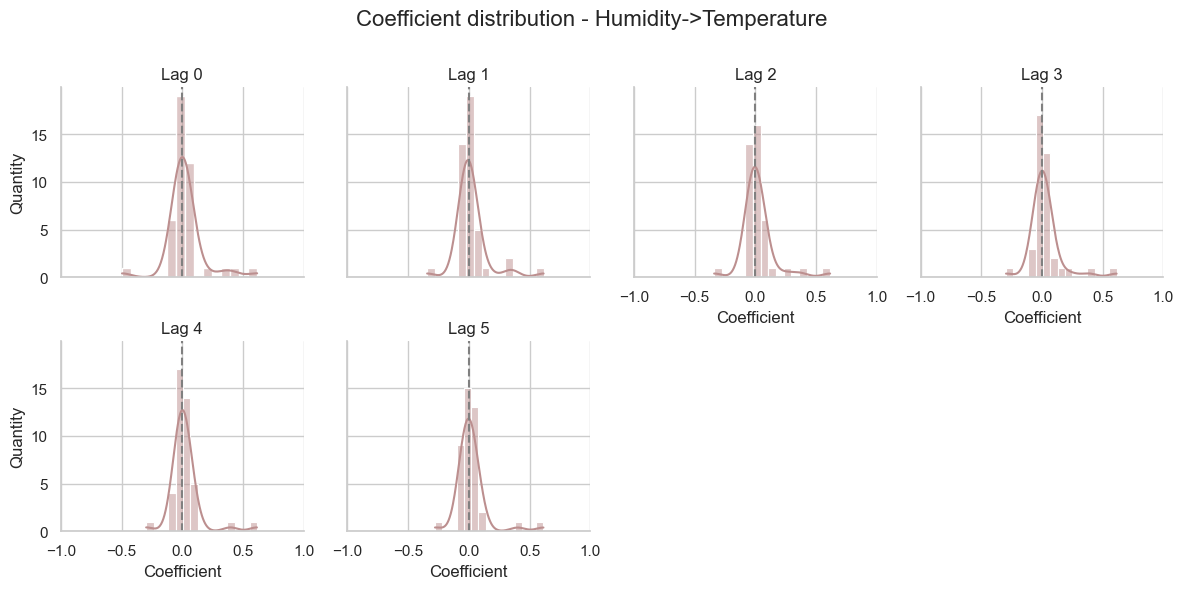

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

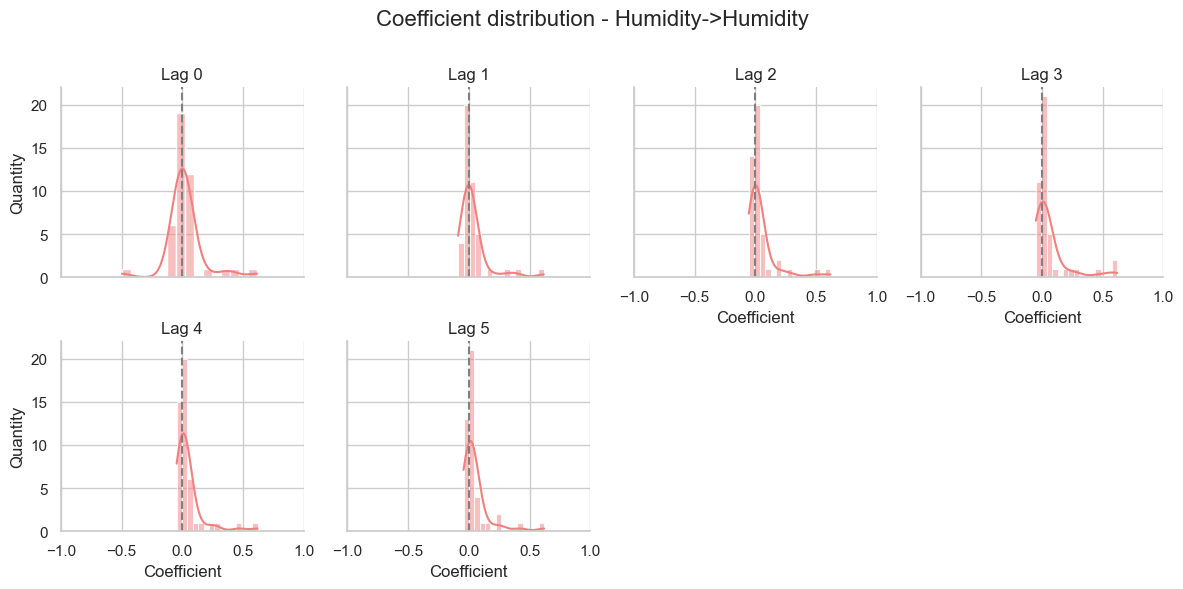

In [235]:
# Variable relations
variable_pairs = significant_df['var_pair'].unique()

relations_vals = ['Precipitation->Precipitation',
                  'Precipitation->Temperature',
                  'Precipitation->Humidity',
                  'Temperature->Precipitation',
                  'Temperature->Temperature',
                  'Temperature->Humidity',
                  'Humidity->Precipitation',
                  'Humidity->Temperature',
                  'Humidity->Humidity',]

colors = ['skyblue',
          'pink',
          'orchid',
          'cyan',
          'plum',
          'palegreen',
          'salmon',
          'rosybrown',
          'lightcoral']

################################### Plotting ###############################################
sns.set(style="whitegrid")

a=0

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_sh.pdf") as pdf:

    for pair in variable_pairs:
        subset = significant_df[significant_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()
        
        # Save 
        pdf.savefig(g.fig)
        plt.close()



        a=a+1


In [218]:
#############################################################################################################

# Include rain events with a threshold

In [236]:

data_coef = pd.read_csv(path + f"{site}_continuous_rain_periods.csv")

# Variable relations
variable_pairs = significant_df['var_pair'].unique()

relations_vals = ['Precipitation->Precipitation',
                  'Precipitation->Temperature',
                  'Precipitation->Humidity',
                  'Temperature->Precipitation',
                  'Temperature->Temperature',
                  'Temperature->Humidity',
                  'Humidity->Precipitation',
                  'Humidity->Temperature',
                  'Humidity->Humidity',]

colors = ['skyblue',
          'pink',
          'orchid',
          'cyan',
          'plum',
          'palegreen',
          'salmon',
          'rosybrown',
          'lightcoral']



# <font color='red'>*Events One Hours or lower*</font>

In [237]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[data_coef["extended_duration_min"]/2 <= 60].copy()

# Now run the same logic as before to extract significant lags and coefs
rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

num_eventos = len(filtered_precip_data)

print(f"There are {num_eventos} rain events an hour or lower")

There are 72 rain events an hour or lower


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

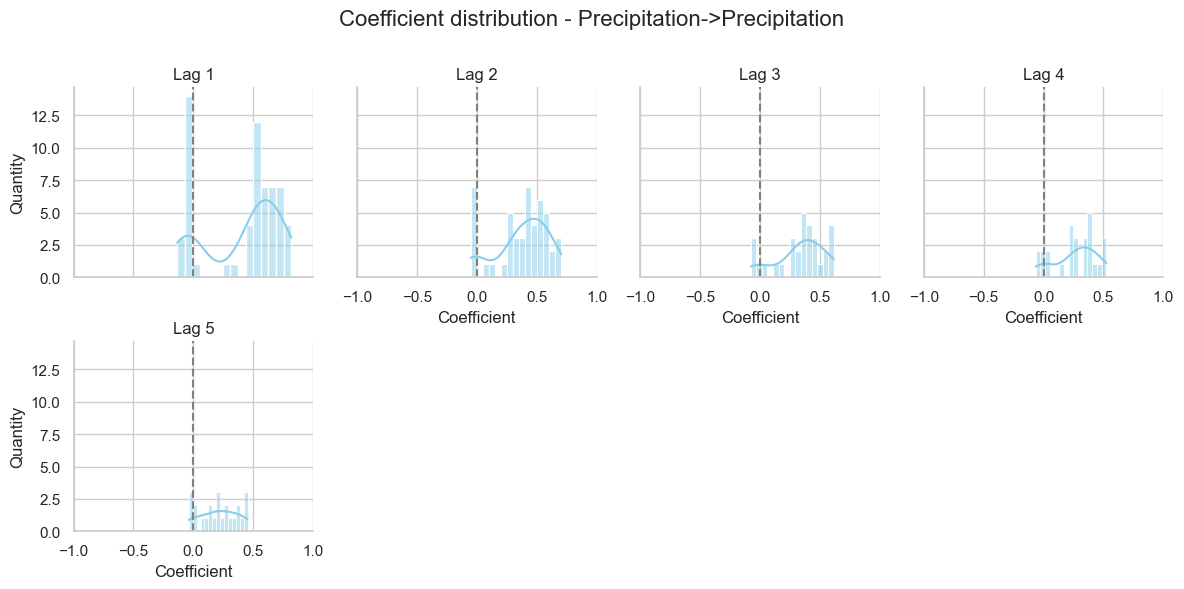

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

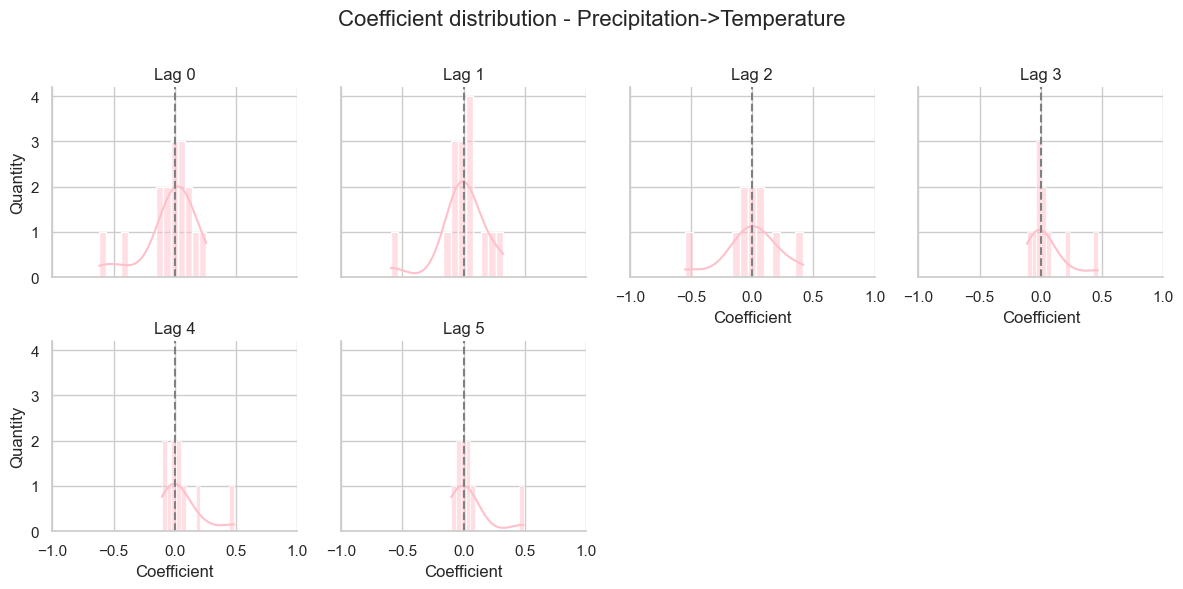

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

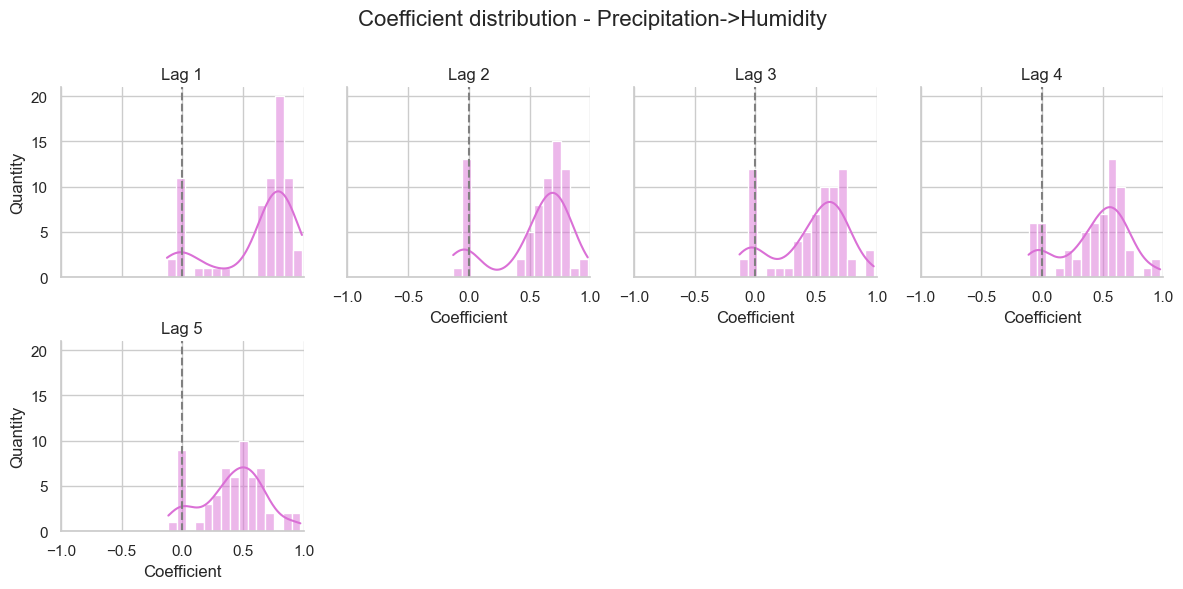

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

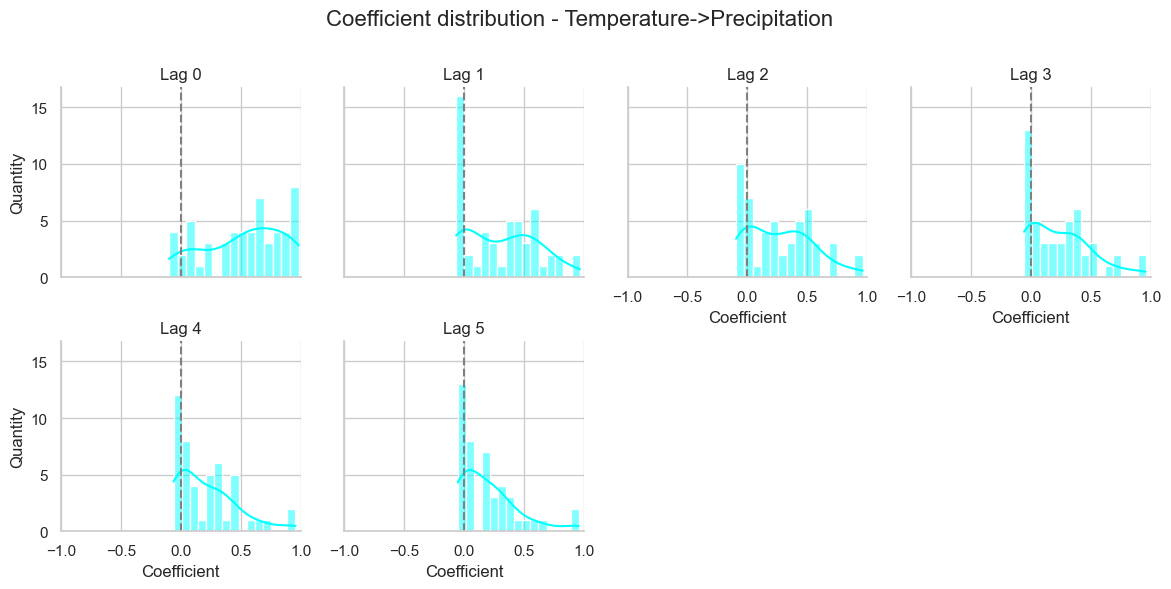

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

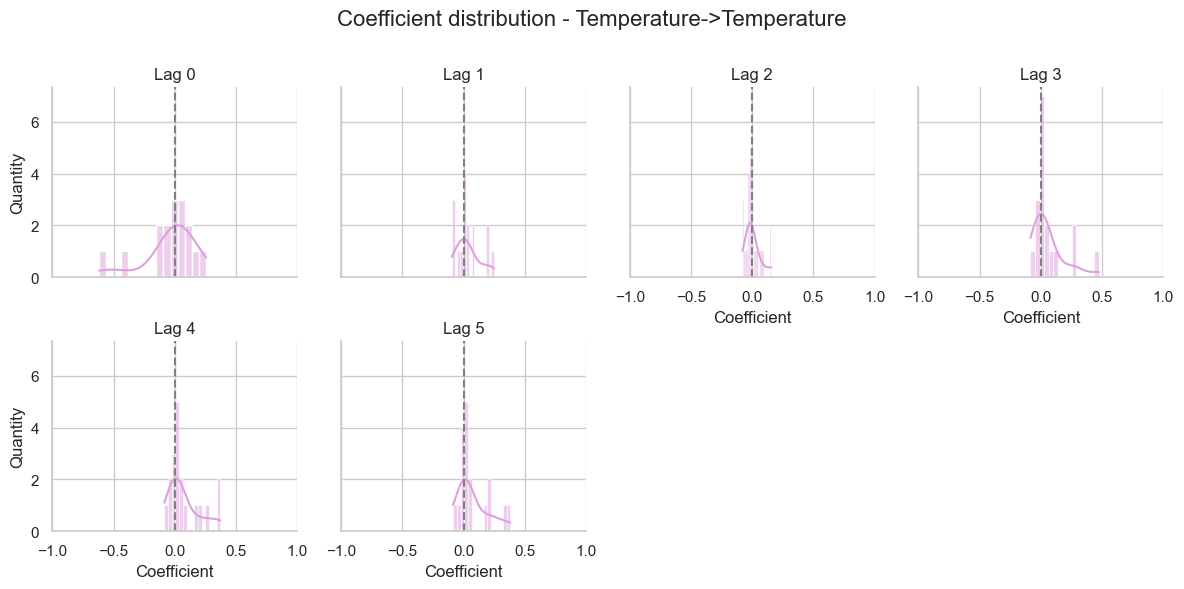

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

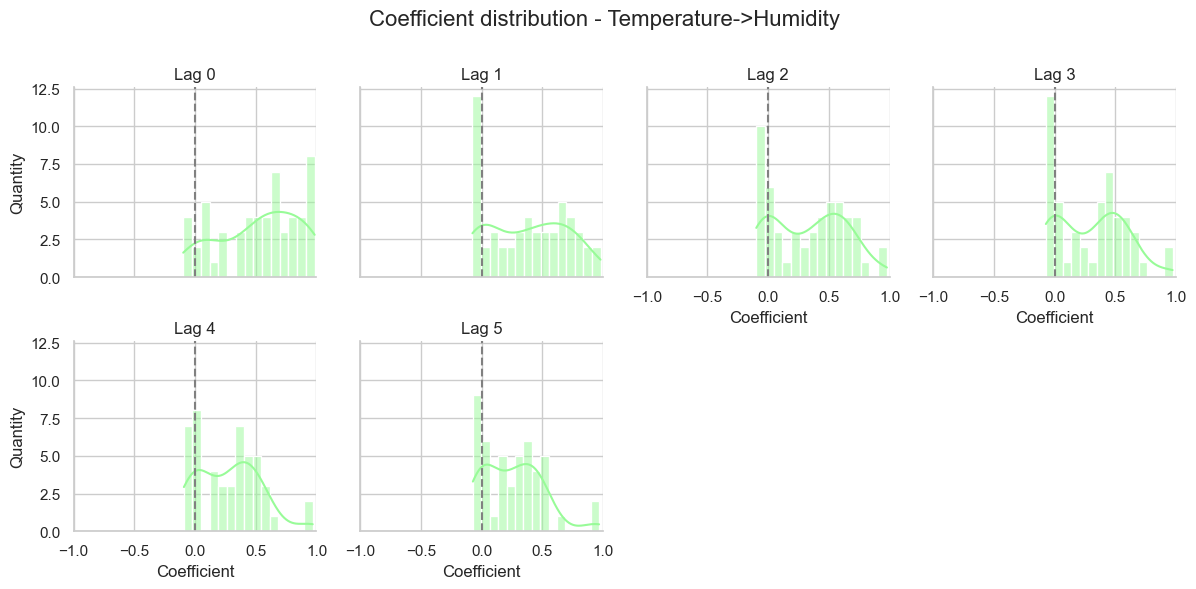

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

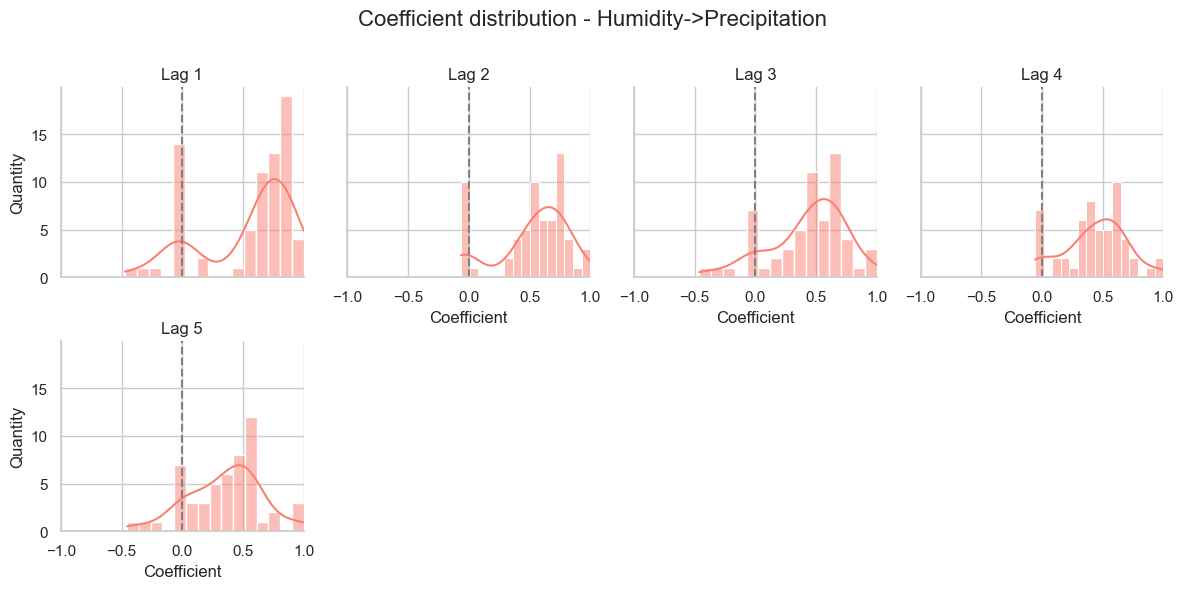

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

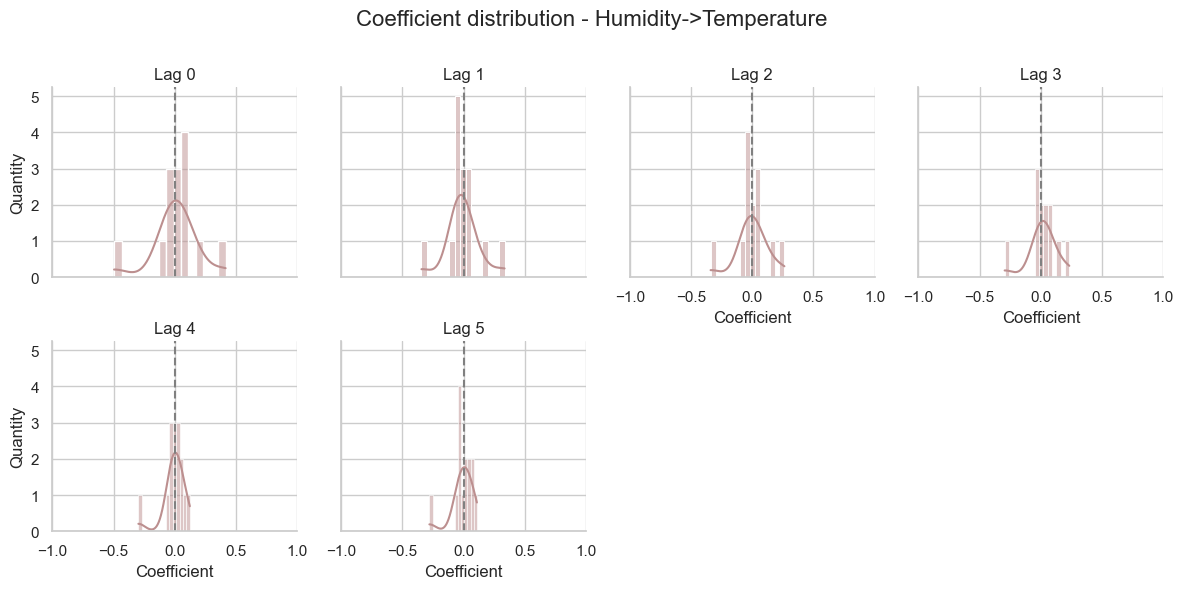

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

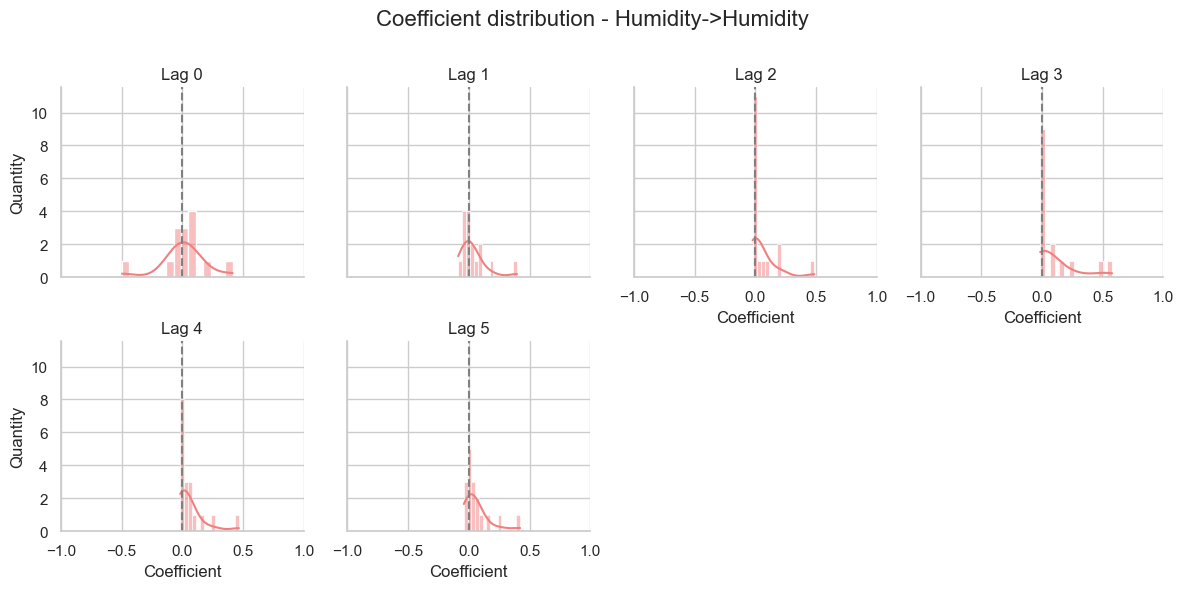

In [238]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_less_1hour.pdf") as pdf:

    summary_rows = []
    
    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_less_1hour.csv", index=False)


# <font color='red'>*Events higher than One Hour*</font>

In [239]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[data_coef["extended_duration_min"]/2 > 60].copy()

# Now run the same logic as before to extract significant lags and coefs
rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

In [240]:
num_eventos = len(filtered_precip_data)

print(f"There are {num_eventos} rain events an hour or higher")

There are 49 rain events an hour or higher


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

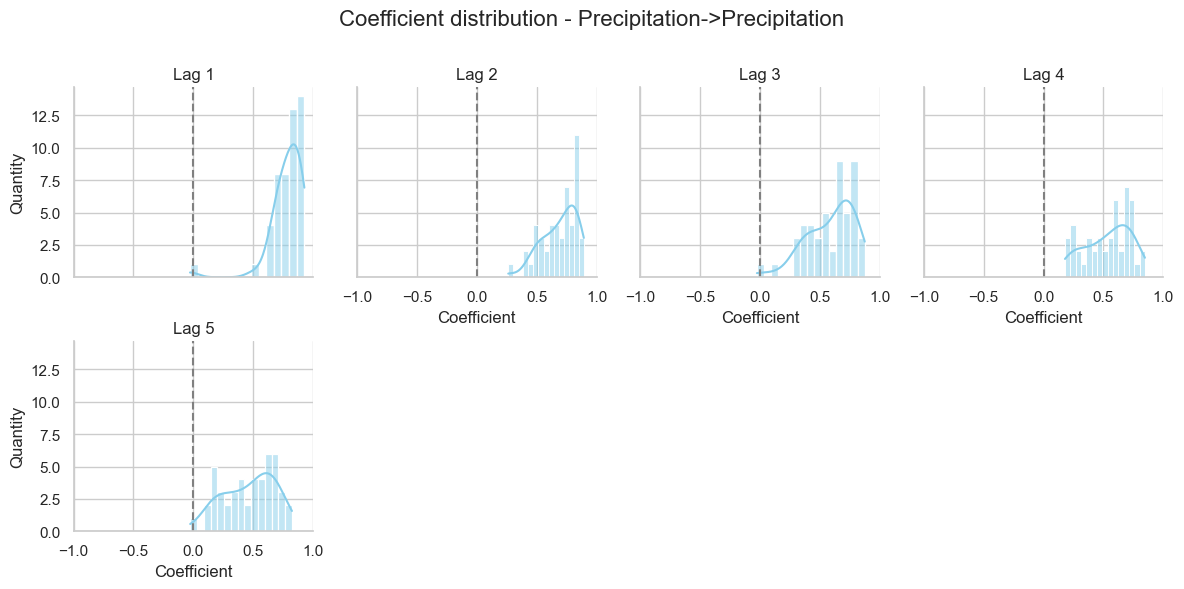

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

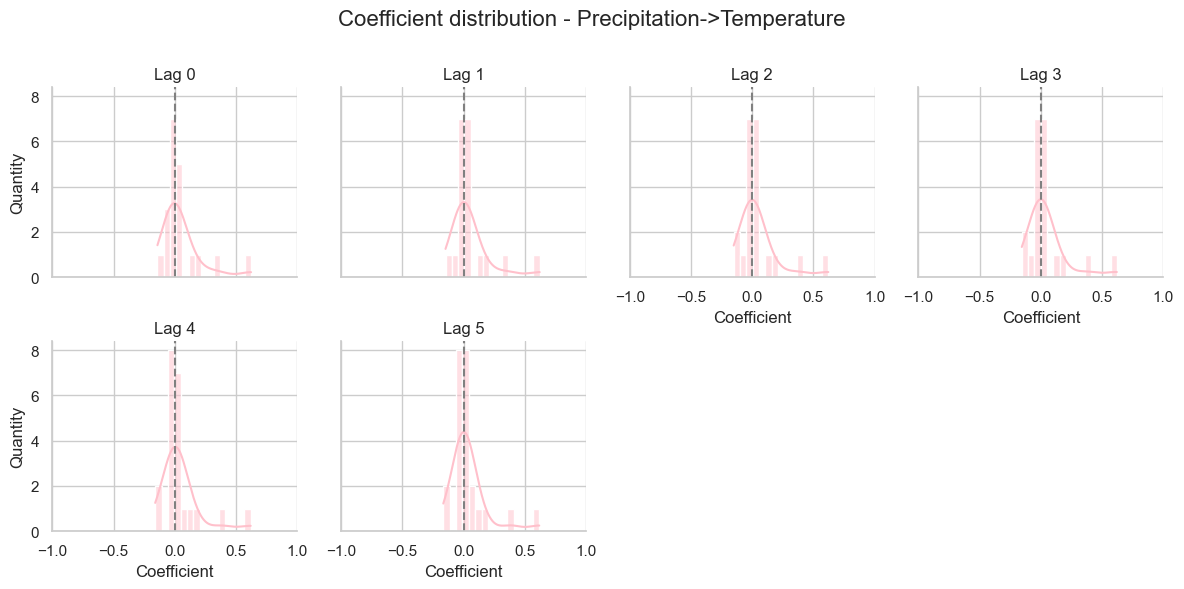

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

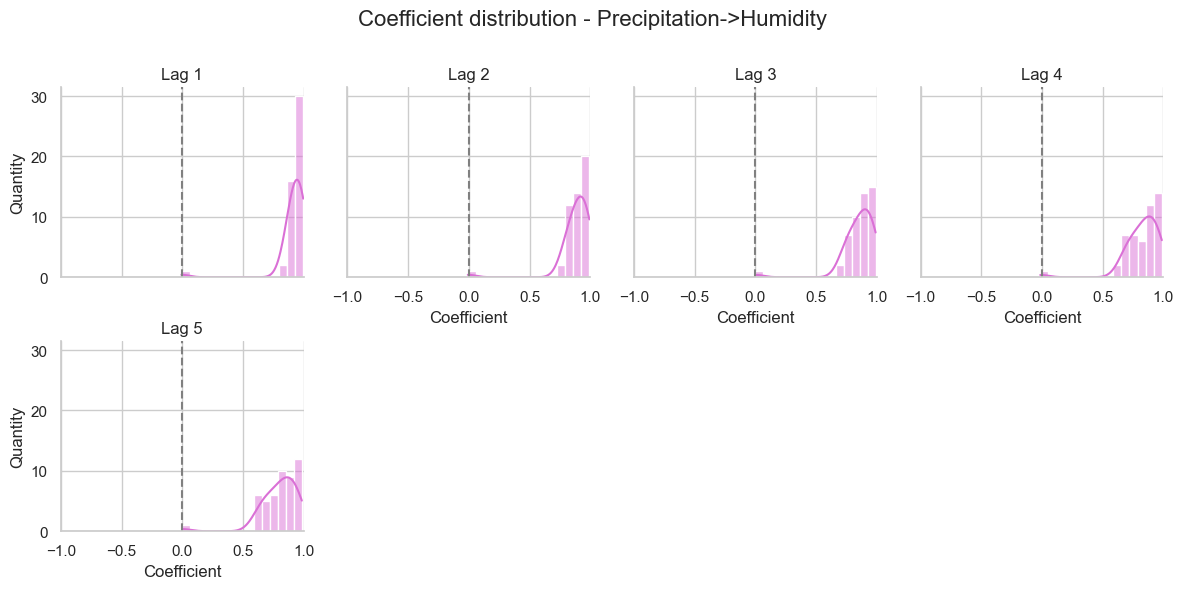

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

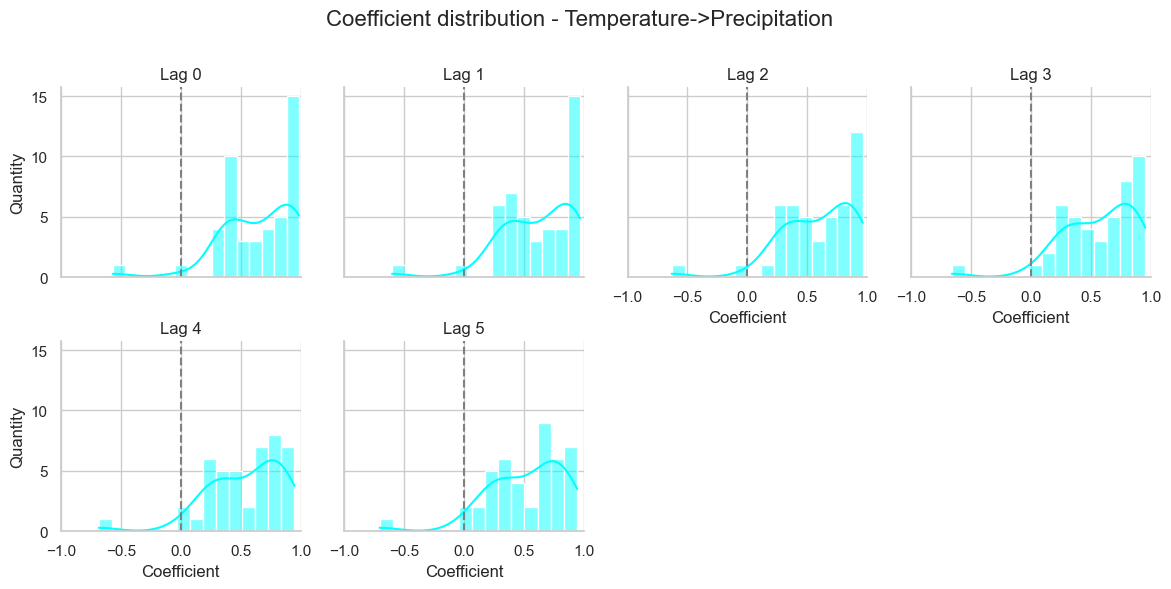

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

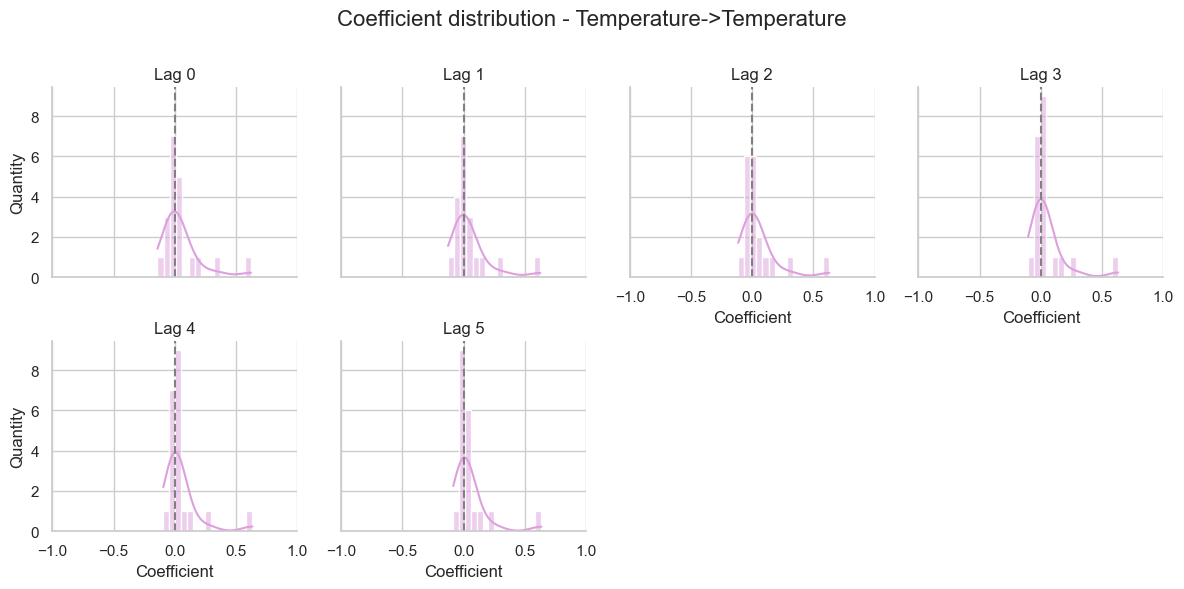

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

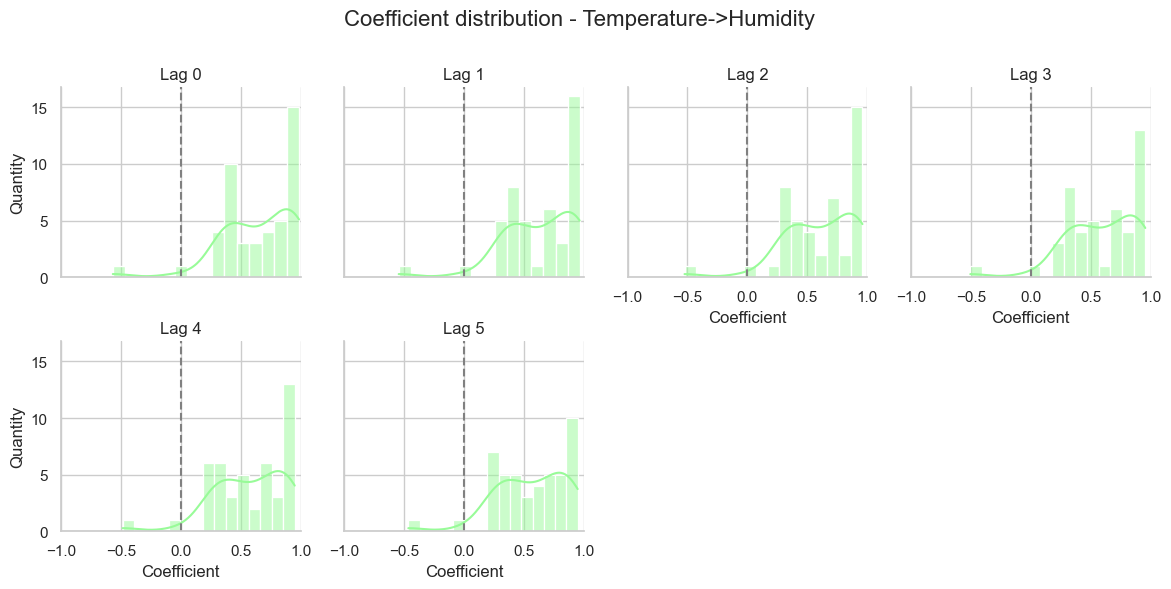

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

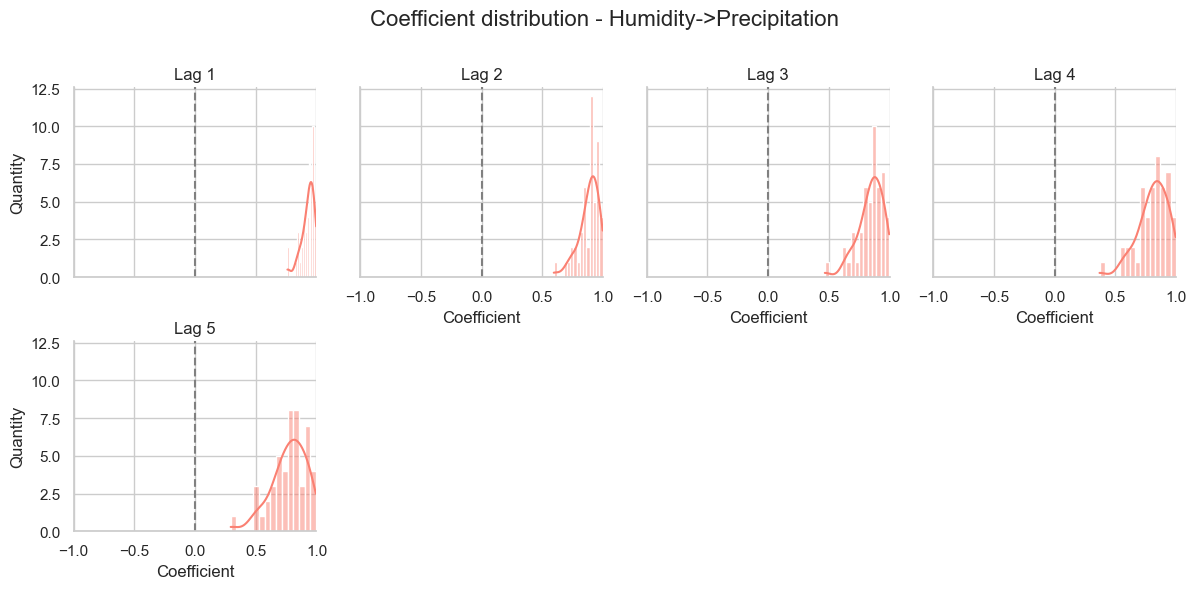

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

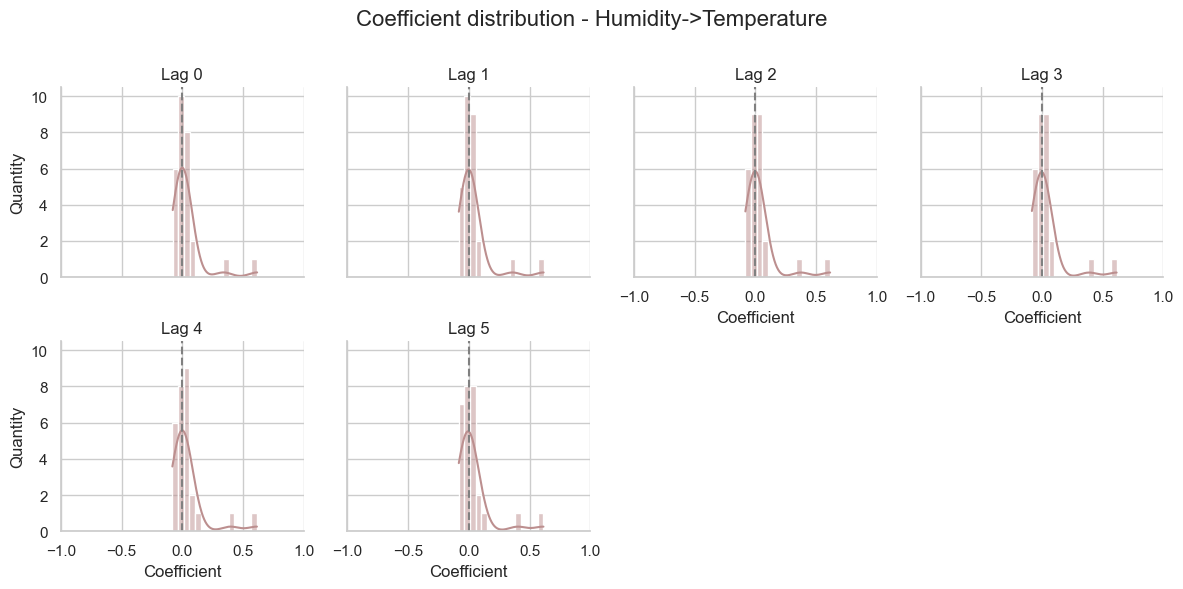

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

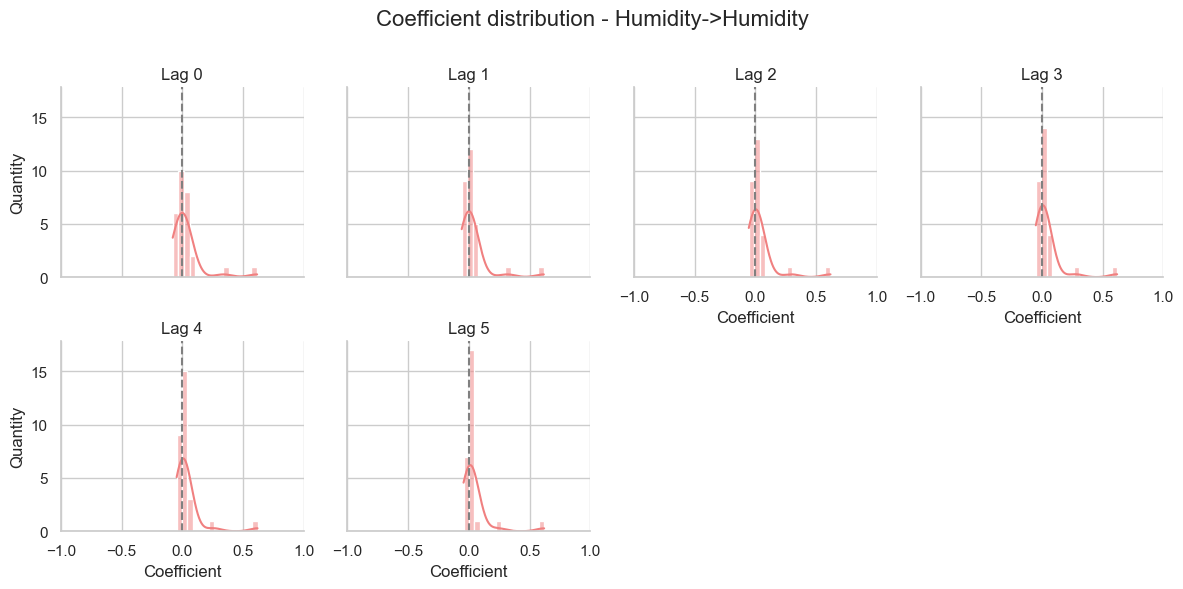

In [241]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_1hour.pdf") as pdf:

    summary_rows = []
    
    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_1hour.csv", index=False)


In [242]:
variable_pairs = significant_df['var_pair'].unique()

#  <font color='skyblue'>*Mean Precipitation less or equal than 2.5 mm/h*</font>

In [243]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[data_coef["mean precipitation"] <= 2.5].copy()

# Now run the same logic as before to extract significant lags and coefs
rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

In [244]:
num_eventos = len(filtered_precip_data)

print(f"{num_eventos} Light Events")

81 Light Events


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

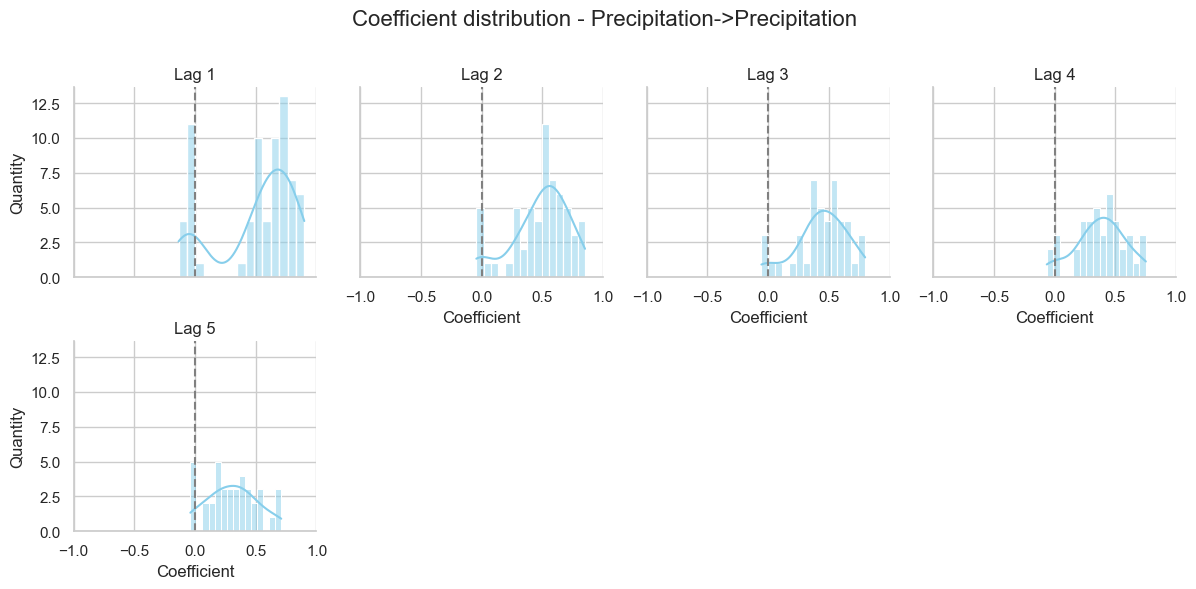

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

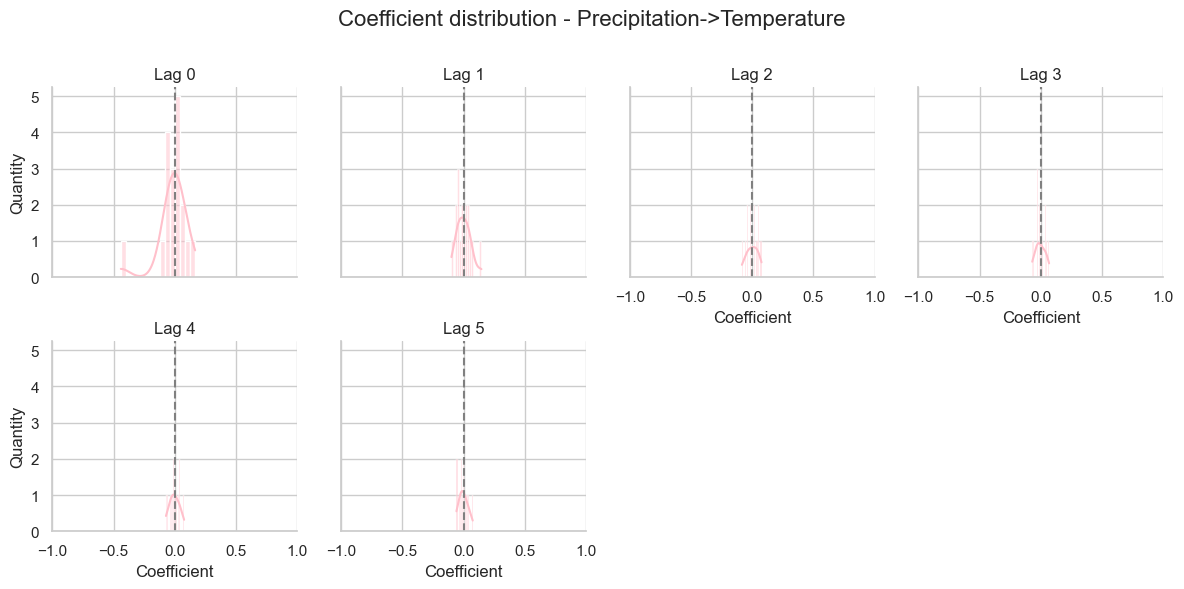

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

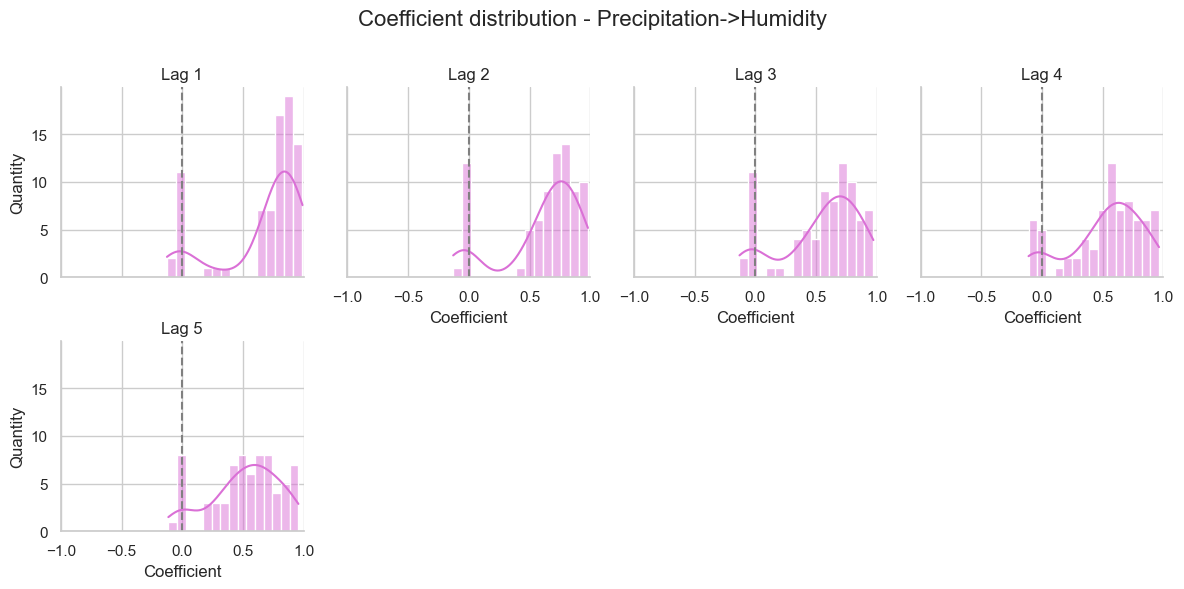

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

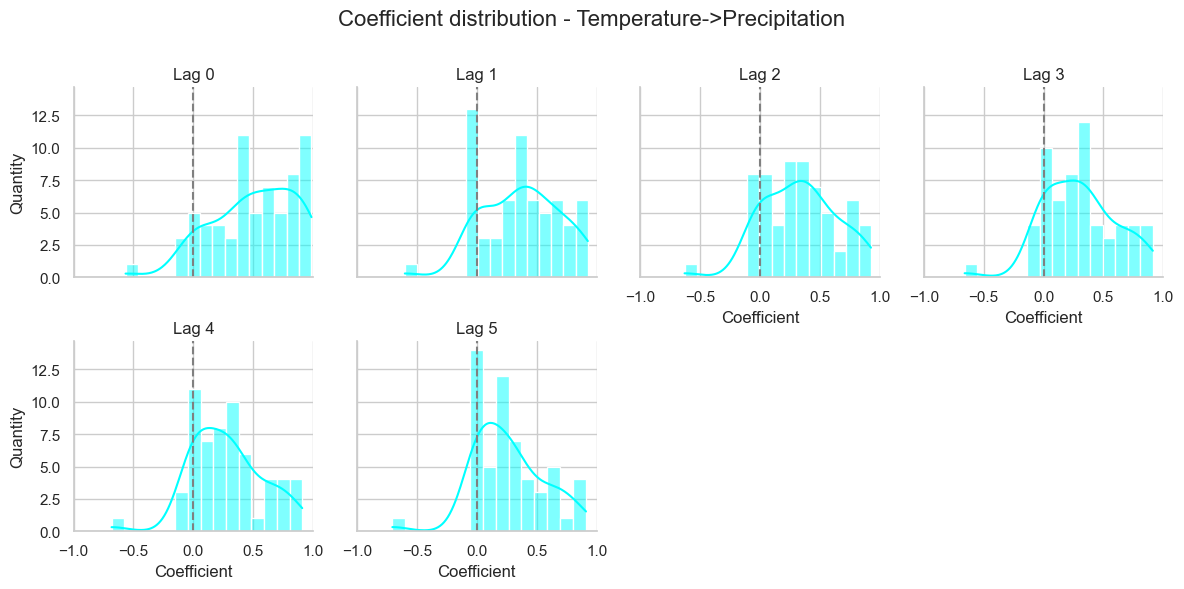

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

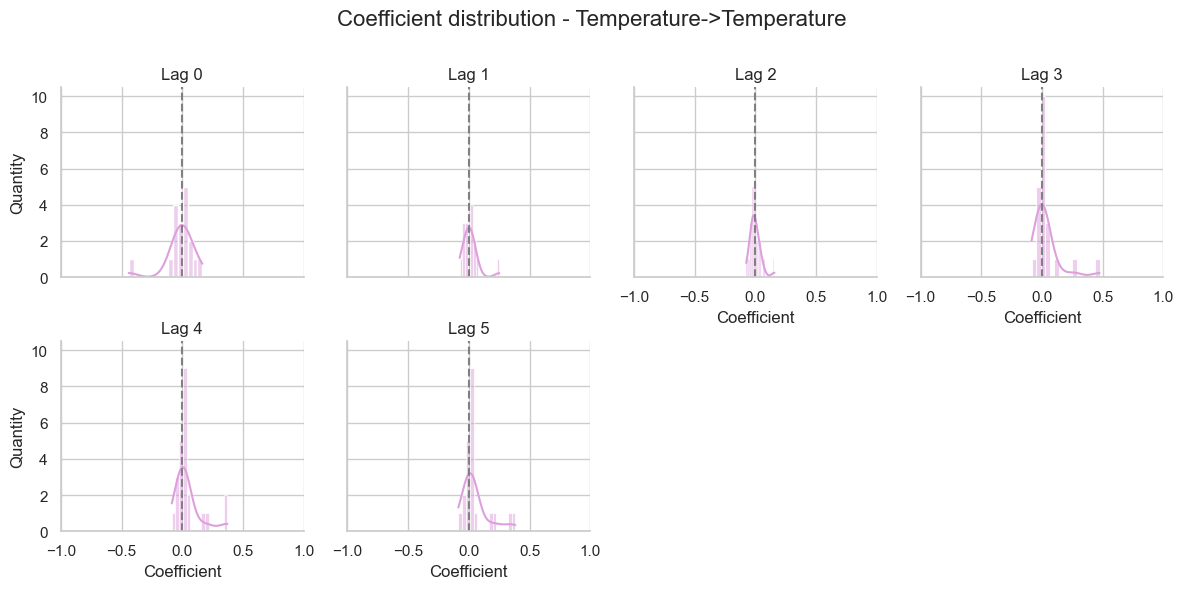

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

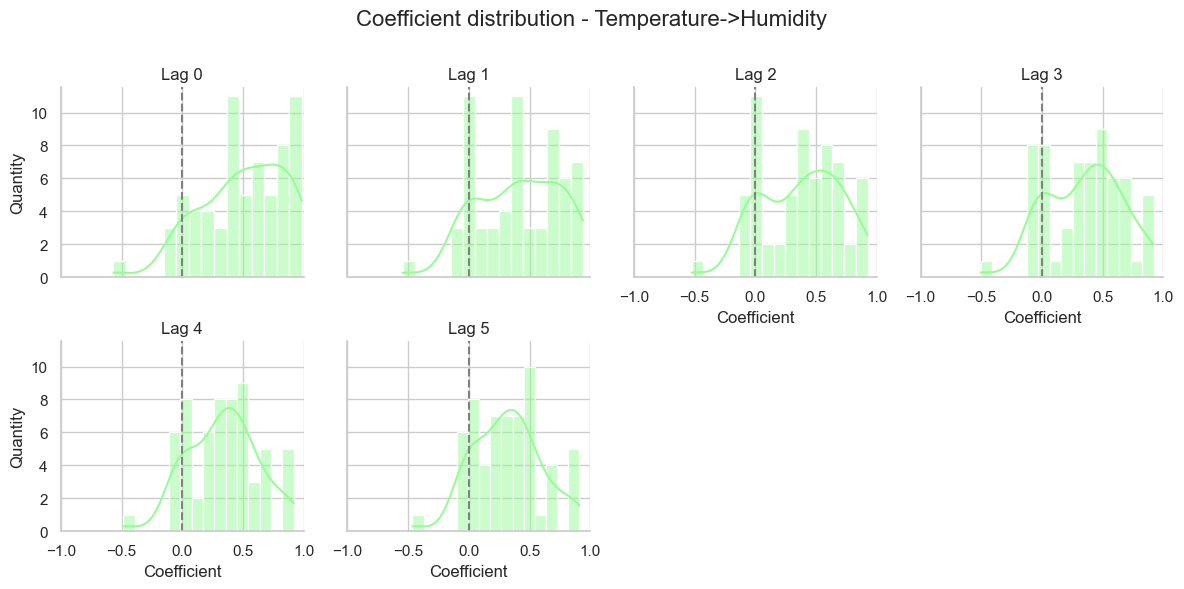

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

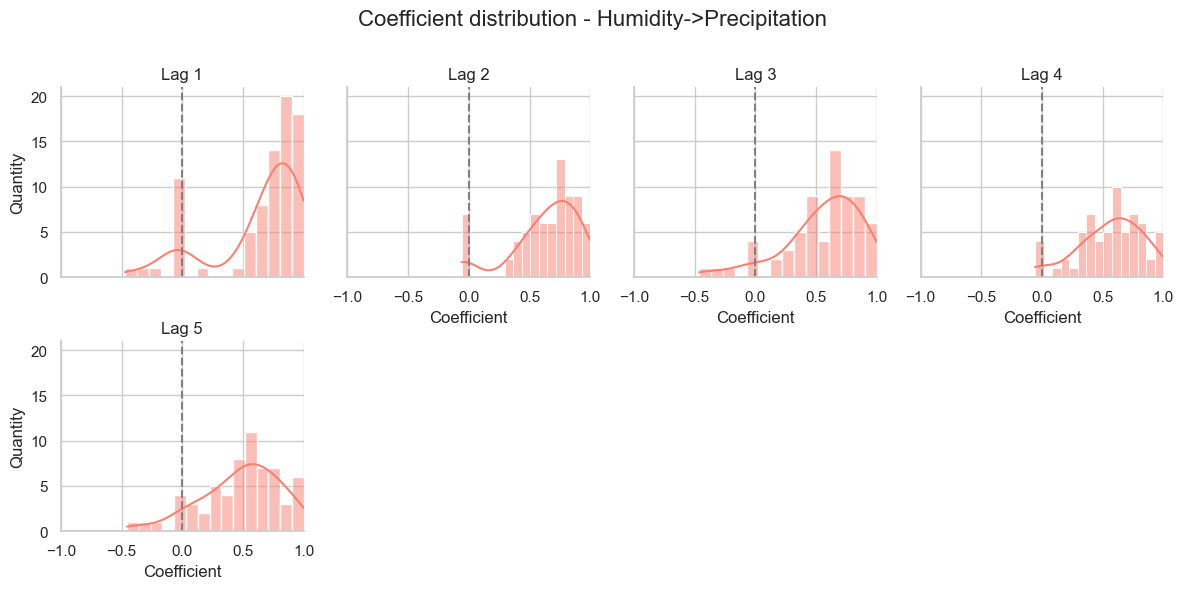

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

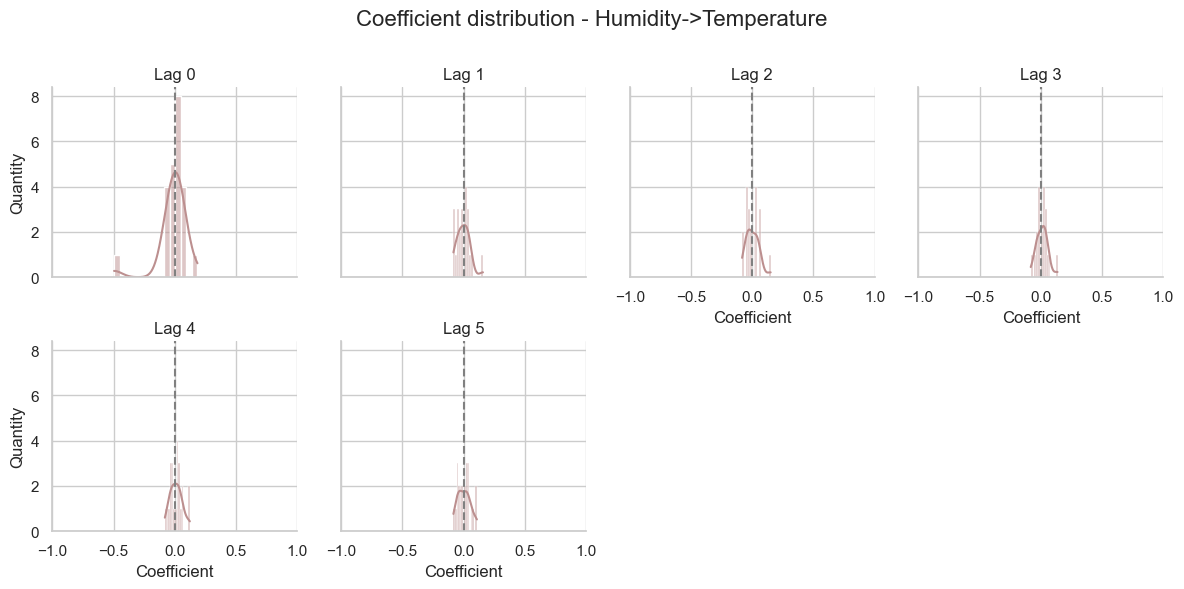

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

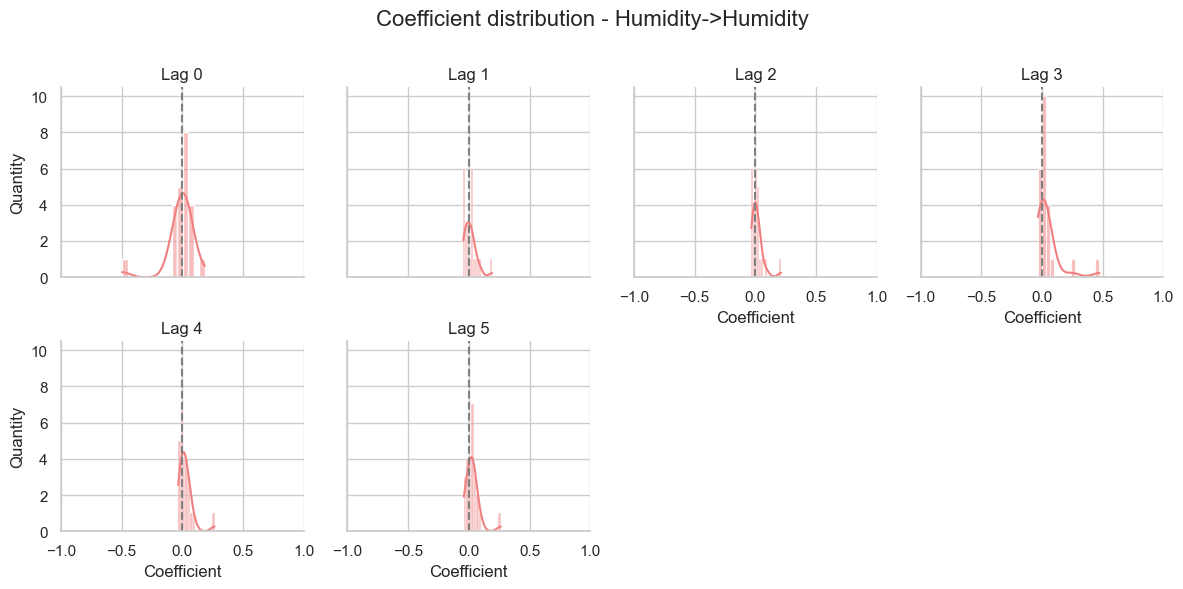

In [245]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_light_events.pdf") as pdf:

    summary_rows = []
    
    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_light_events.csv", index=False)


# <font color='skyblue'>*Cumulative Rain-Very light 0.1-0.9*</font>

In [246]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[
    (data_coef["cumulative_precipitation"] >= 0.1) & 
    (data_coef["cumulative_precipitation"] < 0.9)
].copy()

# Now run the same logic as before to extract significant lags and coefs
rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

In [247]:
num_eventos = len(filtered_precip_data)

print(f"{num_eventos} Very Light Events")

43 Very Light Events


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

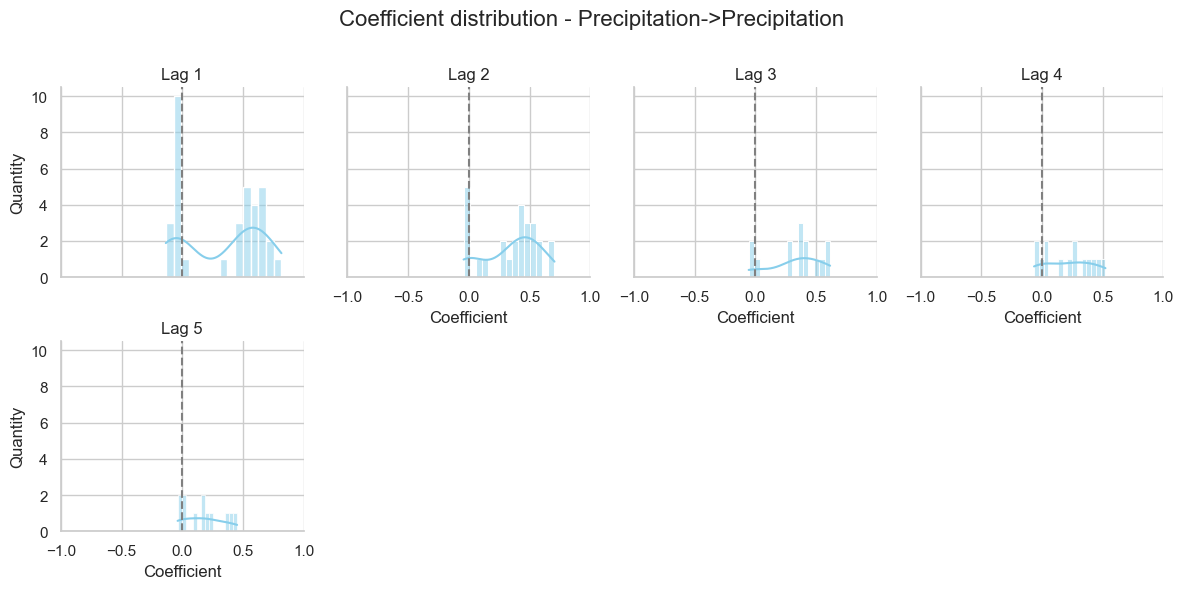

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

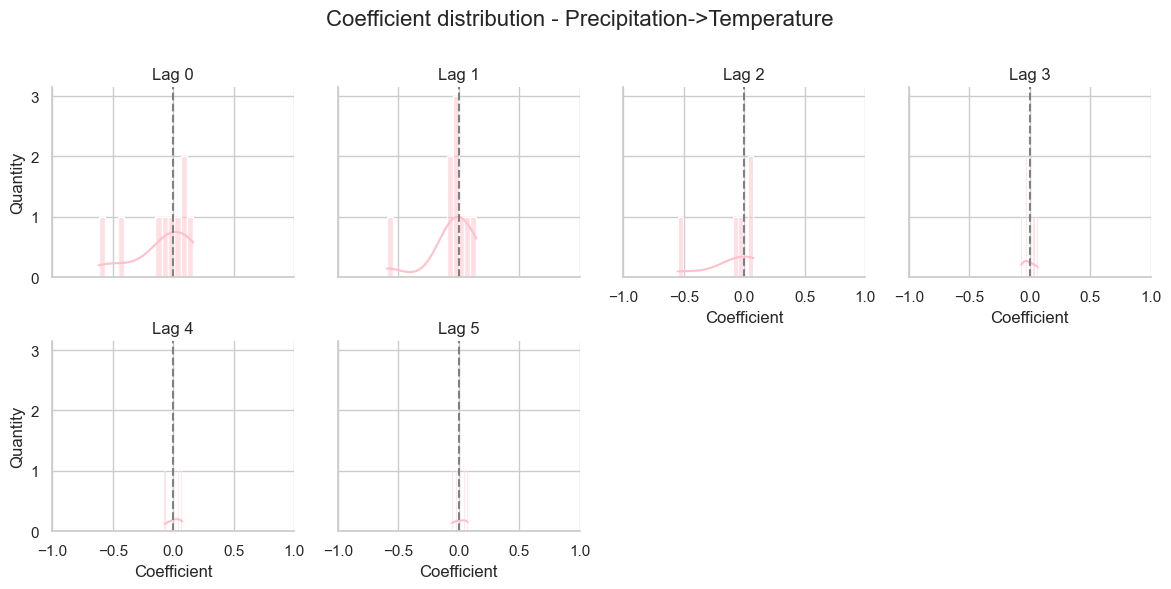

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

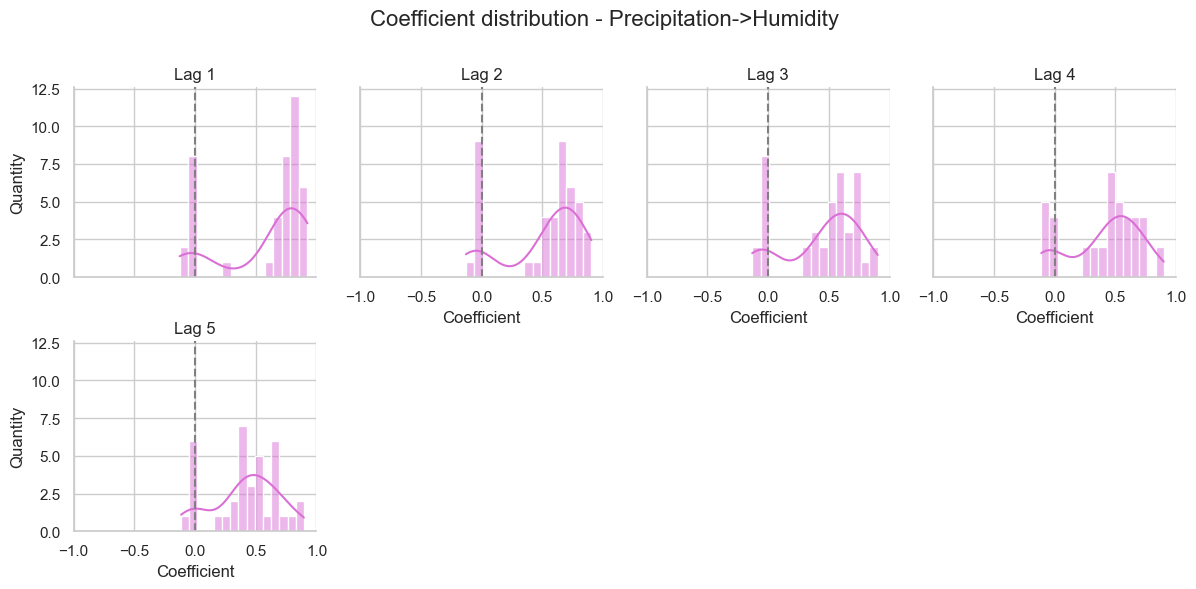

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

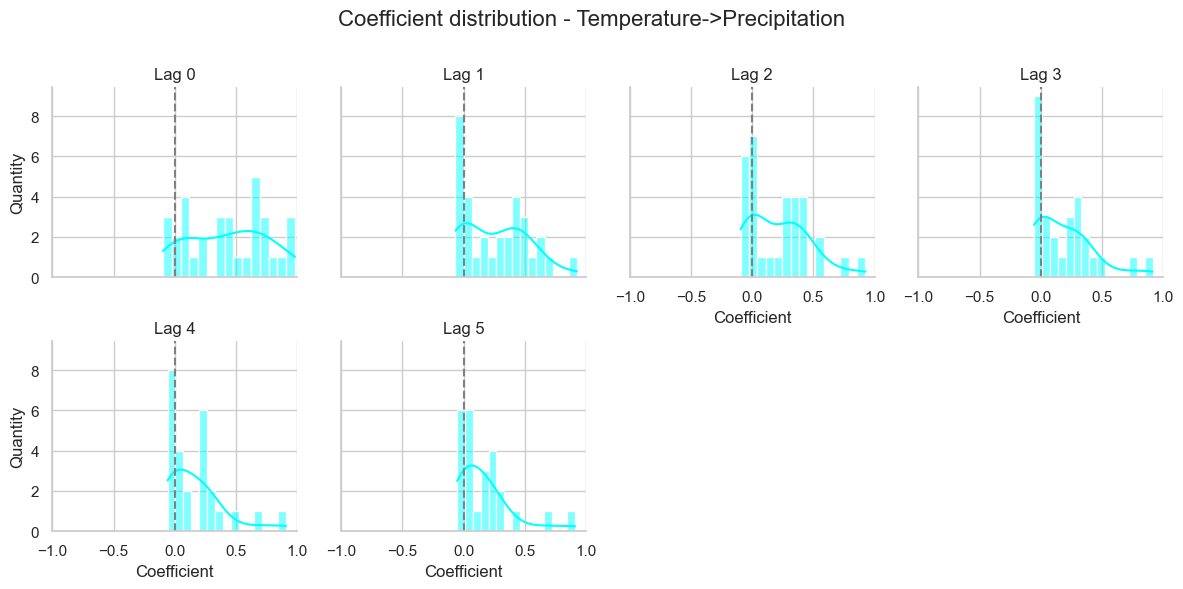

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

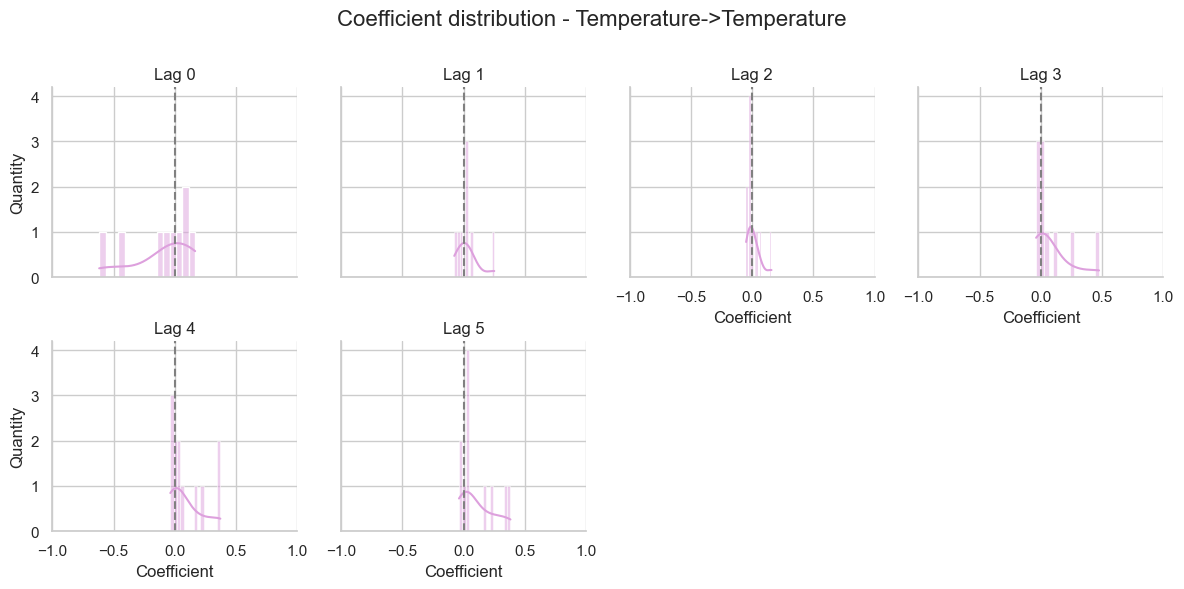

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

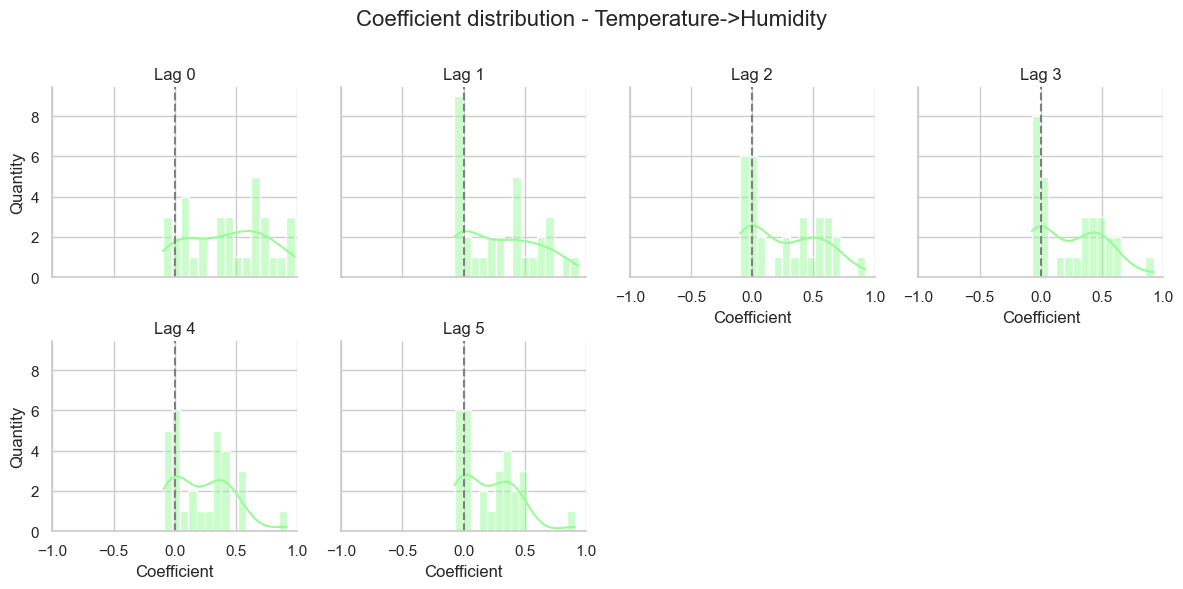

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

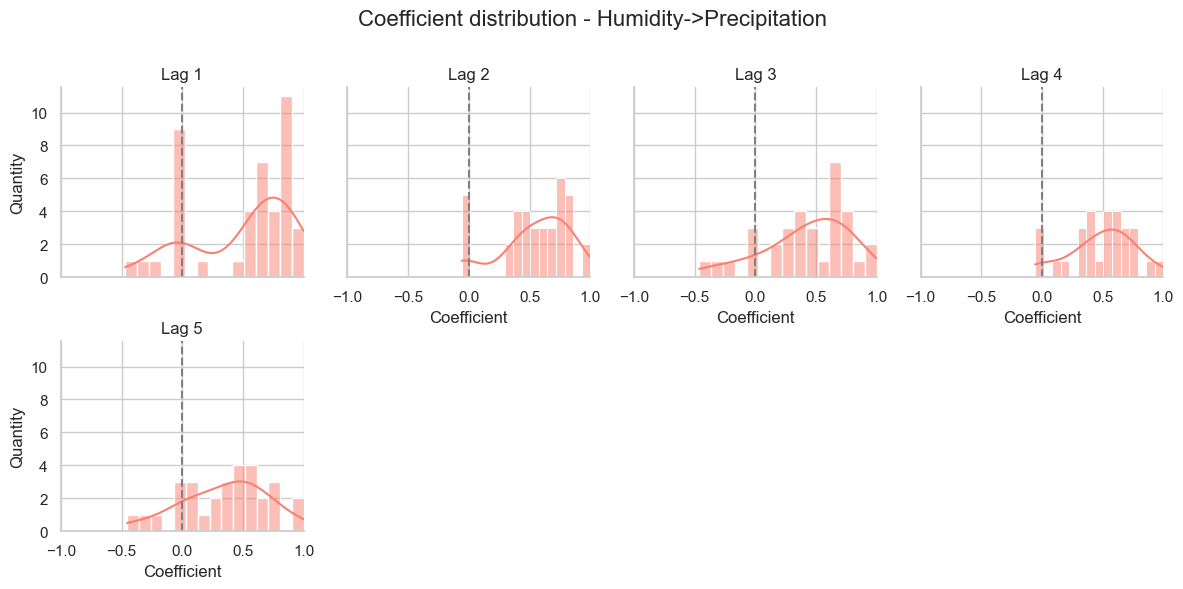

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

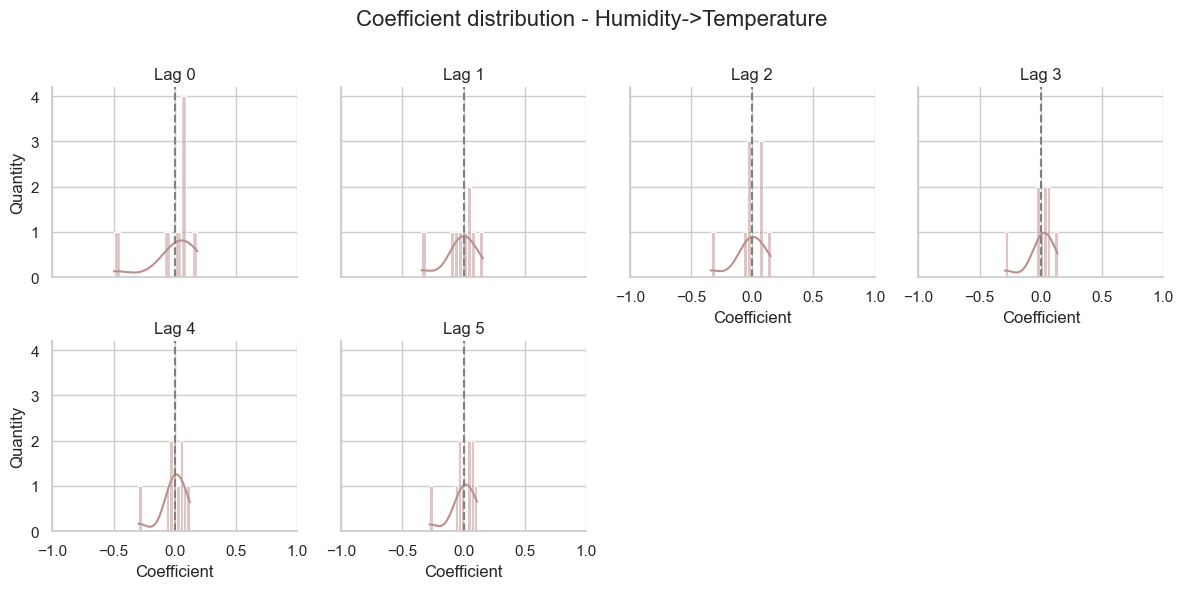

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

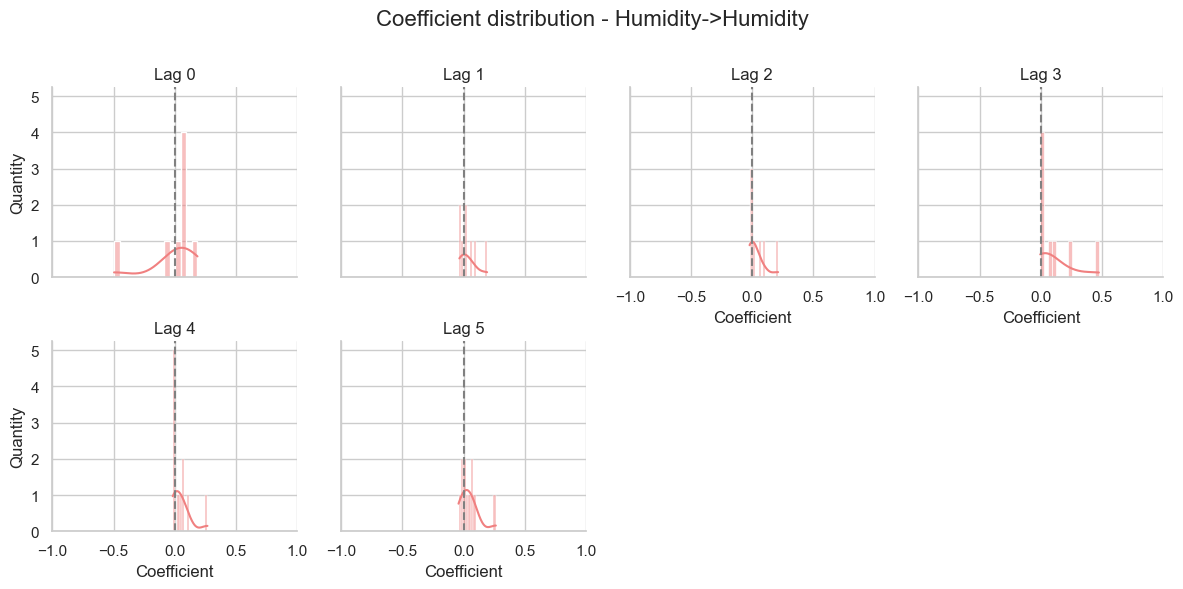

In [248]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_cumulative_verylight_events.pdf") as pdf:

    summary_rows = []
    
    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_cumulative_verylight_events.csv", index=False)


# <font color='skyblue'>*Cumulative Rain-light 1-10*</font>

In [249]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[
    (data_coef["cumulative_precipitation"] >= 0.9) & 
    (data_coef["cumulative_precipitation"] < 10)
].copy()

rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

In [250]:
num_eventos = len(filtered_precip_data)

print(f"{num_eventos} Light Events")

54 Light Events


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

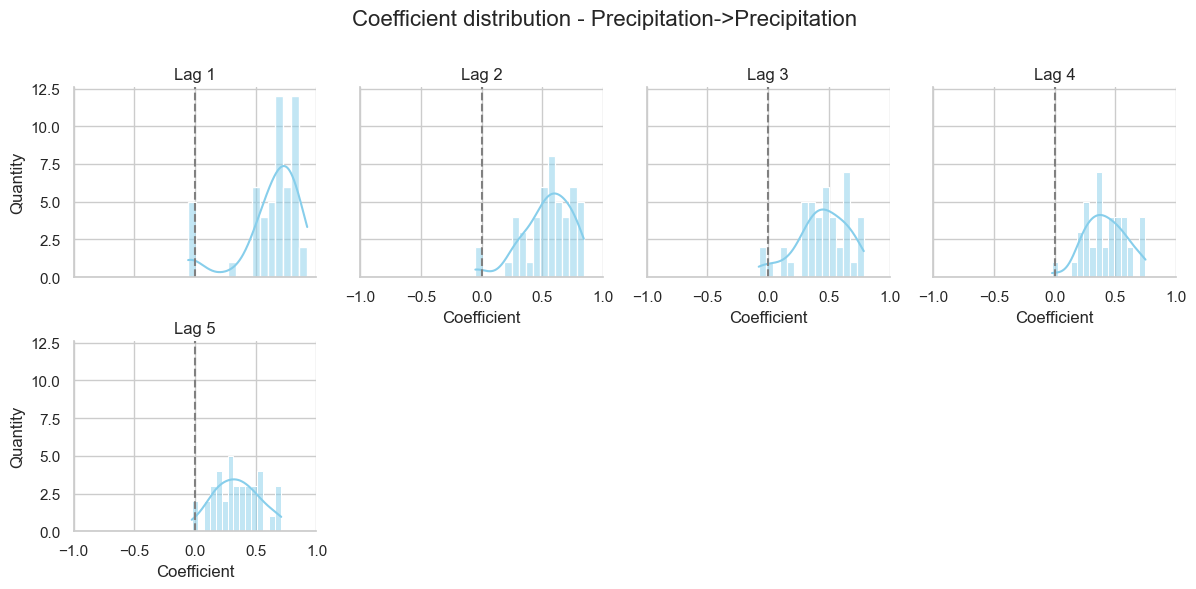

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

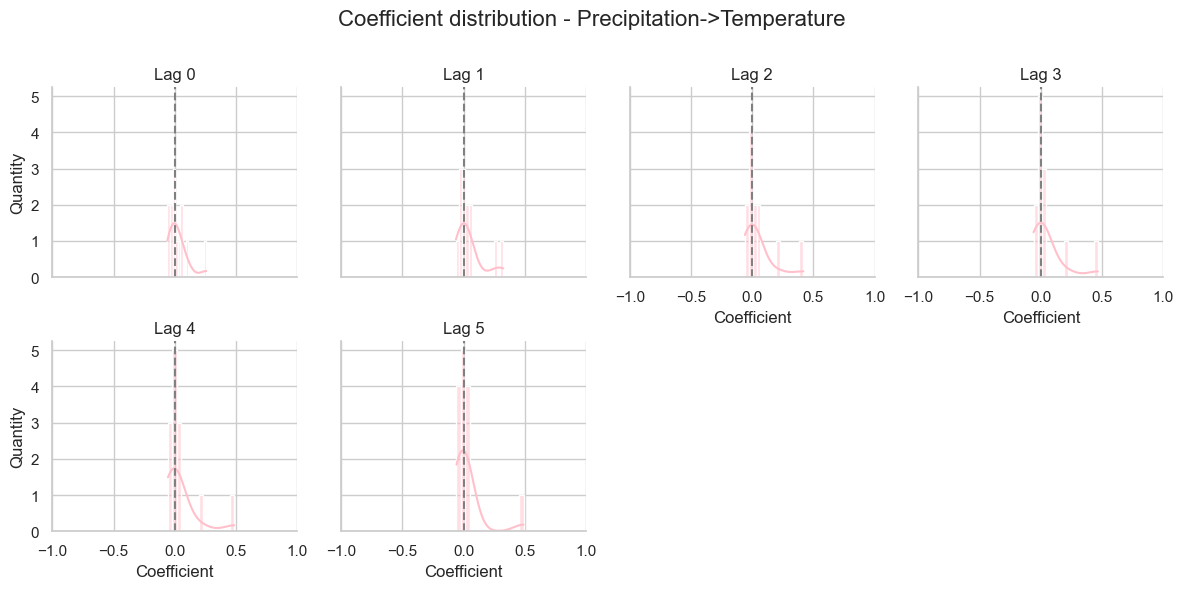

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

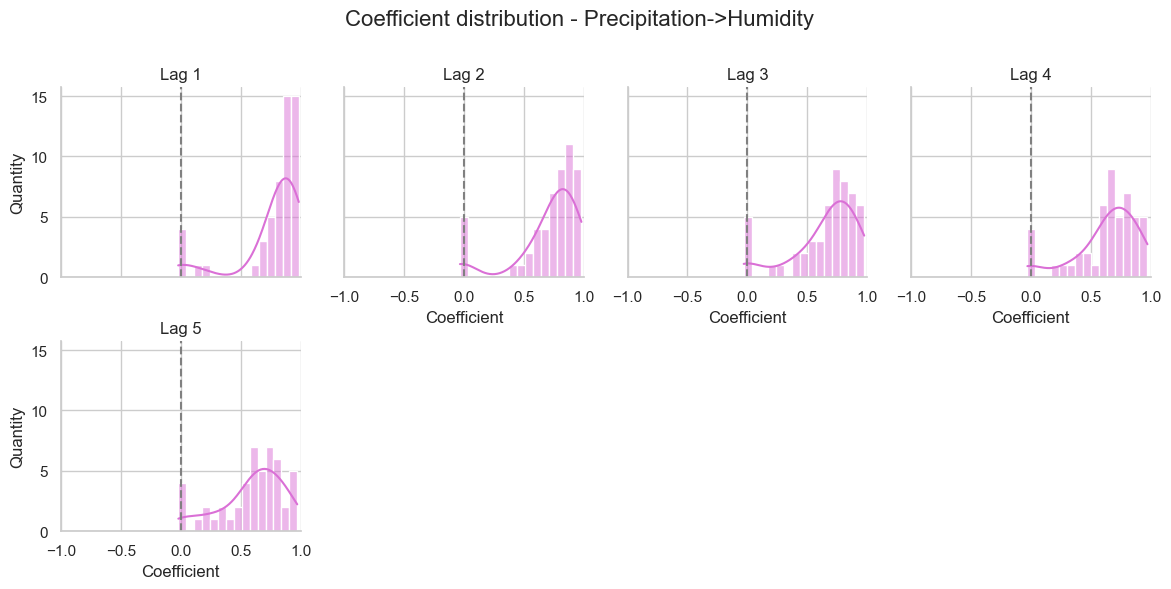

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

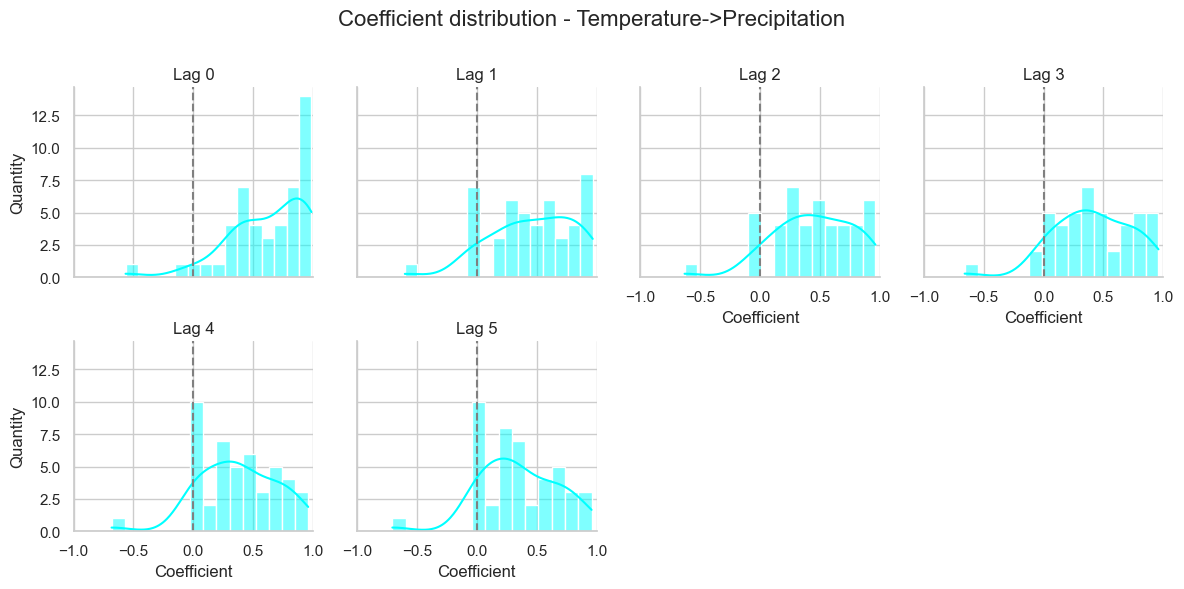

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

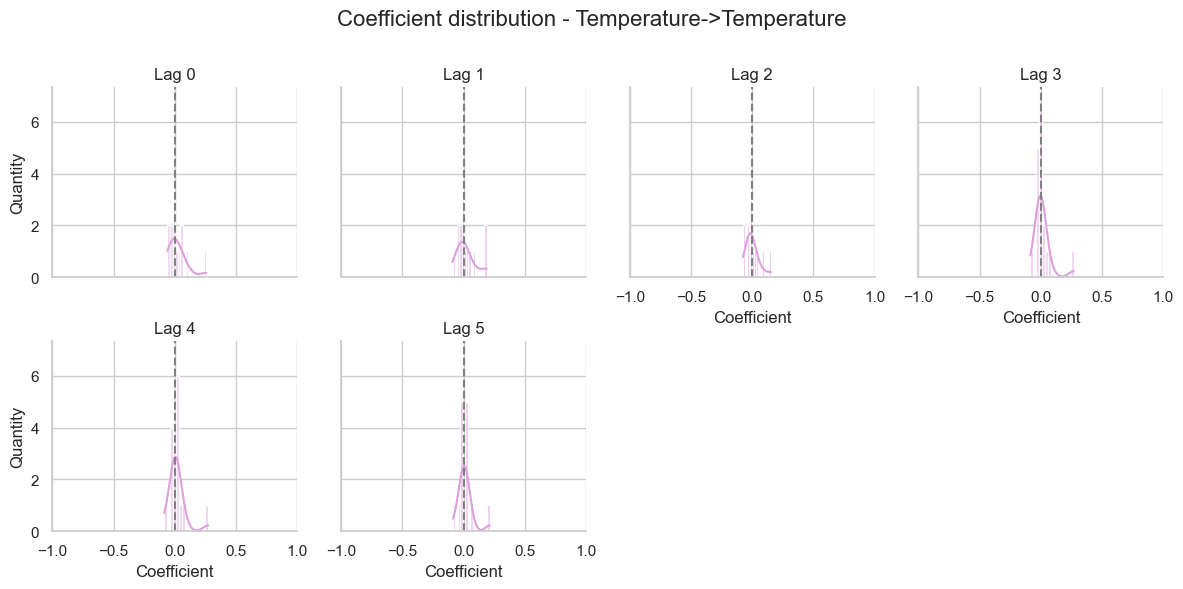

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

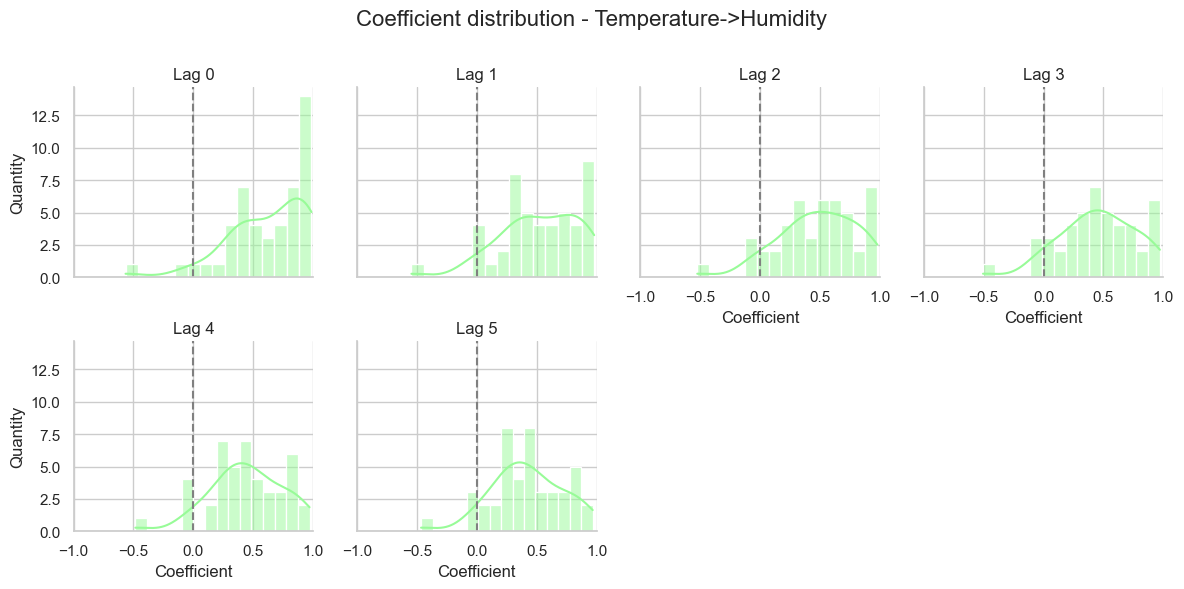

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

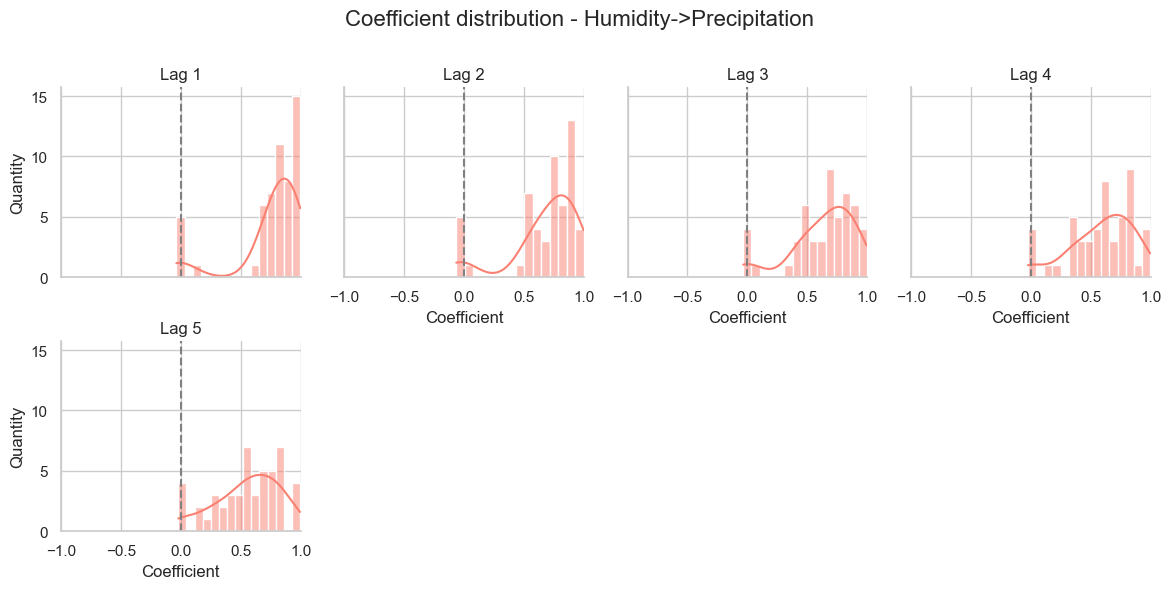

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

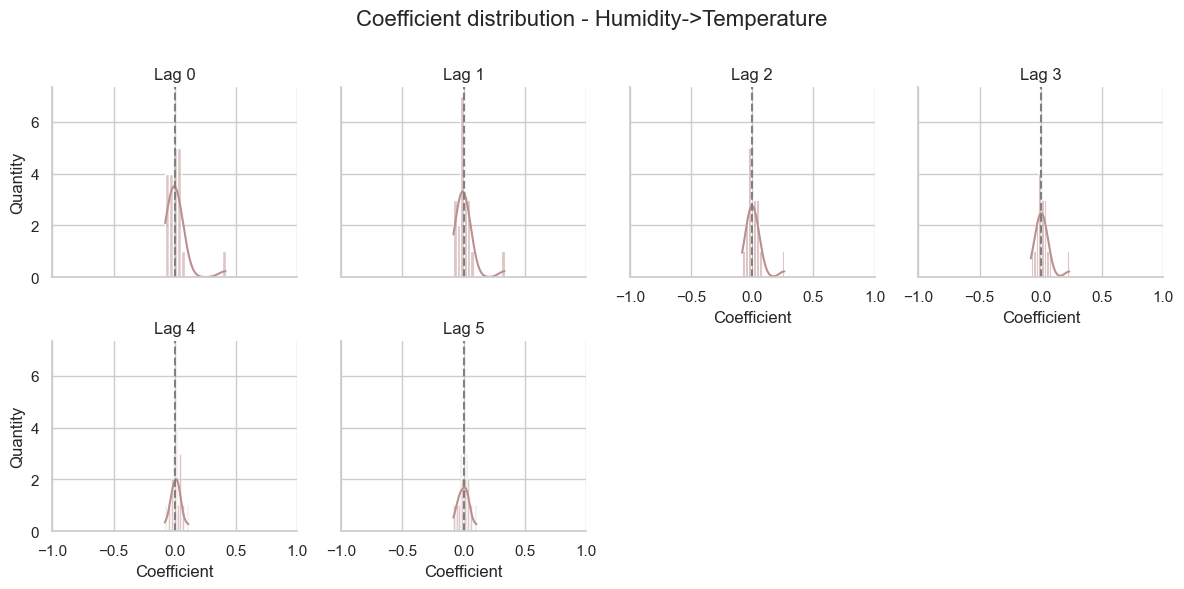

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

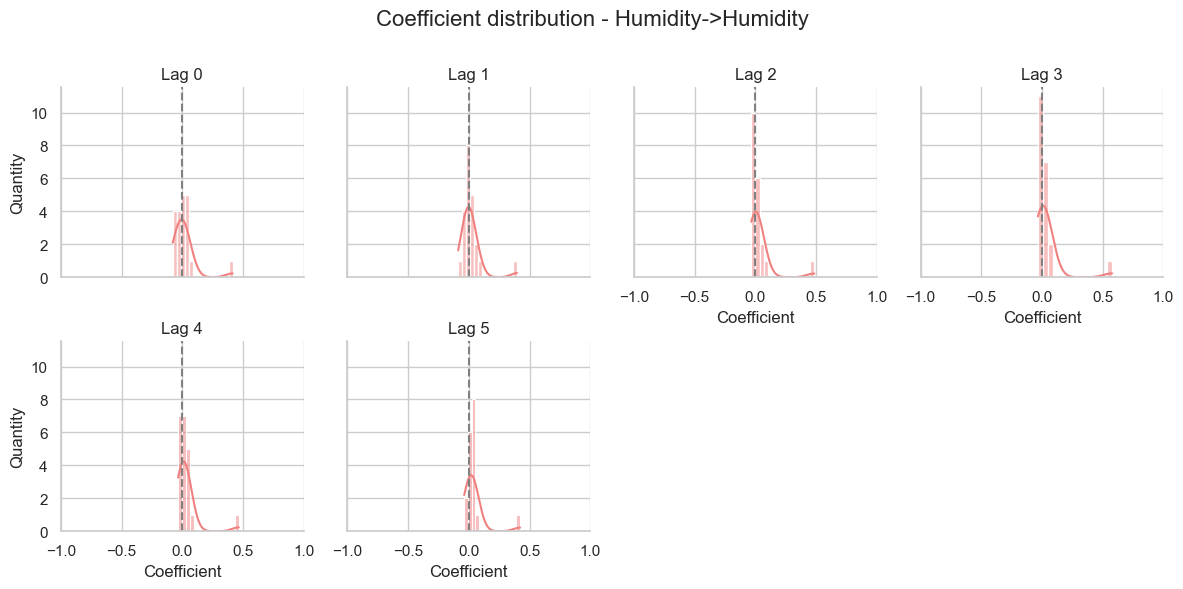

In [251]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_cumulative_light_events.pdf") as pdf:

    summary_rows = []
    
    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_cumulative_light_events.csv", index=False)


#  <font color='magenta'>*Mean Precipitation Moderate Events

In [252]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[
    (data_coef["mean precipitation"] > 2.5) & 
    (data_coef["mean precipitation"] <= 7.5)
].copy()

# Now run the same logic as before to extract significant lags and coefs
rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

In [253]:
num_eventos = len(filtered_precip_data)

print(f"{num_eventos} Moderate Events")

31 Moderate Events


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

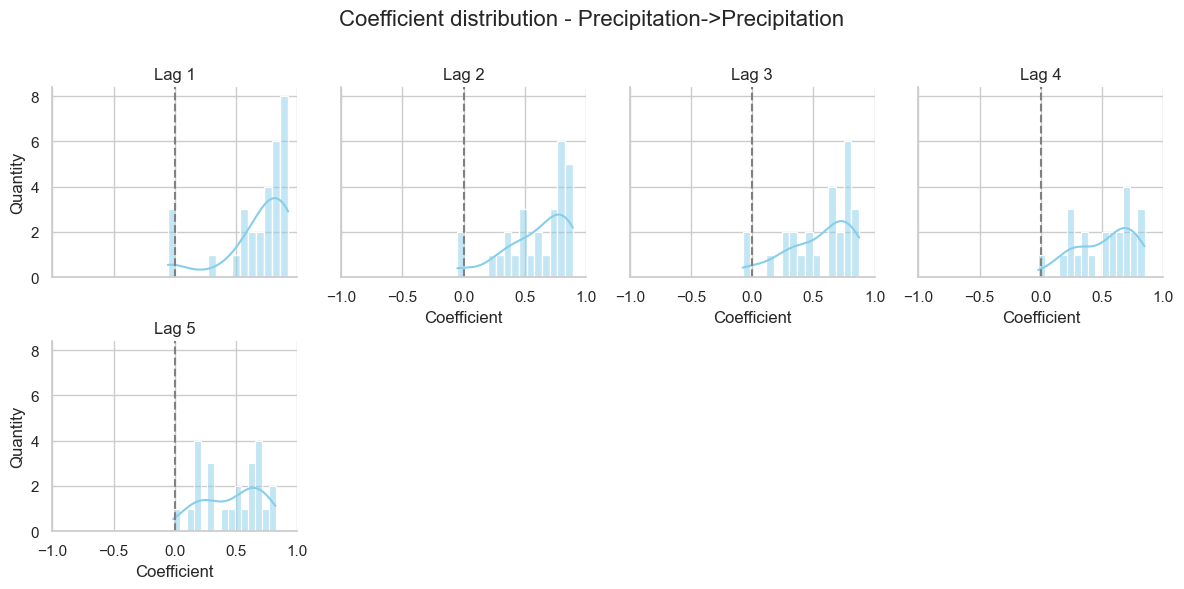

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

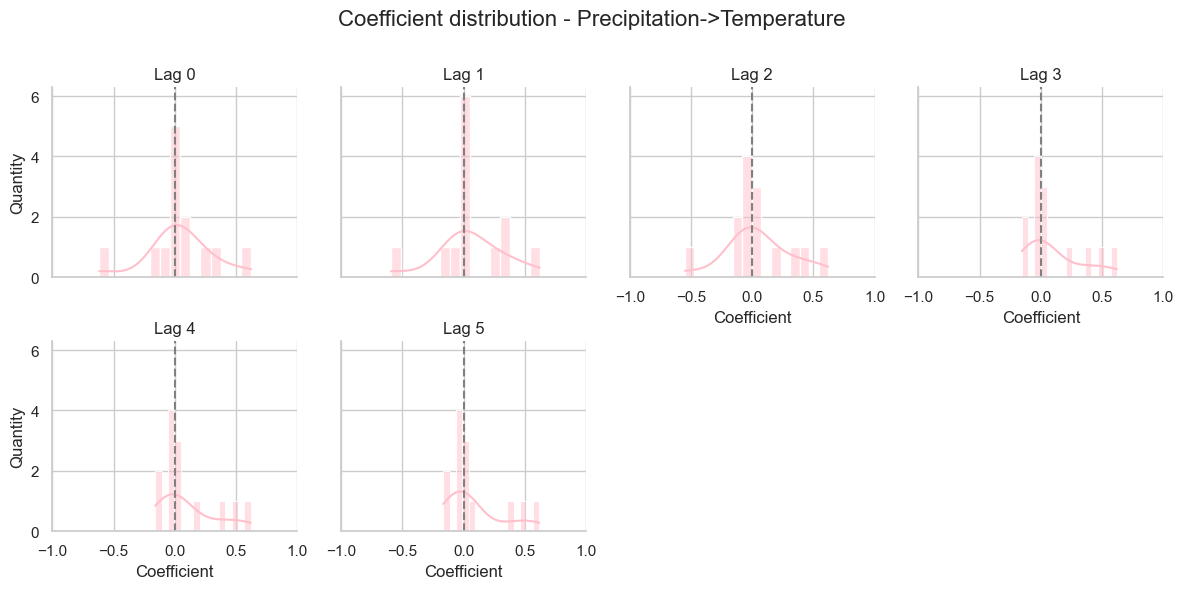

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

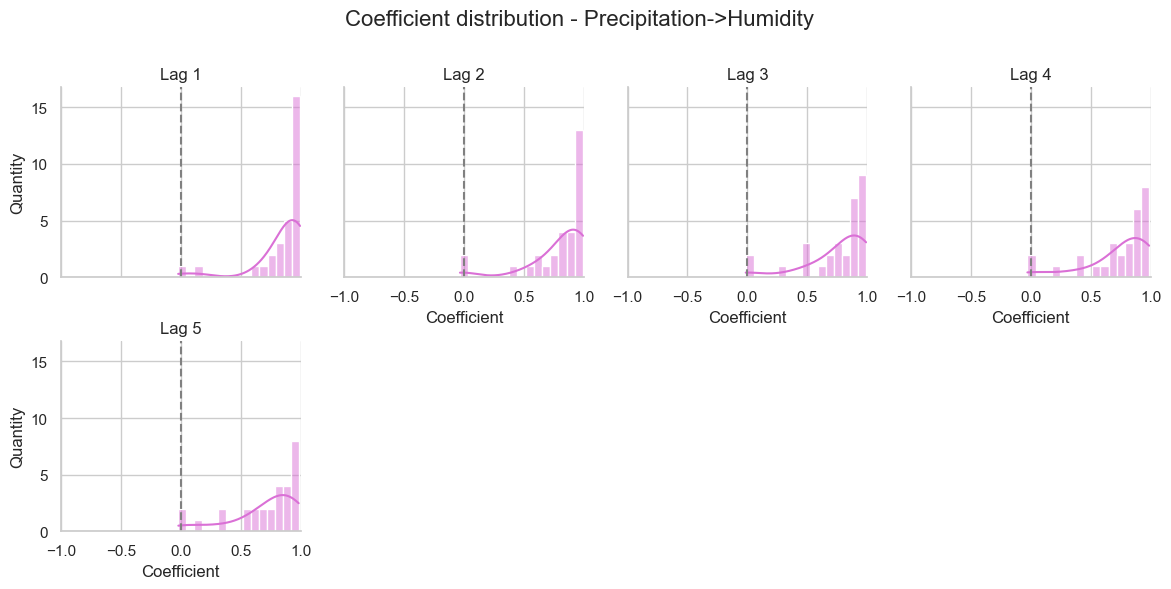

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

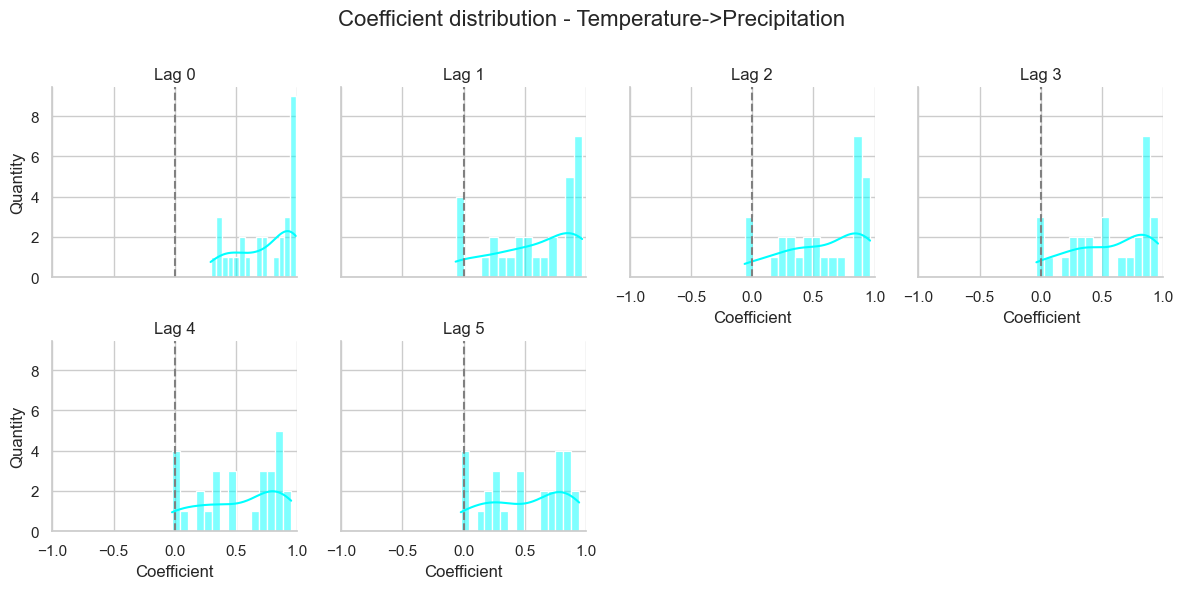

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

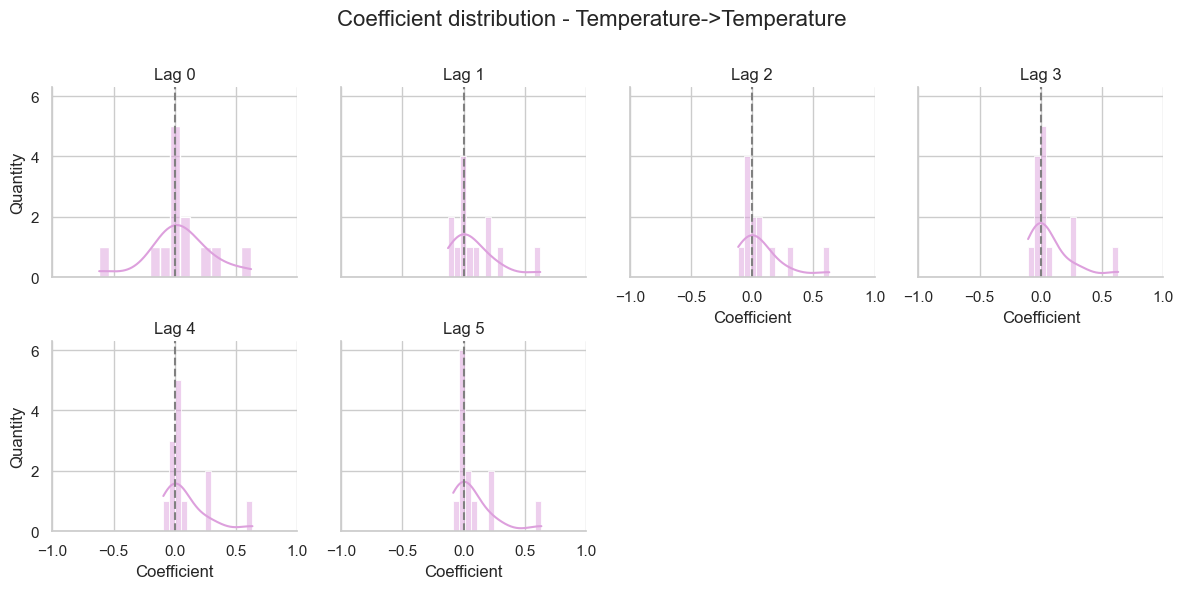

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

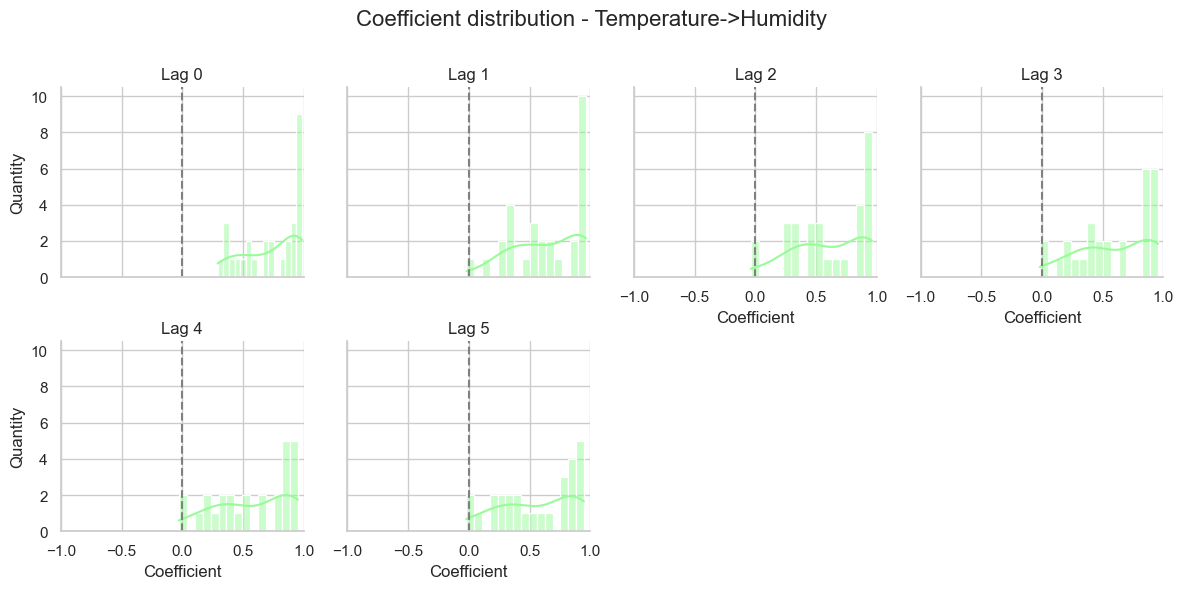

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

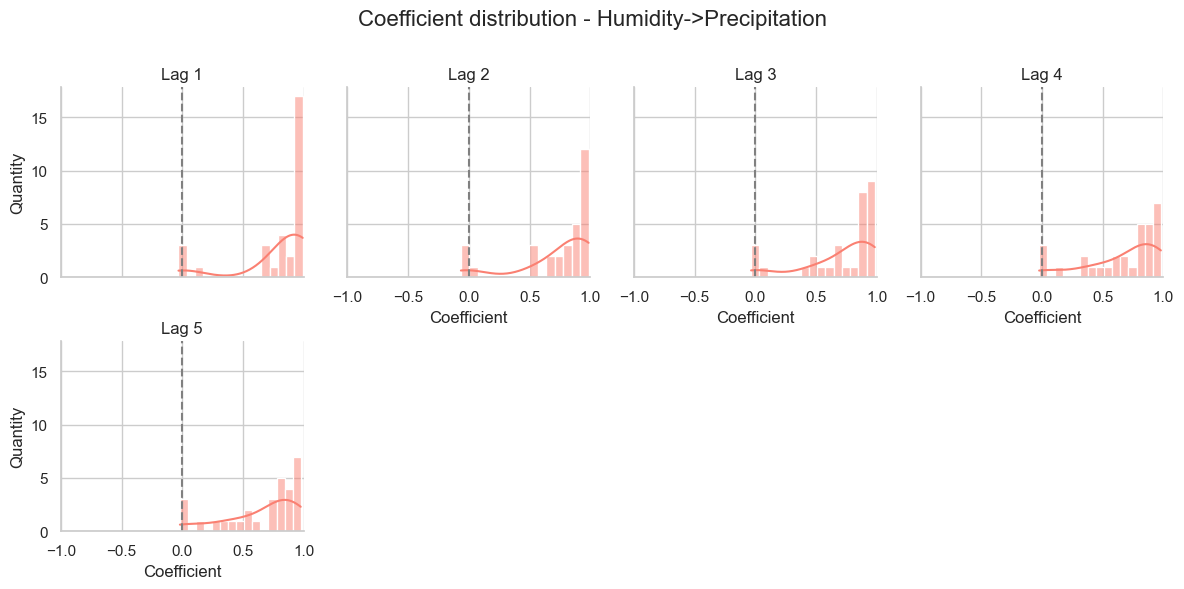

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

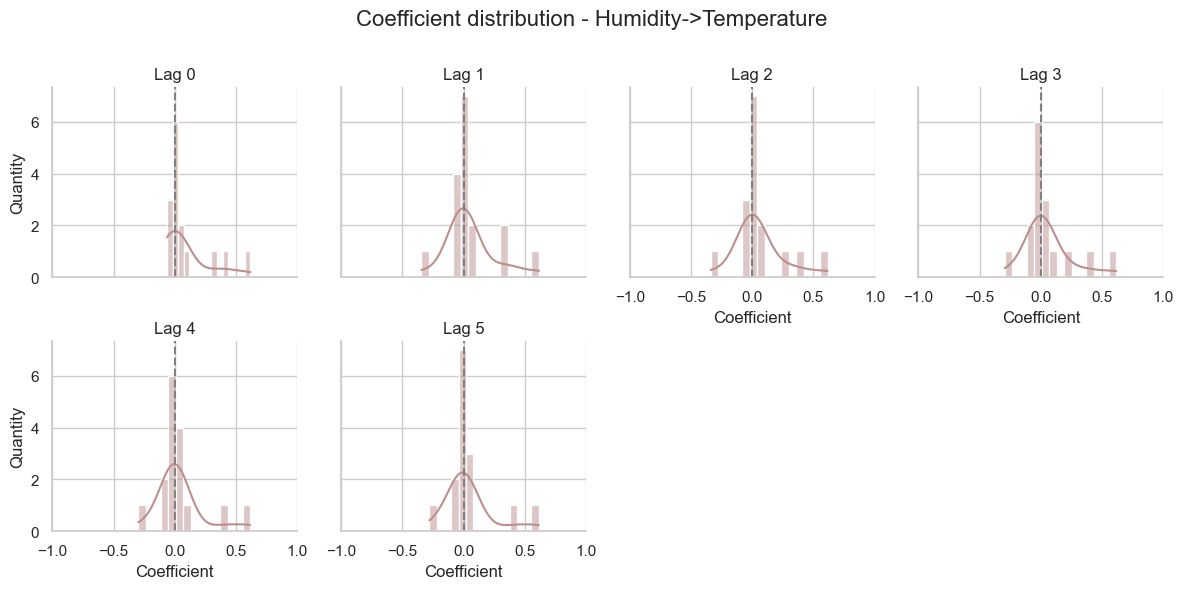

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

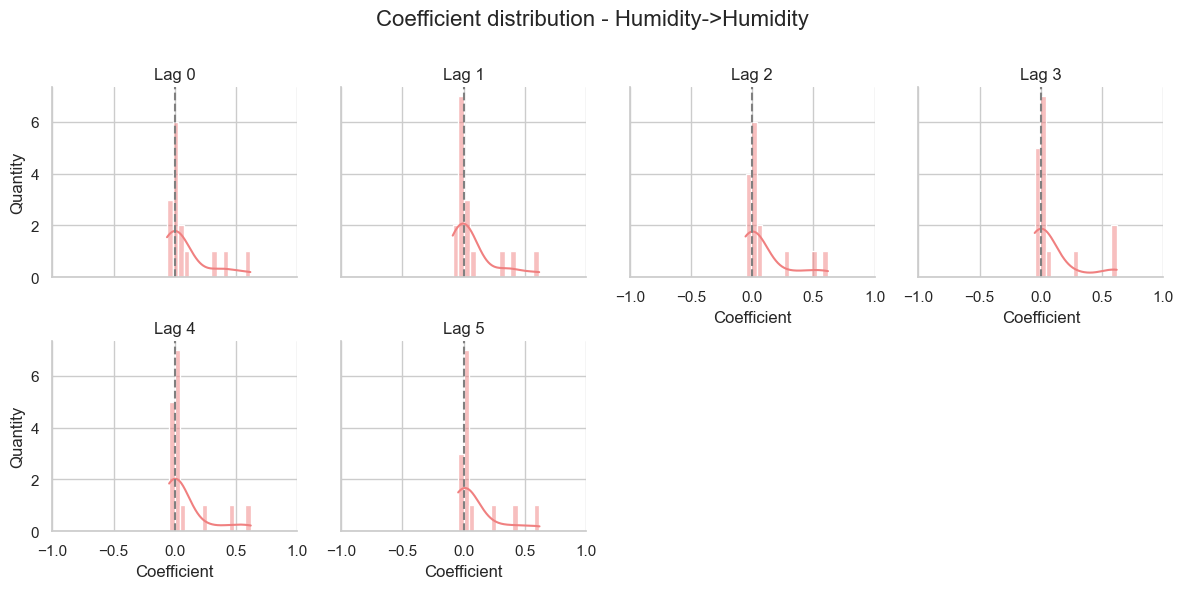

In [254]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_moderate_events.pdf") as pdf:

    summary_rows = []
    
    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_moderate_events.csv", index=False)

# <font color='magenta'>*Cumulative Precipitation- Moderate Events*</font>

In [255]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[
    (data_coef["cumulative_precipitation"] >= 10) & 
    (data_coef["cumulative_precipitation"] < 30)
].copy()

# Now run the same logic as before to extract significant lags and coefs
rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

In [256]:
num_eventos = len(filtered_precip_data)

print(f"{num_eventos} Moderate Events")

17 Moderate Events


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

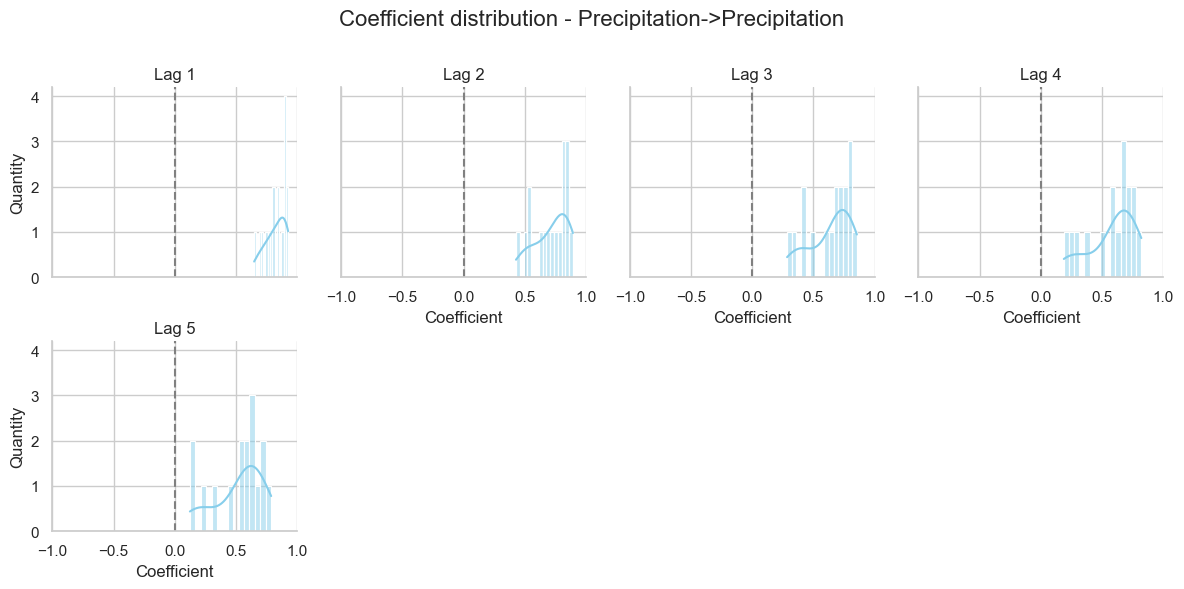

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

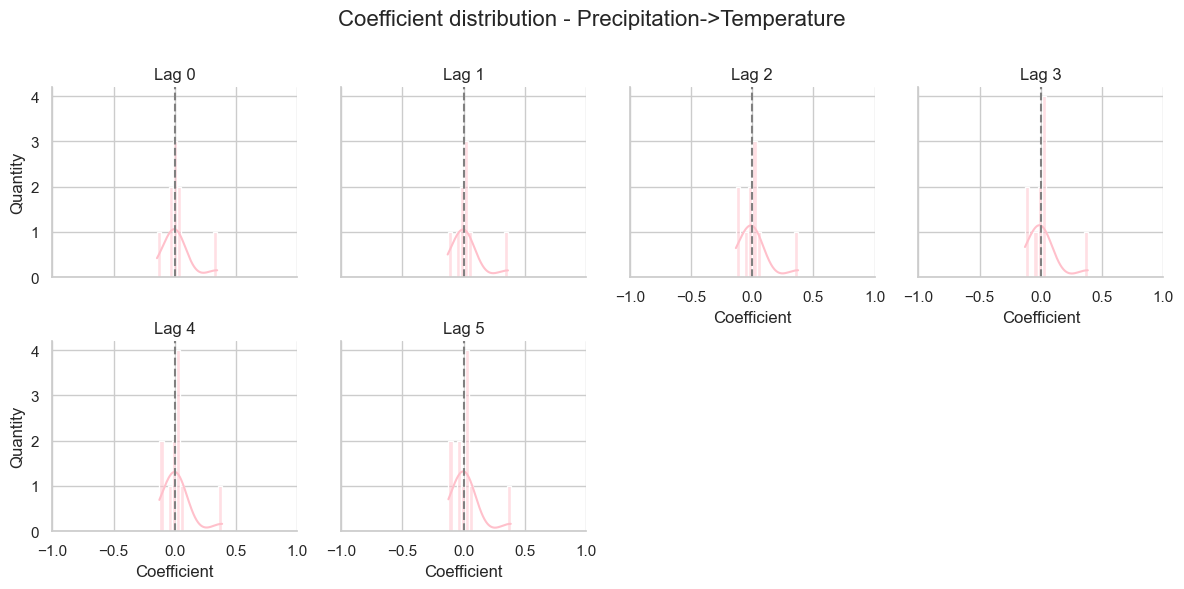

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

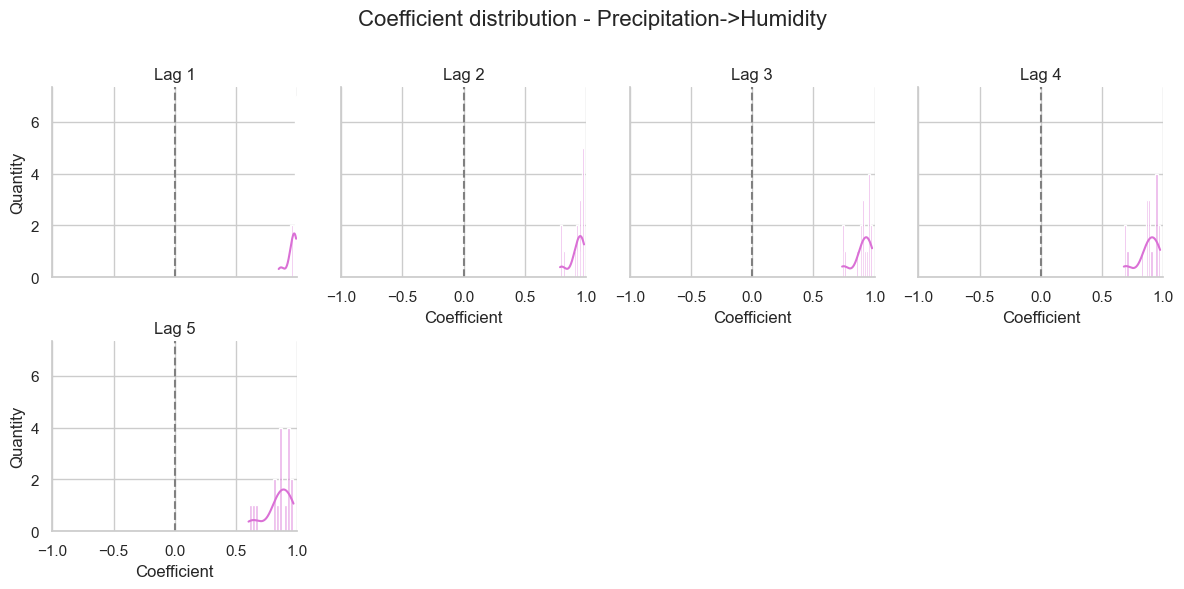

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

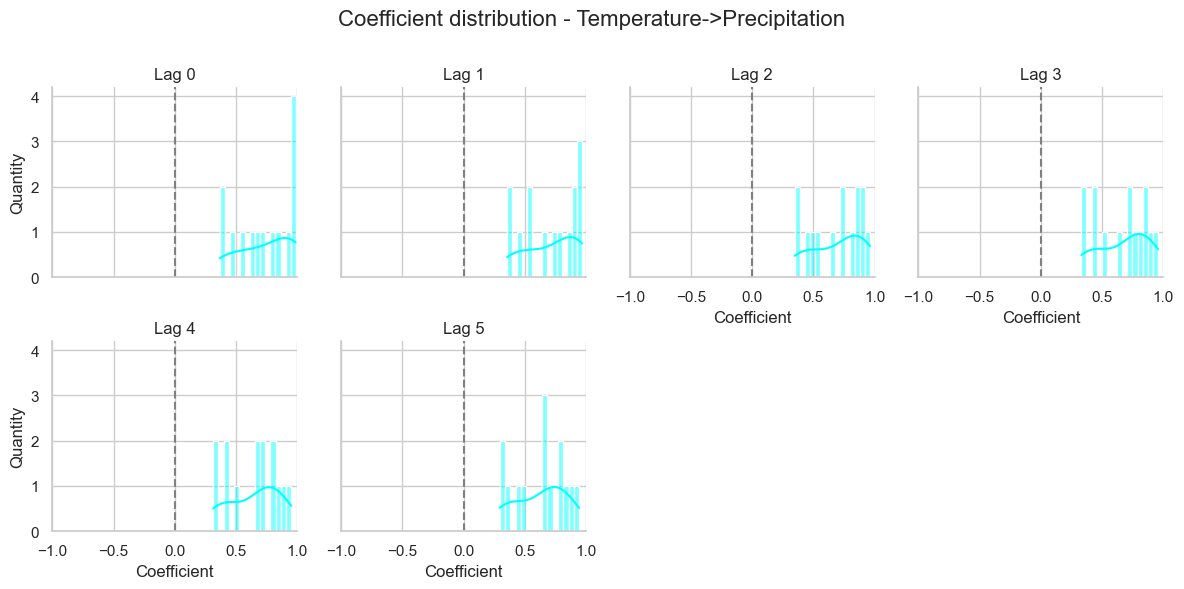

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

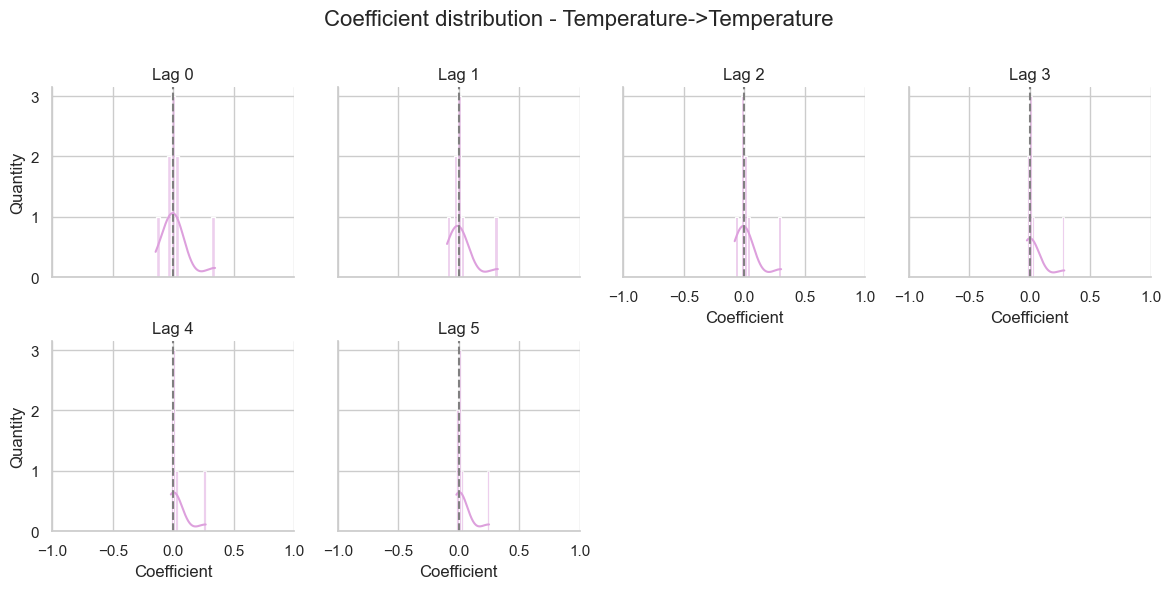

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

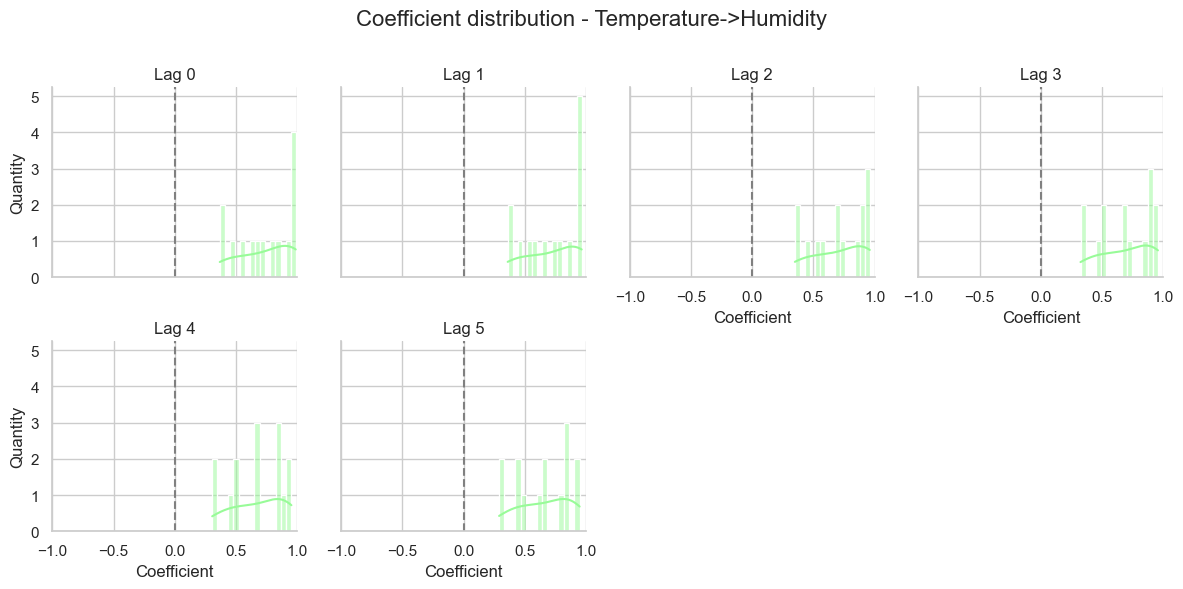

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

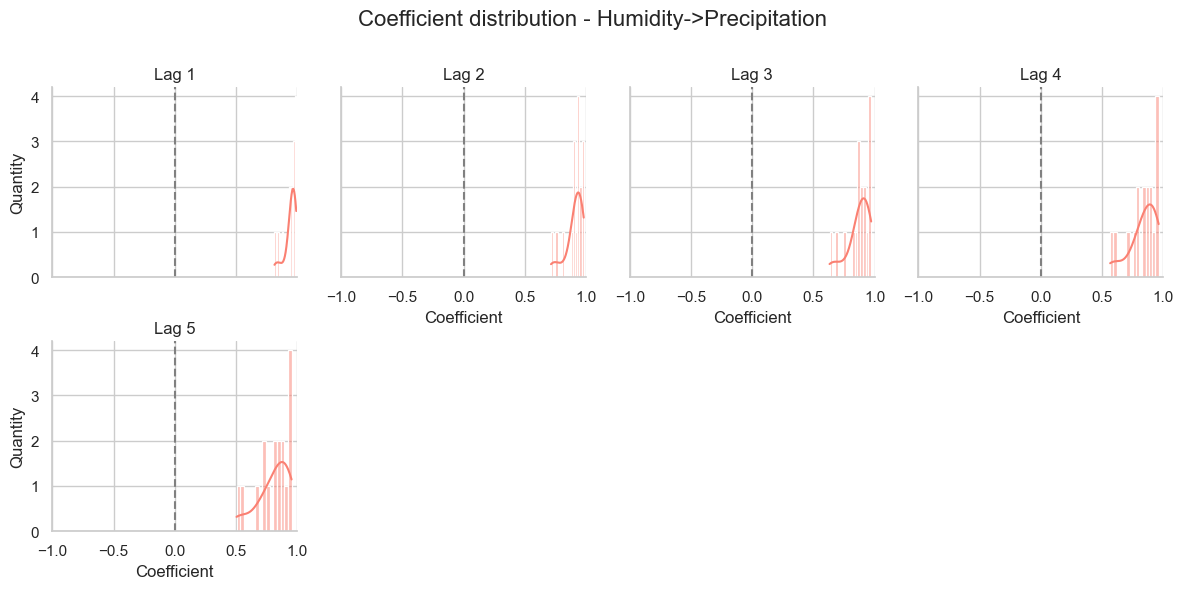

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

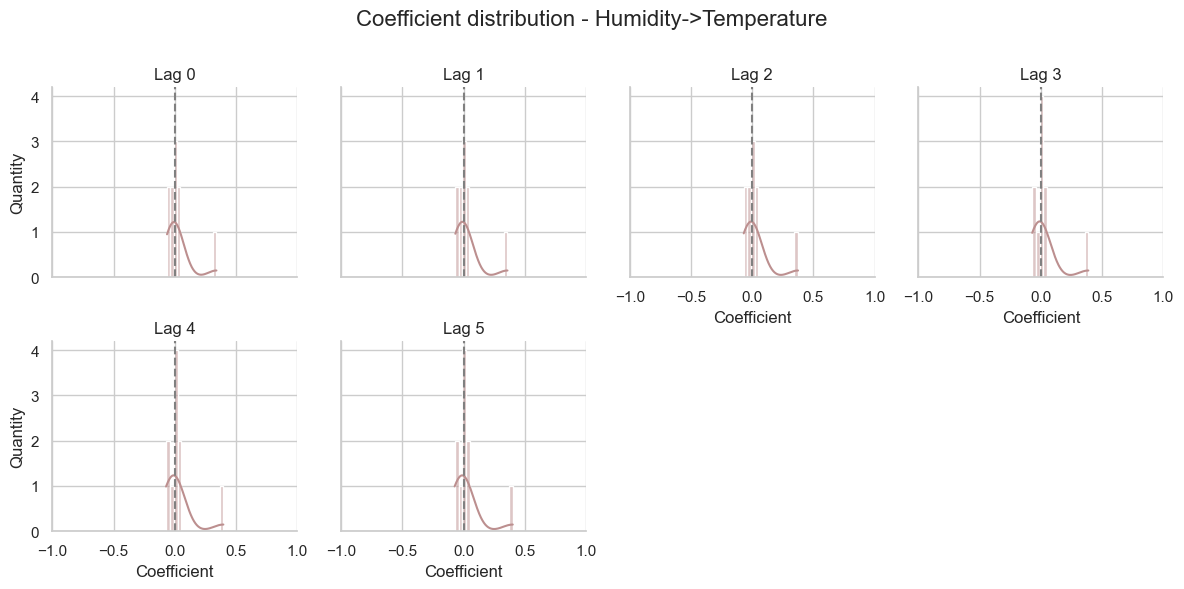

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

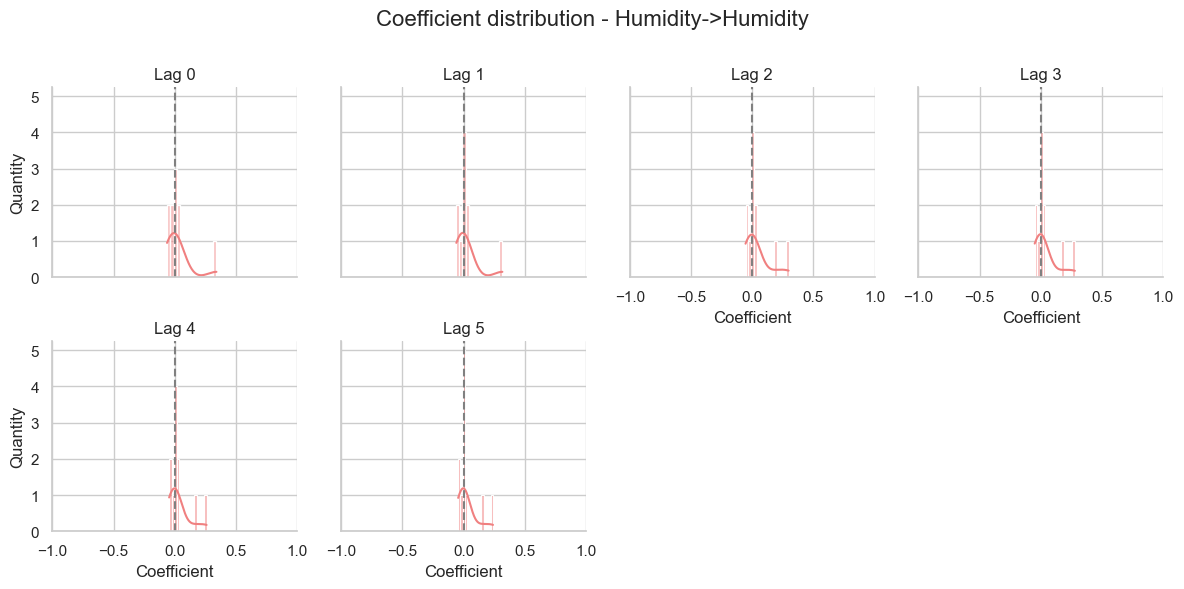

In [257]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0


with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_cumulative_moderate_events.pdf") as pdf:

    summary_rows = []
    
    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_cumulative_moderate_events.csv", index=False)


# <font color='magenta'>*Mean Precipitation Heavy Events*</font>

In [258]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[(data_coef["mean precipitation"] > 7.5)].copy()

# Now run the same logic as before to extract significant lags and coefs
rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

In [259]:
num_eventos = len(filtered_precip_data)

print(f"{num_eventos} Heavy Events")

9 Heavy Events


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

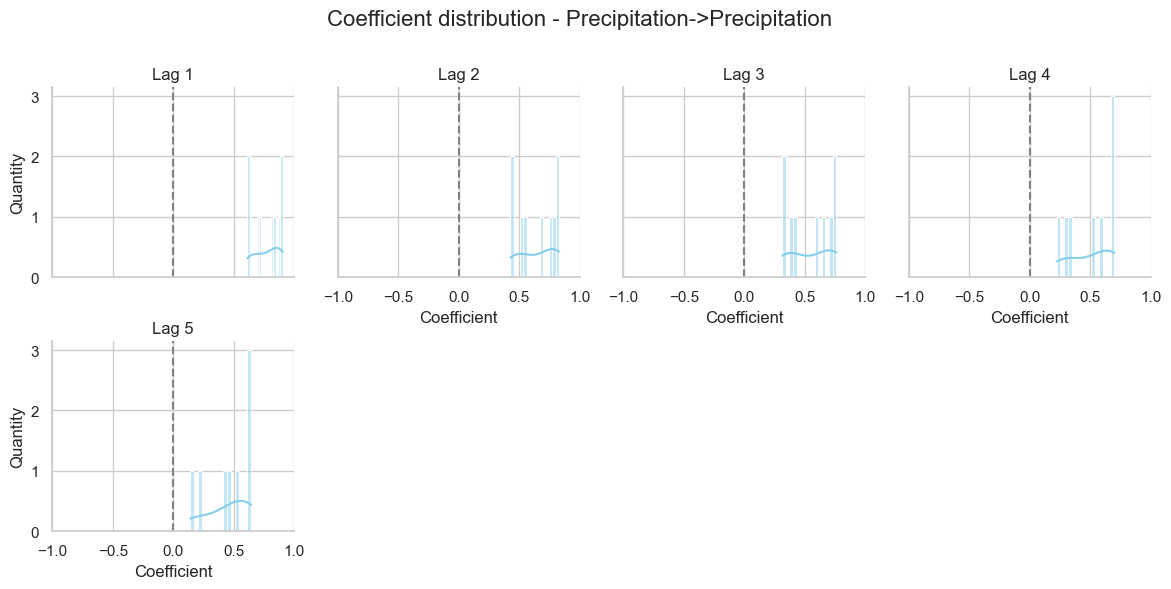

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

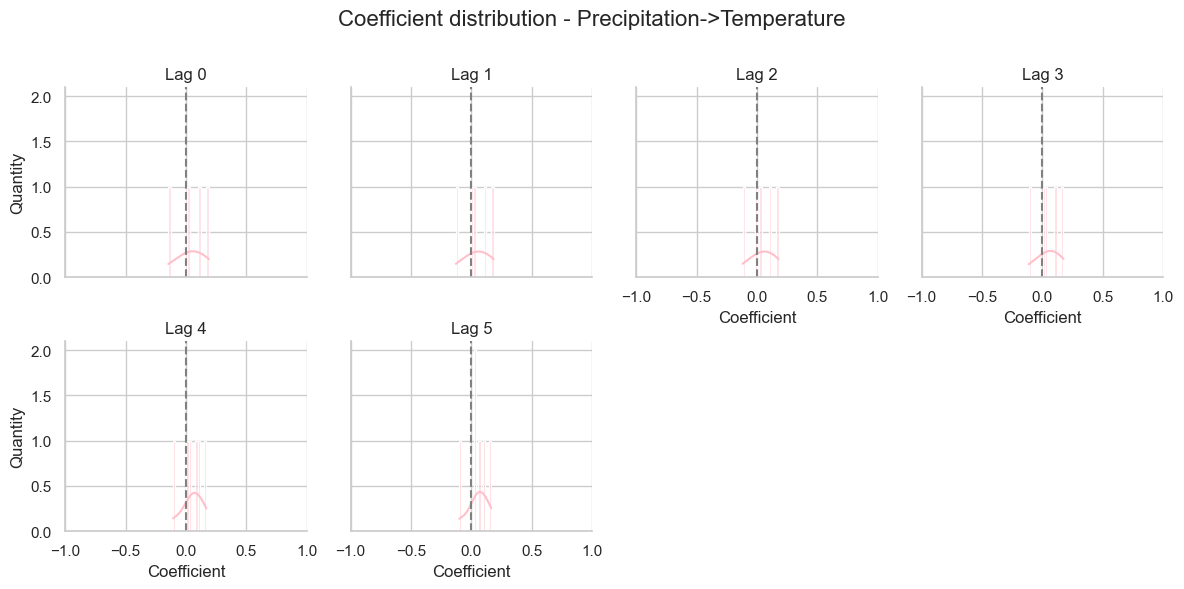

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

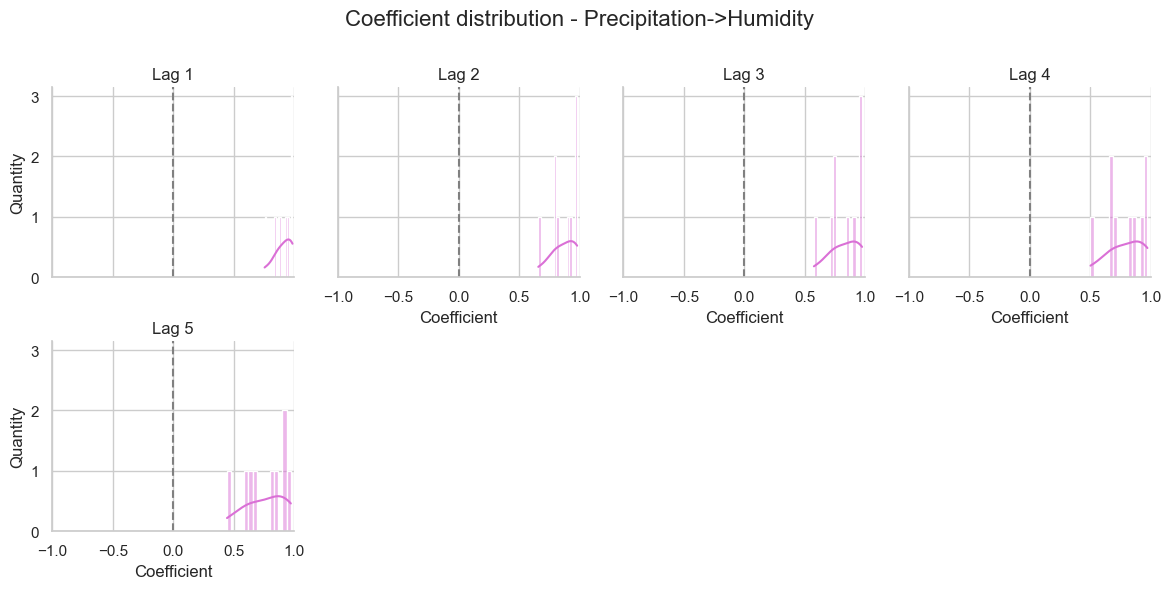

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

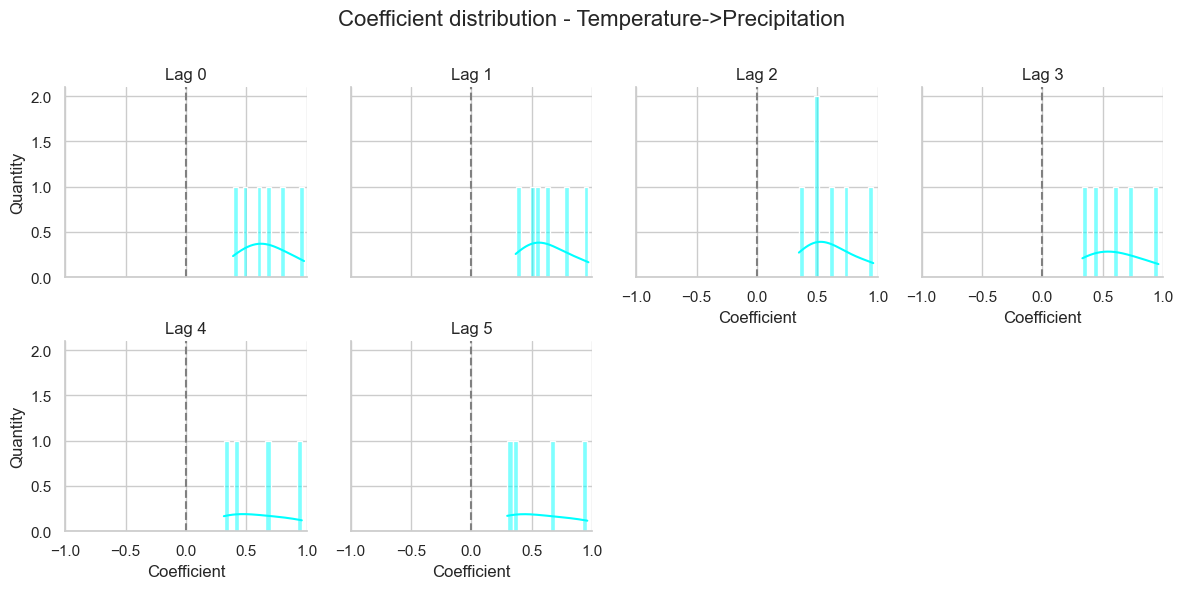

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

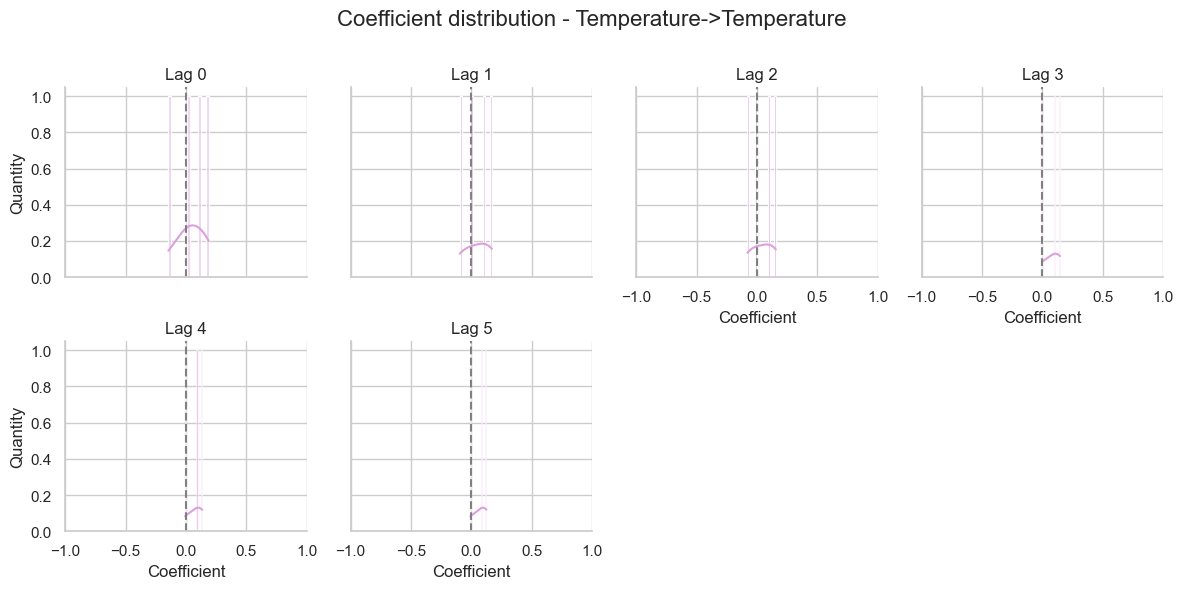

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

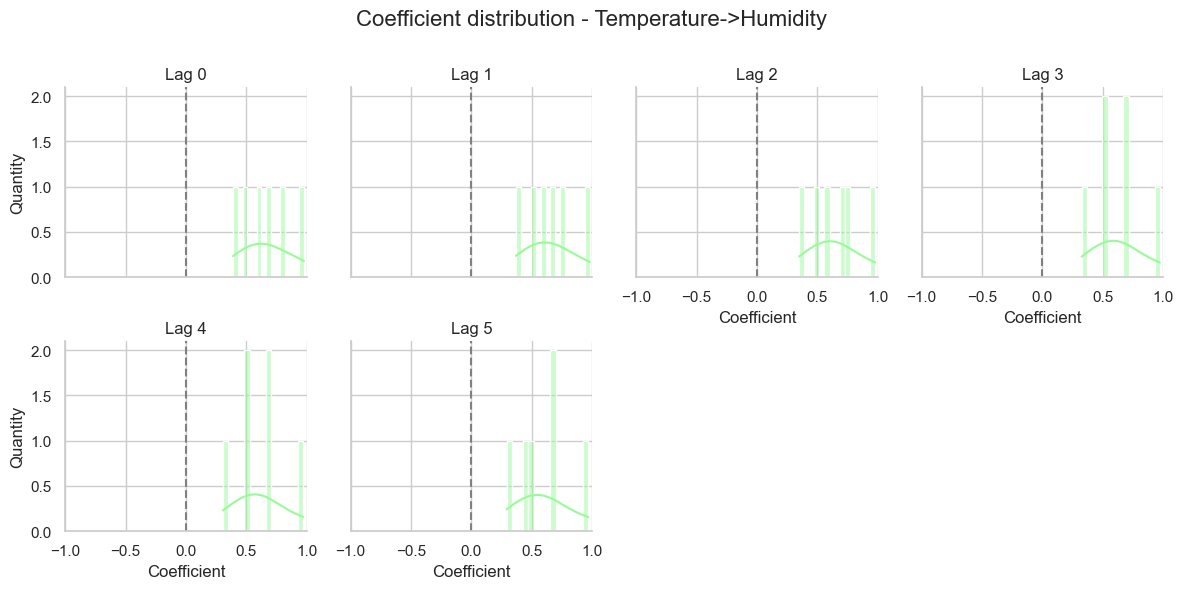

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

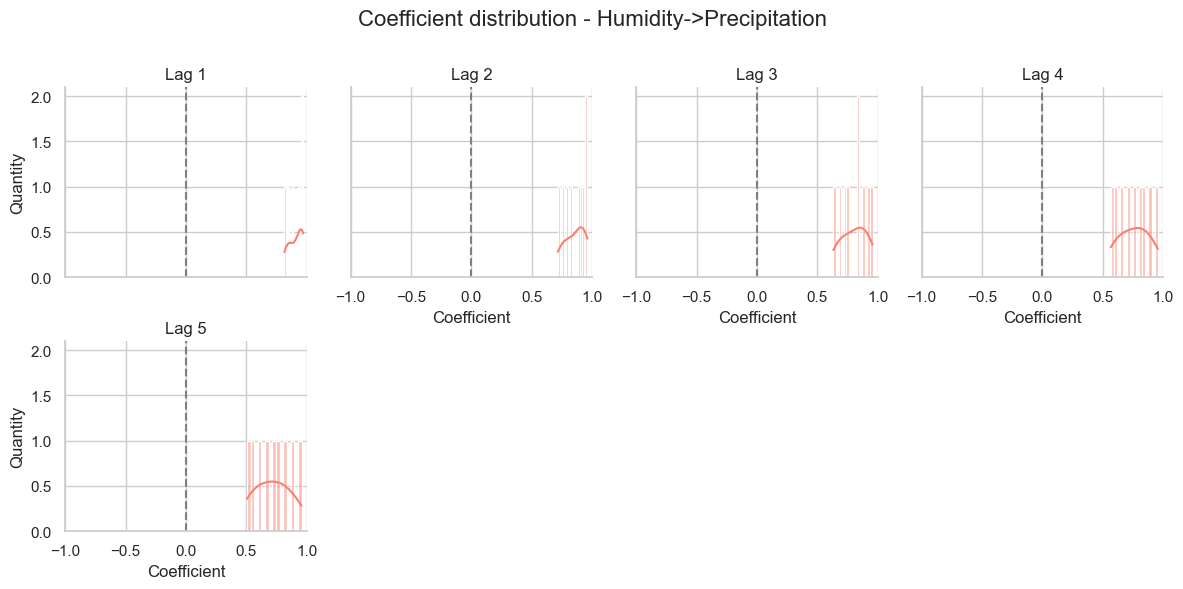

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

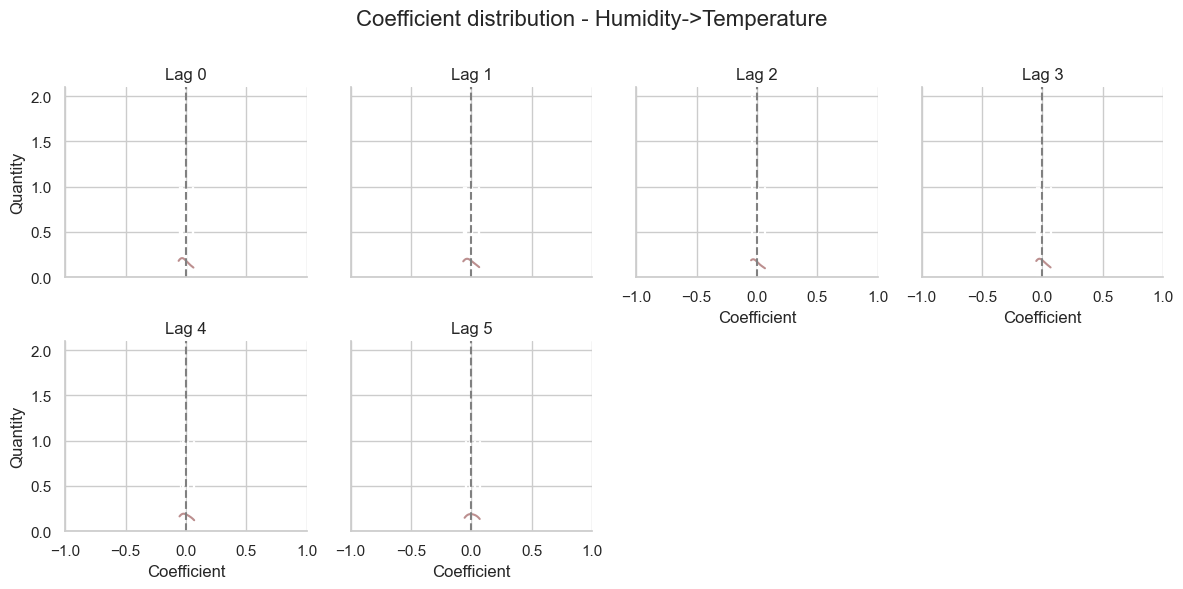

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

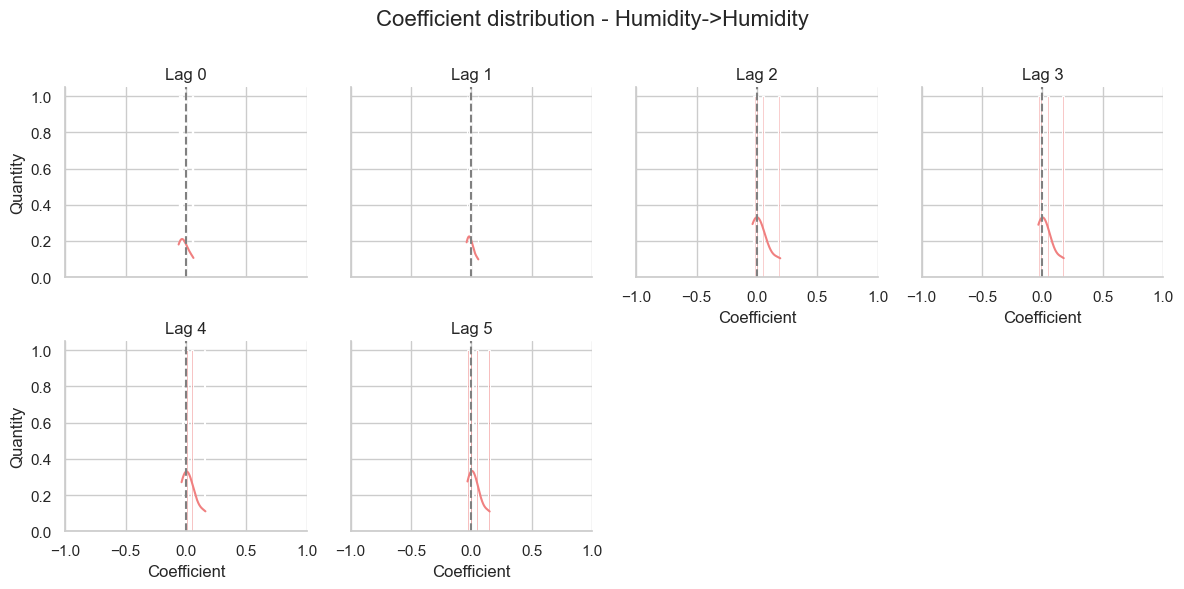

In [260]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0

# Variable relations
variable_pairs = significant_df['var_pair'].unique()

relations_vals = ['Precipitation->Precipitation',
                  'Precipitation->Temperature',
                  'Precipitation->Humidity',
                  'Temperature->Precipitation',
                  'Temperature->Temperature',
                  'Temperature->Humidity',
                  'Humidity->Precipitation',
                  'Humidity->Temperature',
                  'Humidity->Humidity',]

colors = ['skyblue',
          'pink',
          'orchid',
          'cyan',
          'plum',
          'palegreen',
          'salmon',
          'rosybrown',
          'lightcoral']


with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_heavy_events.pdf") as pdf:

    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]
        
        
        if subset.empty:
            print(f"⚠️ No hay datos para el par: {pair}")
            continue  # Salta a la siguiente iteración si no hay datos


        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_heavy_events.csv")

# <font color='magenta'>*Cumulative Precipitation- Heavy Events*</font>

In [261]:

# Filter data_coef with precipitation threshold
filtered_precip_data = data_coef[
    (data_coef["cumulative_precipitation"] > 30)].copy()

# Now run the same logic as before to extract significant lags and coefs
rows = []
for idx, row in filtered_precip_data.iterrows():
    for var_pair in significant_lags:
        lags = literal_eval(row[var_pair])        
        coef_key = var_pair.replace('_elem', '_coef')
        coefs = literal_eval(row[coef_key])        

        for lag in lags:
            if lag < len(coefs):
                coef = coefs[lag]
                rows.append({
                    "row_index": idx,
                    "var_pair": coef_key.replace('_coef', ''),
                    "lag": lag,
                    "coef": coef,
                    "precip": row["mean precipitation"]  # optional to keep for later
                })

significant_precip_df = pd.DataFrame(rows)

In [262]:
num_eventos = len(filtered_precip_data)

print(f"{num_eventos} Heavy Events")

5 Heavy Events


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

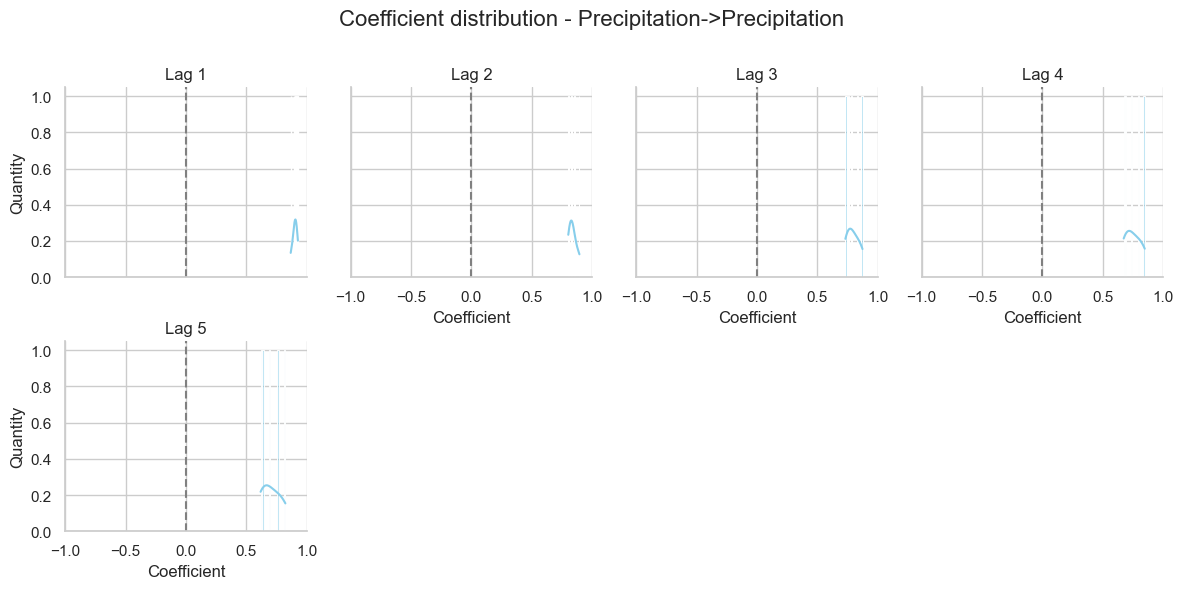

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

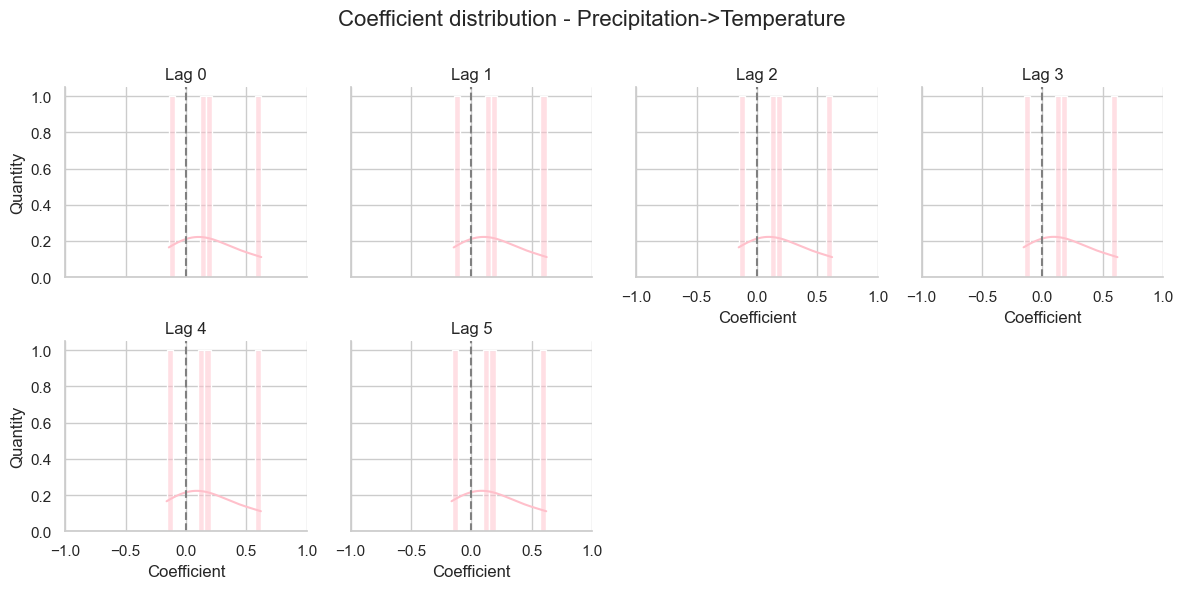

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

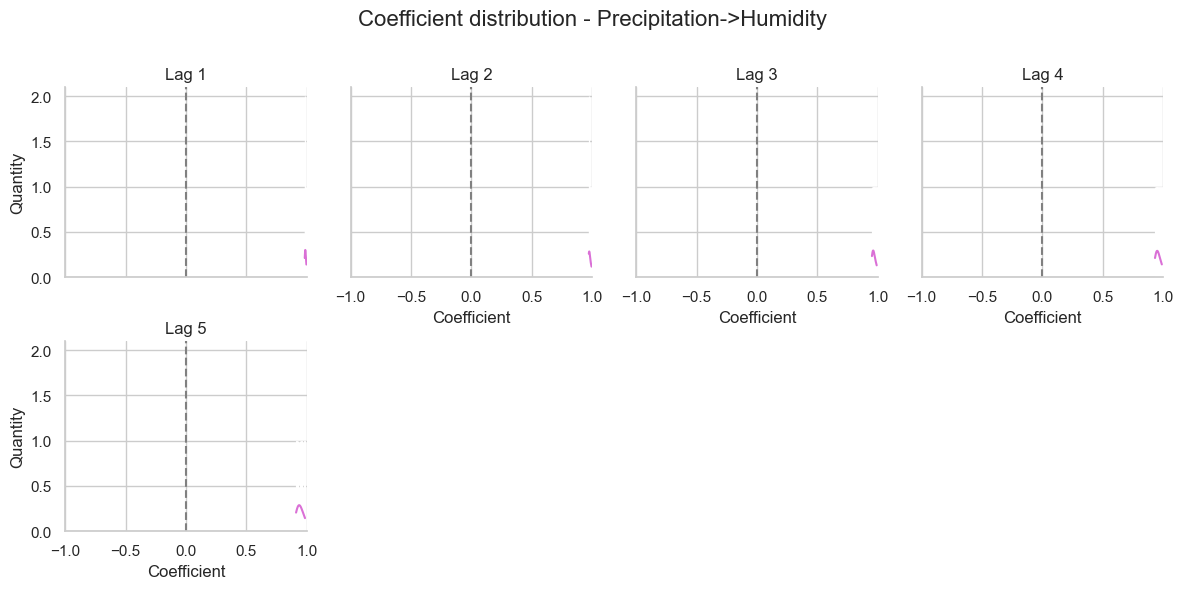

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

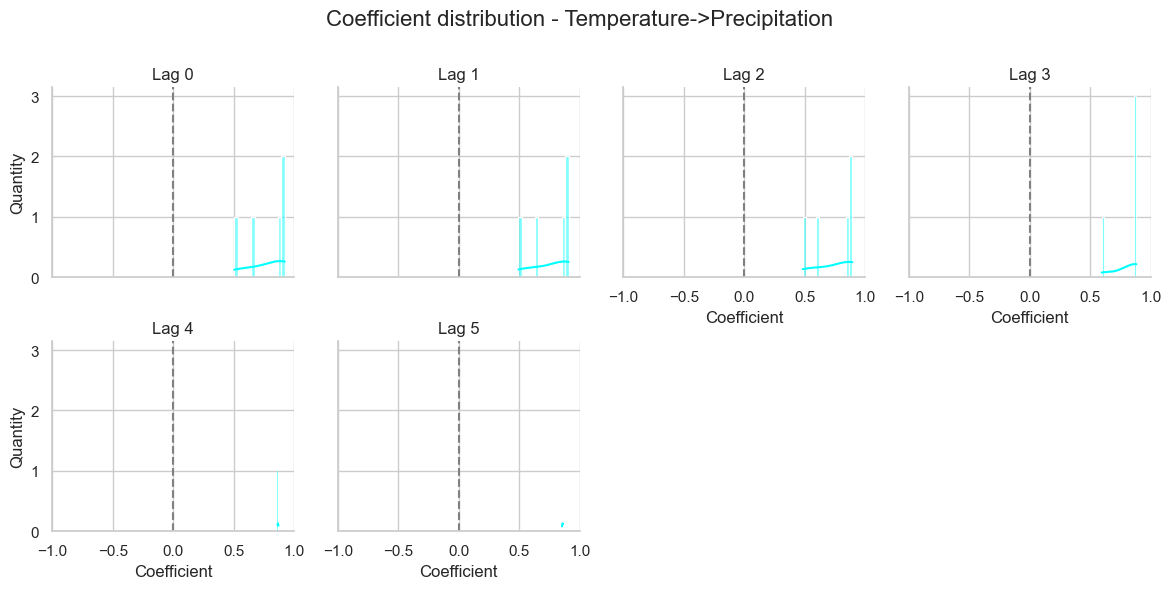

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

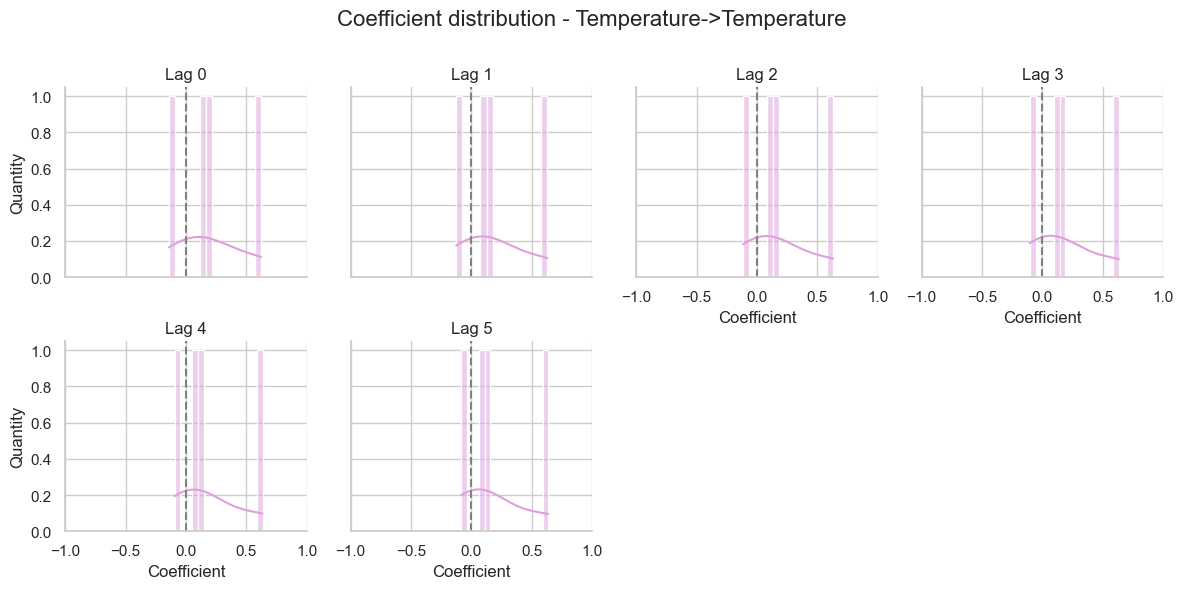

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

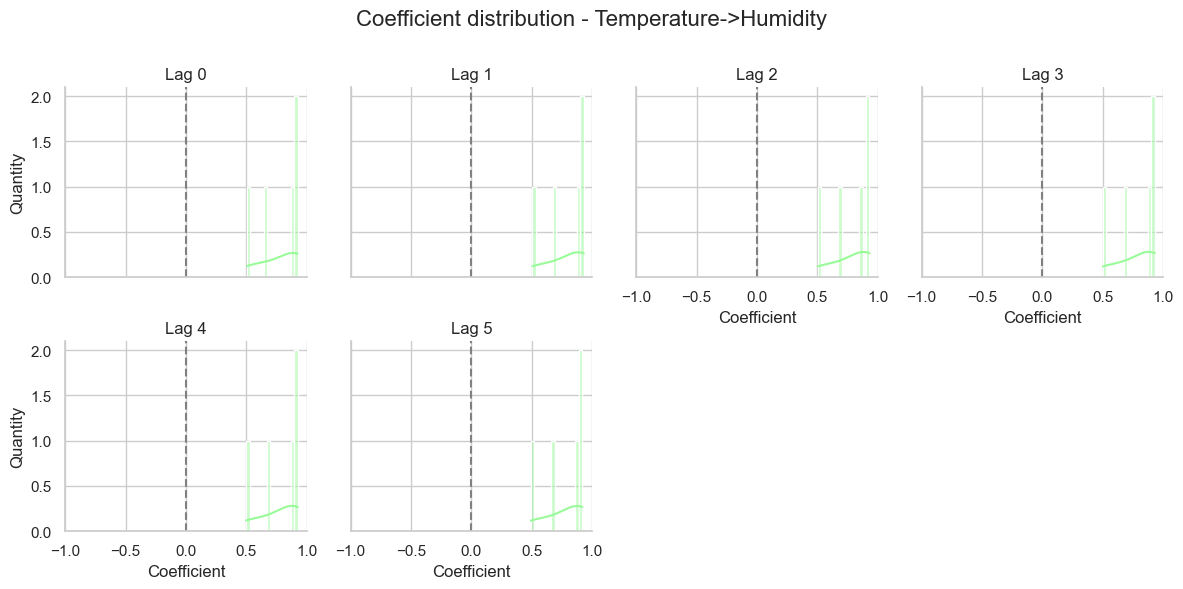

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

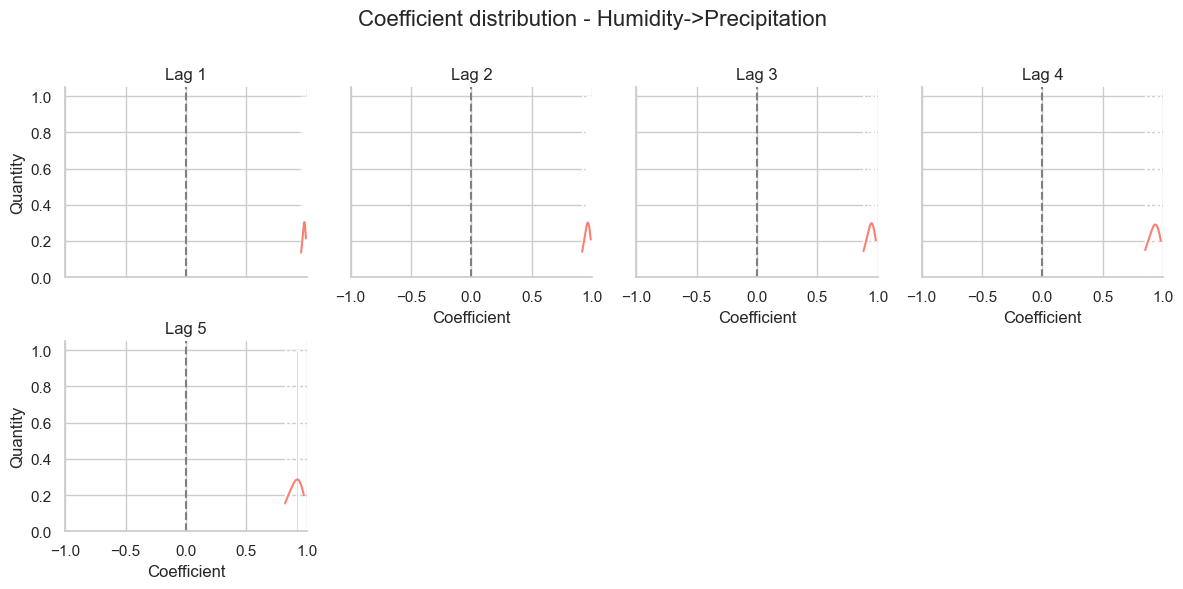

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

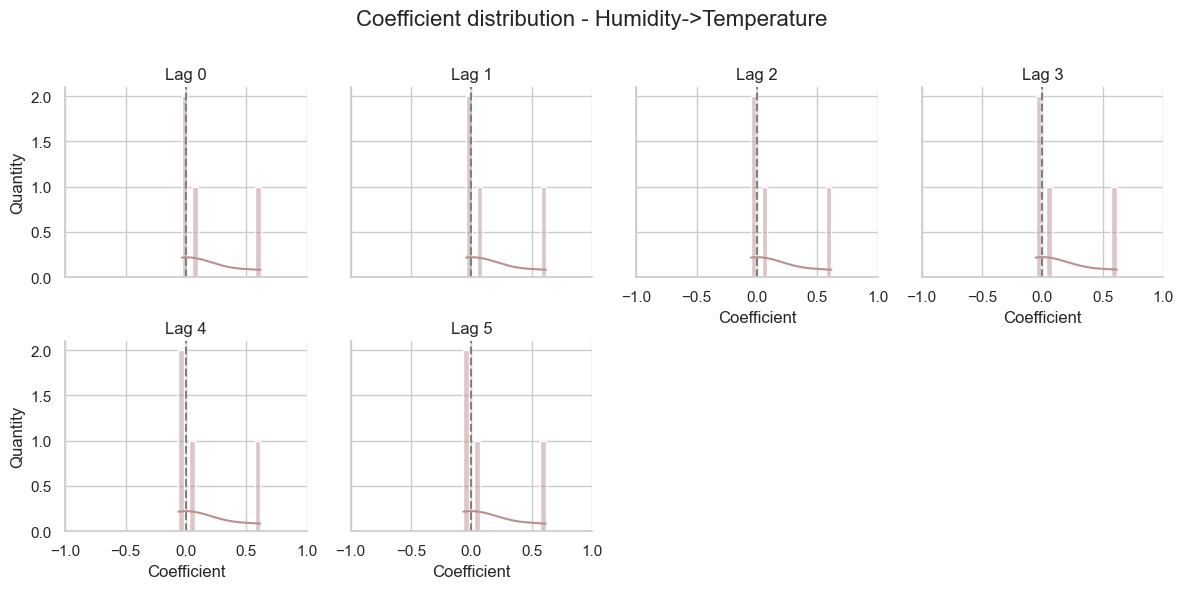

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

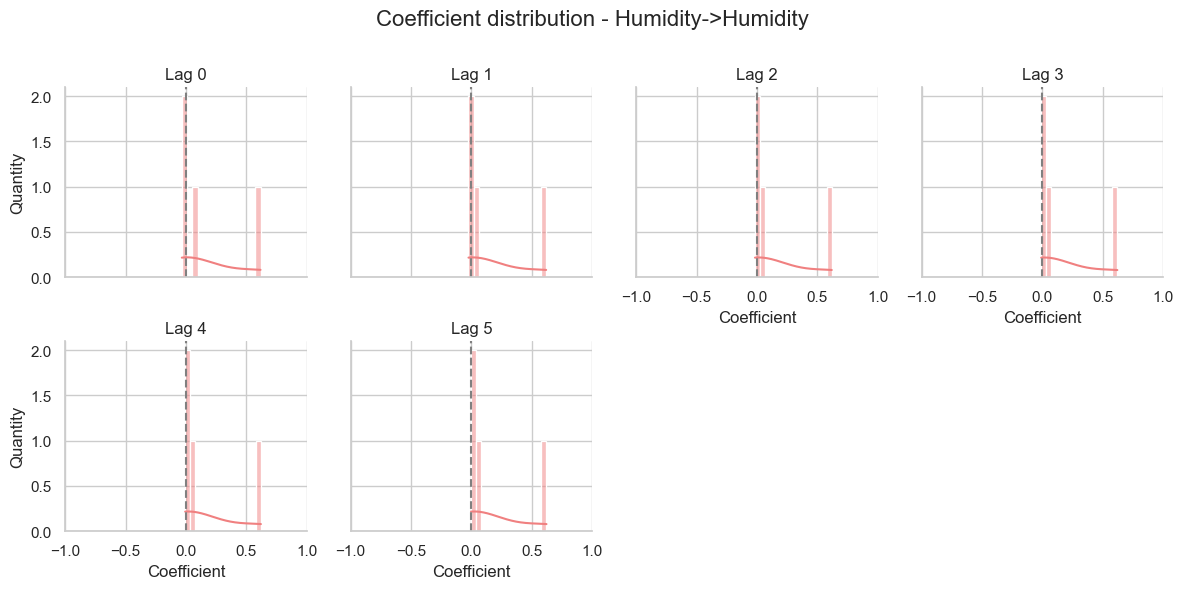

In [263]:
############################# Histograms of magnitude of significant coefficients ###############################################
sns.set(style="whitegrid")

a=0

with PdfPages(path + f"plots/{site}_robust_coefficient_significance_distribution_rain_cumulative_heavy_events.pdf") as pdf:

    summary_rows = []
    
    for pair in variable_pairs:
        subset = significant_precip_df[significant_precip_df['var_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coef', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")

        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()

        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1

        for lag_val in subset['lag'].unique():
            lag_subset = subset[subset['lag'] == lag_val]
            coefs = lag_subset['coef'].dropna()

            if len(coefs) == 0:
                continue

            total = len(coefs)
            pct_positive = (coefs > 0).sum() / total * 100
            pct_negative = (coefs < 0).sum() / total * 100
            pct_above_05 = (coefs > 0.5).sum() / total * 100
            pct_below_m05 = (coefs < -0.5).sum() / total * 100

            summary_rows.append({
                "variable_pair": pair,
                "lag": lag_val,
                "n": total,
                "% positive": round(pct_positive, 2),
                "% negative": round(pct_negative, 2),
                "% > 0.5": round(pct_above_05, 2),
                "% < -0.5": round(pct_below_m05, 2)
            })
        

    # ----- Save summary table -----
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(path + f"Percentages of Events/{site}_coefficient_summary_rain_cumulative_heavy_events.csv", index=False)

In [ ]:
################################### Plotting ###############################################

In [152]:
# Positive Correlations
lags_p_p_p = []
lags_p_t_p = []
lags_p_h_p = []
lags_t_p_p= []
lags_t_t_p = []
lags_t_h_p = []
lags_h_p_p = []
lags_h_t_p = []
lags_h_h_p = []

#Contains arrays with positive lags
pos_coef_lags = [lags_p_p_p,
                lags_p_t_p,
                lags_p_h_p,
                lags_t_p_p,
                lags_t_t_p,
                lags_t_h_p,
                lags_h_p_p,
                lags_h_t_p,
                lags_h_h_p
               ]

###############################################################


#Number of relations
a=0

#Number of lags
b=0



for element in lags[5]:
    
    if element == 0.0:
        pos_coef_lags[a].append(element)
        
    a = a + 1
    if a == 9:
        a = 0


In [153]:
num_pos_coefs_of_5 = []

a=0

for i in pos_coef_lags:
    num_pos_coefs_of_5.append(len(i))
    


In [154]:
num_of_coefs = [num_pos_coefs_of_0,
                num_pos_coefs_of_1,
                num_pos_coefs_of_2,
                num_pos_coefs_of_3,
                num_pos_coefs_of_4,
                num_pos_coefs_of_5]


In [155]:
for i in num_of_coefs:
    print(i)

[84, 0, 0, 0, 84, 0, 0, 0, 84]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [156]:
# Create column names for each causal relation
columns = ['P_P', 'P_T', 'P_H', 'T_P', 'T_T', 'T_H', 'H_P', 'H_T', 'H_H']

# Create DataFrame
df = pd.DataFrame(num_of_coefs, columns=columns)

# Add time lag as a column
df.insert(0, 'Time_Lag', list(range(6)))

# Save to CSV
df.to_csv(path + f'{site}_robust_no_correlation_coefficients_extended.csv', index=False)



In [33]:
###############################################################################################

In [157]:
# Load data
pos = pd.read_csv(path + f'{site}_robust_positive_coefficients_extended.csv')
neg = pd.read_csv(path + f'{site}_robust_negative_coefficients_extended.csv')
no_corr = pd.read_csv(path + f'{site}_robust_no_correlation_coefficients_extended.csv')

# Remove 'Time_Lag' for calculations
pos_vals = pos.drop(columns='Time_Lag')
neg_vals = neg.drop(columns='Time_Lag')
no_corr_vals = no_corr.drop(columns='Time_Lag')

# Total number of cases (assumed = sum of the three for each cell)
total = pos_vals + neg_vals + no_corr_vals

# Compute percentages
pos_pct = (pos_vals / total) * 100
neg_pct = (neg_vals / total) * 100
no_corr_pct = (no_corr_vals / total) * 100

In [158]:
pos_pct

P_P        P_T        P_H        T_P        T_T        T_H  \
0   0.000000  50.000000  50.000000  50.000000   0.000000  50.000000   
1  73.809524  42.857143  52.380952  48.809524  92.857143  83.333333   
2  76.190476  42.857143  53.571429  59.523810  96.428571  80.952381   
3  72.619048  52.380952  51.190476  57.142857  92.857143  79.761905   
4  79.761905  47.619048  50.000000  52.380952  96.428571  77.380952   
5  73.809524  48.809524  54.761905  54.761905  90.476190  77.380952   

         H_P        H_T        H_H  
0  50.000000  50.000000   0.000000  
1  53.571429  92.857143  86.904762  
2  63.095238  90.476190  86.904762  
3  55.952381  88.095238  88.095238  
4  57.142857  88.095238  88.095238  
5  50.000000  85.714286  86.904762

In [159]:
neg_pct

P_P        P_T        P_H        T_P       T_T        T_H        H_P  \
0   0.000000  50.000000  50.000000  50.000000  0.000000  50.000000  50.000000   
1  26.190476  57.142857  47.619048  51.190476  7.142857  16.666667  46.428571   
2  23.809524  57.142857  46.428571  40.476190  3.571429  19.047619  36.904762   
3  27.380952  47.619048  48.809524  42.857143  7.142857  20.238095  44.047619   
4  20.238095  52.380952  50.000000  47.619048  3.571429  22.619048  42.857143   
5  26.190476  51.190476  45.238095  45.238095  9.523810  22.619048  50.000000   

         H_T        H_H  
0  50.000000   0.000000  
1   7.142857  13.095238  
2   9.523810  13.095238  
3  11.904762  11.904762  
4  11.904762  11.904762  
5  14.285714  13.095238

In [160]:
no_corr_pct

P_P  P_T  P_H  T_P    T_T  T_H  H_P  H_T    H_H
0  100.0  0.0  0.0  0.0  100.0  0.0  0.0  0.0  100.0
1    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0
2    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0
3    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0
4    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0
5    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0

In [162]:

relations = pos_pct.columns  # ['Causal_Relation_0', ..., 'Causal_Relation_8']

relations_vals = ['Precipitation->Precipitation',
                  'Precipitation->Temperature',
                  'Precipitation->Humidity',
                  'Temperature->Precipitation',
                  'Temperature->Temperature',
                  'Temperature->Humidity',
                  'Humidity->Precipitation',
                  'Humidity->Temperature',
                  'Humidity->Humidity',]
a=0
with PdfPages(path + f"plots/{site}_robust_correlation_distributions_extended_5lg.pdf") as pdf:
    for relation in relations:
        pos_vals = pos_pct[relation].values
        neg_vals = neg_pct[relation].values
        no_vals = no_corr_pct[relation].values

        x = list(range(len(pos_vals)))  # Time lags
        width = 0.6

        fig, ax = plt.subplots(figsize=(9, 5))

        # Draw stacked bars
        bars_pos = ax.bar(x, pos_vals, width=width, label="Positive", color='skyblue')
        bars_neg = ax.bar(x, neg_vals, width=width, bottom=pos_vals, label="Negative", color='orchid')
        bars_no = ax.bar(x, no_vals, width=width, bottom=pos_vals + neg_vals, label="No correlation", color='gray')

        # Add text annotations
        for i in range(len(x)):
            # Text
            y_pos = pos_vals[i] / 2
            y_neg = pos_vals[i] + neg_vals[i] / 2
            y_no = pos_vals[i] + neg_vals[i] + no_vals[i] / 2

            # Write percentages
            ax.text(x[i], y_pos, f"{pos_vals[i]:.1f}%", ha='center', va='center', color='white', fontsize=8)
            ax.text(x[i], y_neg, f"{neg_vals[i]:.1f}%", ha='center', va='center', color='white', fontsize=8)
            ax.text(x[i], y_no, f"{no_vals[i]:.1f}%", ha='center', va='center', color='black', fontsize=8)

        # Aesthetics
        ax.set_xlabel("Time Lag")
        ax.set_ylabel("Percentage (%)")
        ax.set_title(f"Distribution of correlation types: {relations_vals[a]}")
        ax.set_xticks(x)
        ax.set_ylim(0, 100)
        ax.legend()
        plt.tight_layout()

        # Save 
        pdf.savefig(fig)
        plt.close()
        
        a = a+1

print(f"{site}-PDF with histograms saved as '{site}_robust_correlation_distributions_extended.pdf'")


M1-PDF with histograms saved as 'M1_robust_correlation_distributions_extended.pdf'


In [121]:
############## Make histograms of coefficient magnitude ##############

In [14]:
site = "M1"

df = pd.read_csv(f'{site}_robust_extended_continuous_rain_periods.csv')

# List of coefficients
coef_cols = [col for col in df.columns if col.endswith('_coef')]

# Make sure there are no nans
for col in coef_cols:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
    
         
rows = []
lags = list(range(11))

for index, row in df.iterrows():
    for coef_col in coef_cols:
        coef_values = row[coef_col]

        if isinstance(coef_values, list):
            for lag, value in zip(lags, coef_values):
                rows.append({
                    'variable_pair': coef_col.replace('_coef', ''),
                    'lag': lag,
                    'coefficient': value,
                    'duration': row['extended_duration_min'],
                    'precipitation': row['mean precipitation']
                })
        else:
            continue


df_long = pd.DataFrame(rows)

In [26]:
df_long

variable_pair  lag  coefficient  duration  precipitation
0               P_P    0     0.000000      96.0       0.401814
1               P_P    1     0.428231      96.0       0.401814
2               P_P    2     0.202853      96.0       0.401814
3               P_P    3     0.101785      96.0       0.401814
4               P_P    4     0.051420      96.0       0.401814
...             ...  ...          ...       ...            ...
14548           H_H    6     0.435540     138.0       0.610652
14549           H_H    7     0.443203     138.0       0.610652
14550           H_H    8     0.491225     138.0       0.610652
14551           H_H    9     0.498289     138.0       0.610652
14552           H_H   10     0.484177     138.0       0.610652

[14553 rows x 5 columns]

In [31]:
print(np.max(df_long['coefficient'] ))

0.9999985804357071


In [34]:
#Highly Positive Correlations

a=0
for coef in df_long['coefficient'] :
    
    if coef > 0.5:
        print(f"{df_long['variable_pair'][a]} : {coef}, Rain mean: {df_long['precipitation'][a]}, Duration: {float(df_long['duration'][a])/2}")
        
    a = a+1

T_T : 0.823463004719528, Rain mean: 0.4018144329896908, Duration: 48.0
T_T : 0.7245391625174067, Rain mean: 0.4018144329896908, Duration: 48.0
T_T : 0.6409530167087973, Rain mean: 0.4018144329896908, Duration: 48.0
T_T : 0.5787627991166329, Rain mean: 0.4018144329896908, Duration: 48.0
T_T : 0.5208771526112245, Rain mean: 0.4018144329896908, Duration: 48.0
H_H : 0.7130618878552083, Rain mean: 0.4018144329896908, Duration: 48.0
H_H : 0.5355621871490128, Rain mean: 0.4018144329896908, Duration: 48.0
T_H : 0.9138241084407922, Rain mean: 0.2358780487804877, Duration: 20.0
T_H : 0.9683958975053621, Rain mean: 0.5170819672131146, Duration: 30.0
H_T : 0.9683958975053621, Rain mean: 0.5170819672131146, Duration: 30.0
P_P : 0.529403374094433, Rain mean: 0.5831232876712329, Duration: 73.0
P_P : 0.5436637106543519, Rain mean: 0.5831232876712329, Duration: 73.0
T_T : 0.723768842819349, Rain mean: 0.5831232876712329, Duration: 73.0
T_T : 0.7772306189049454, Rain mean: 0.5831232876712329, Duration: 

In [36]:
#Highly Negative Correlations

a=0
for coef in df_long['coefficient'] :
    
    if coef < -0.5:
        print(f"{df_long['variable_pair'][a]} : {coef}, Rain mean: {df_long['precipitation'][a]}, Duration: {float(df_long['duration'][a])/2}")
        
    a = a+1

T_H : -0.6769922319754313, Rain mean: 0.7442777777777778, Duration: 27.0
H_T : -0.6769922319754313, Rain mean: 0.7442777777777778, Duration: 27.0
T_H : -0.571552489035299, Rain mean: 5.173445544554456, Duration: 50.0
T_H : -0.5109280568672543, Rain mean: 5.173445544554456, Duration: 50.0
H_T : -0.571552489035299, Rain mean: 5.173445544554456, Duration: 50.0
H_T : -0.5514715857921892, Rain mean: 5.173445544554456, Duration: 50.0
H_T : -0.5303696191680527, Rain mean: 5.173445544554456, Duration: 50.0
H_T : -0.5122879567278231, Rain mean: 5.173445544554456, Duration: 50.0
T_H : -0.6111599053877157, Rain mean: 0.2567128712871286, Duration: 50.0
T_H : -0.536513395794369, Rain mean: 0.2567128712871286, Duration: 50.0
H_T : -0.6111599053877157, Rain mean: 0.2567128712871286, Duration: 50.0
H_T : -0.5313602293651338, Rain mean: 0.2567128712871286, Duration: 50.0
T_H : -0.6111352980727937, Rain mean: 0.1627857142857142, Duration: 21.0
T_H : -0.7417738761860109, Rain mean: 0.1284285714285714, Du

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


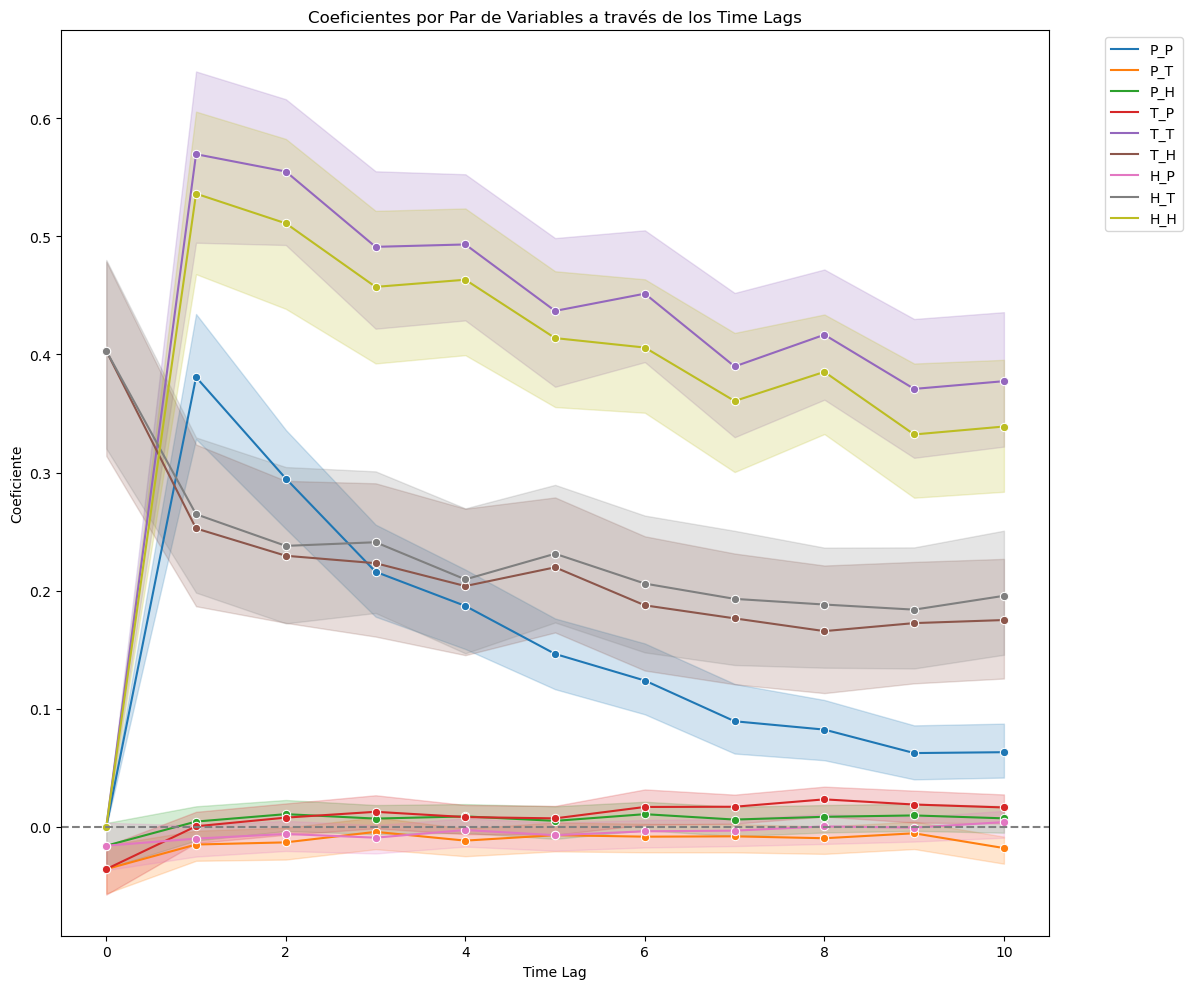

In [15]:

plt.figure(figsize=(12, 10))
sns.lineplot(data=df_long, 
             x='lag', 
             y='coefficient', 
             hue='variable_pair', 
             marker='o')
plt.axhline(0, 
            color='gray', 
            linestyle='--')
plt.title('Coeficientes por Par de Variables a través de los Time Lags')
plt.xlabel('Time Lag')
plt.ylabel('Coeficiente')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

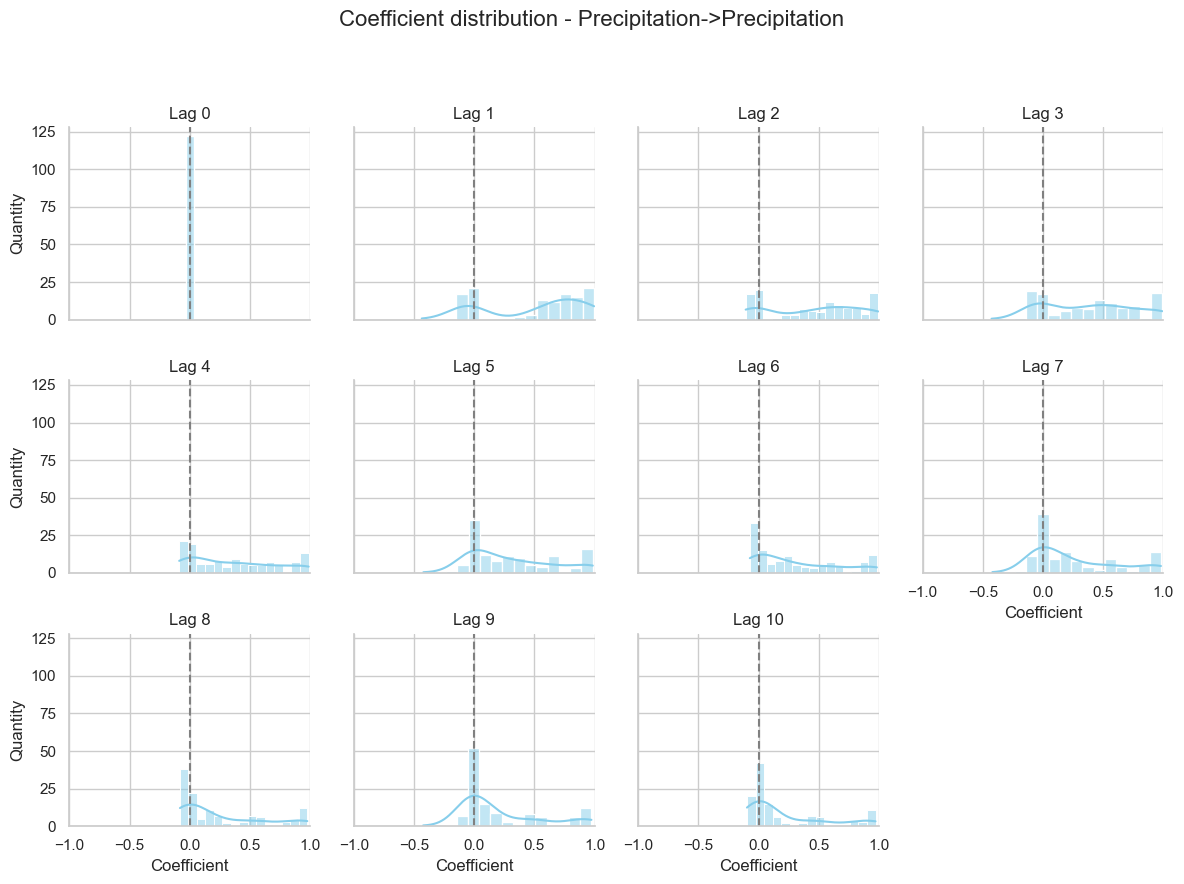

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

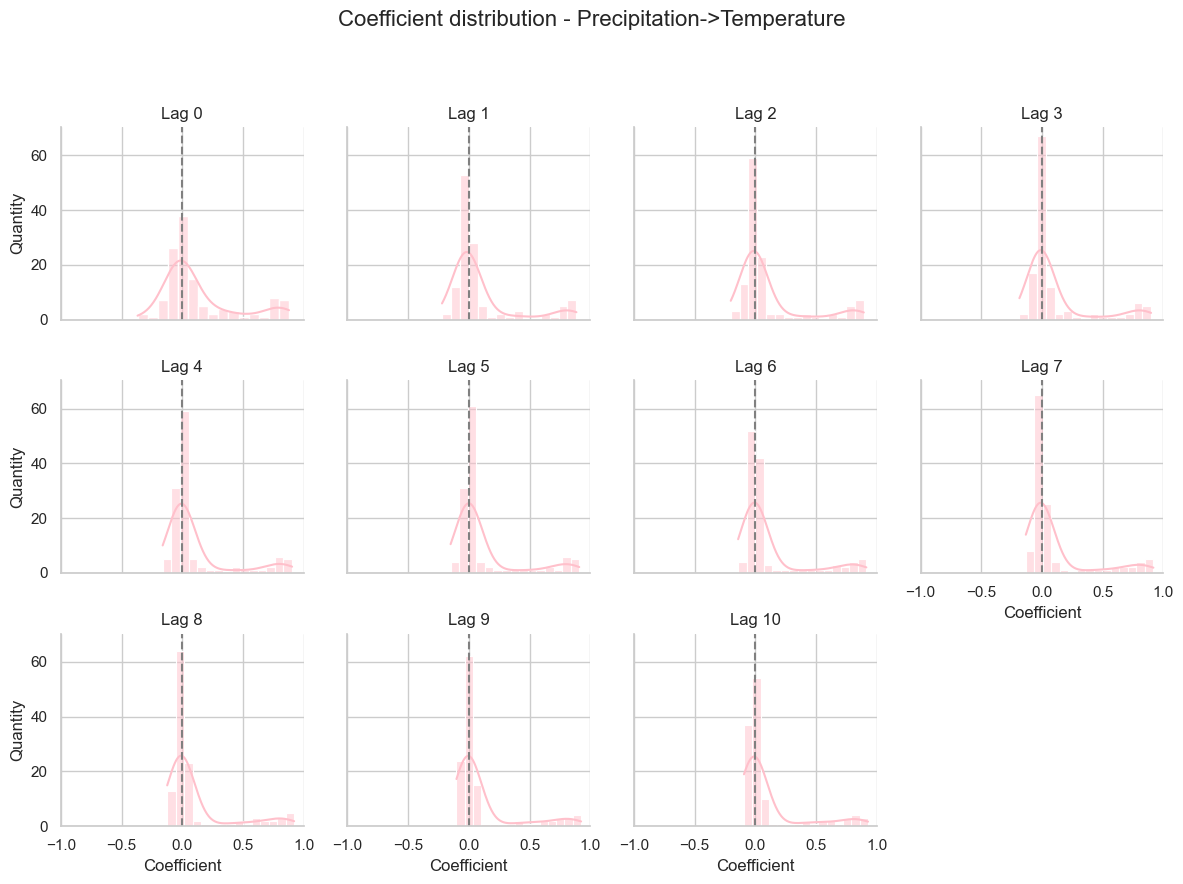

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

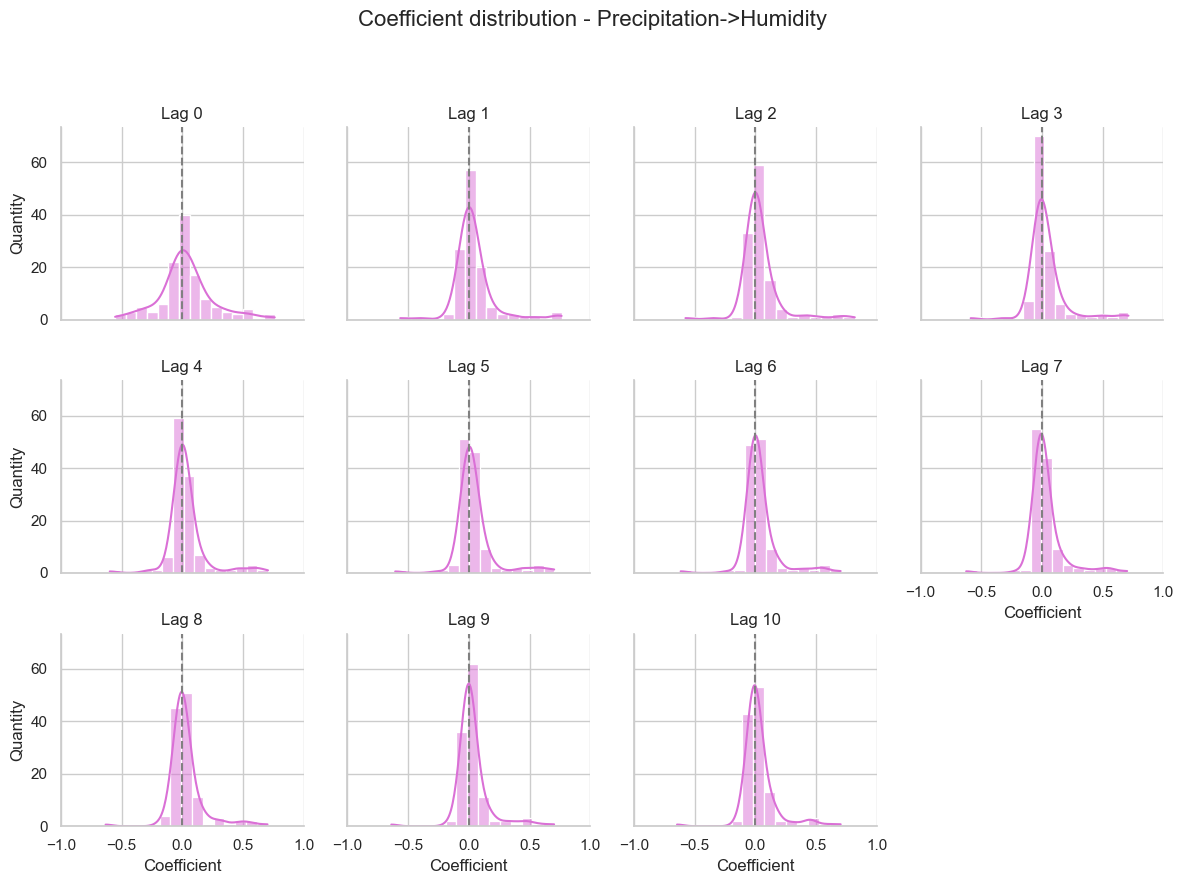

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

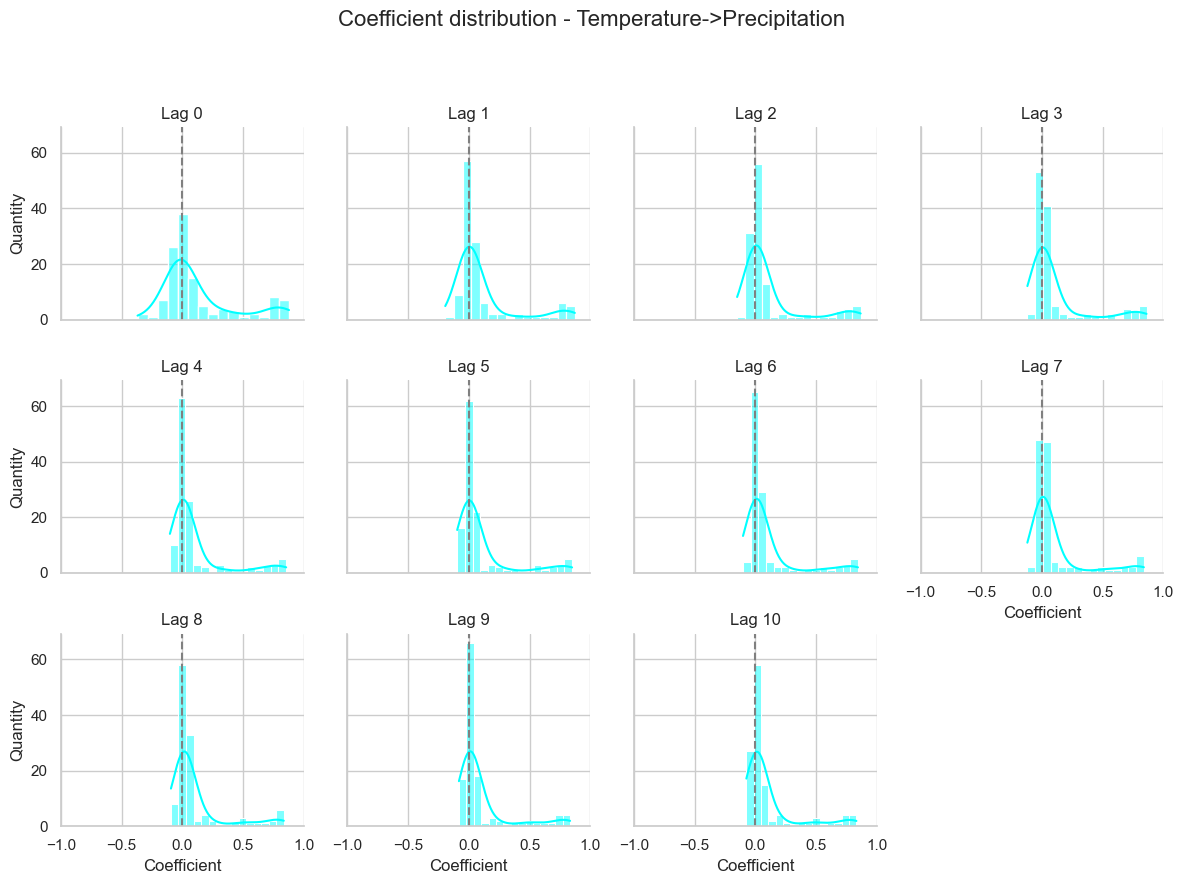

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

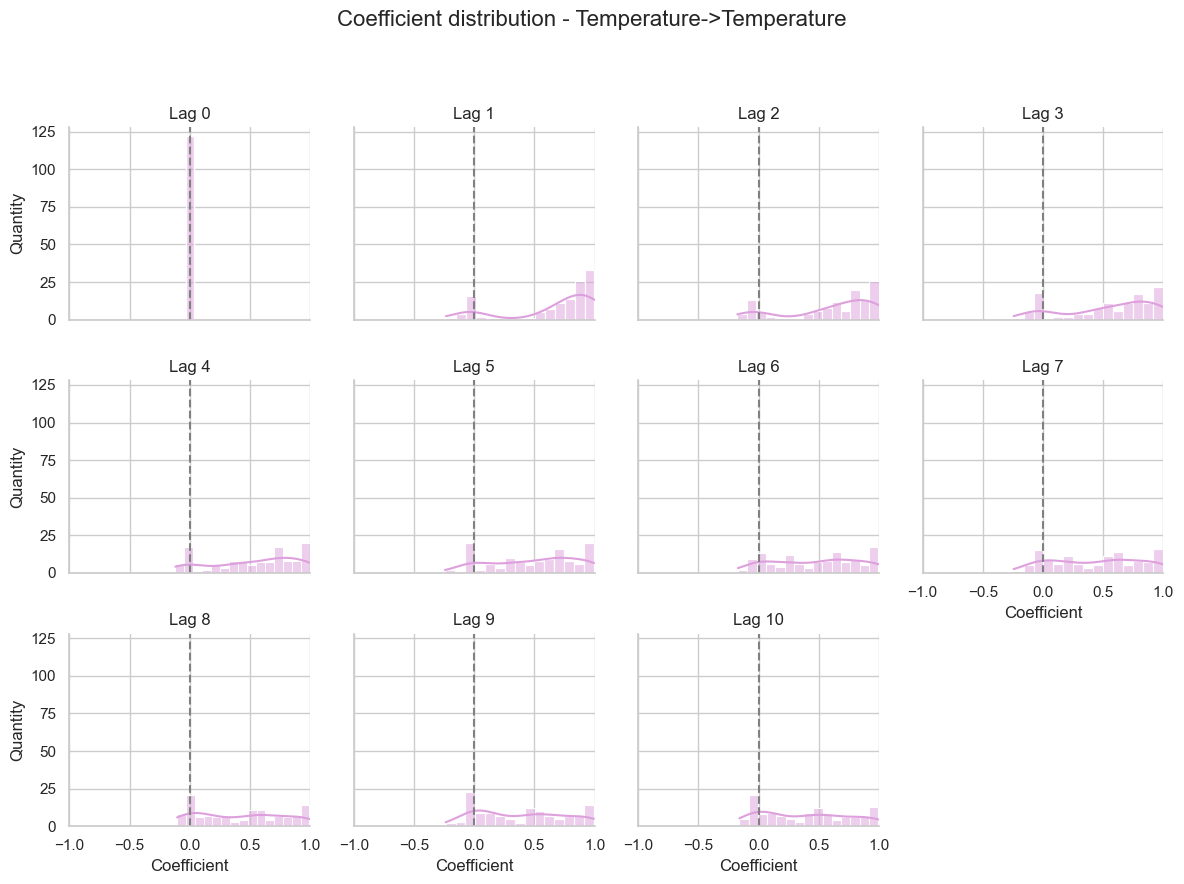

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

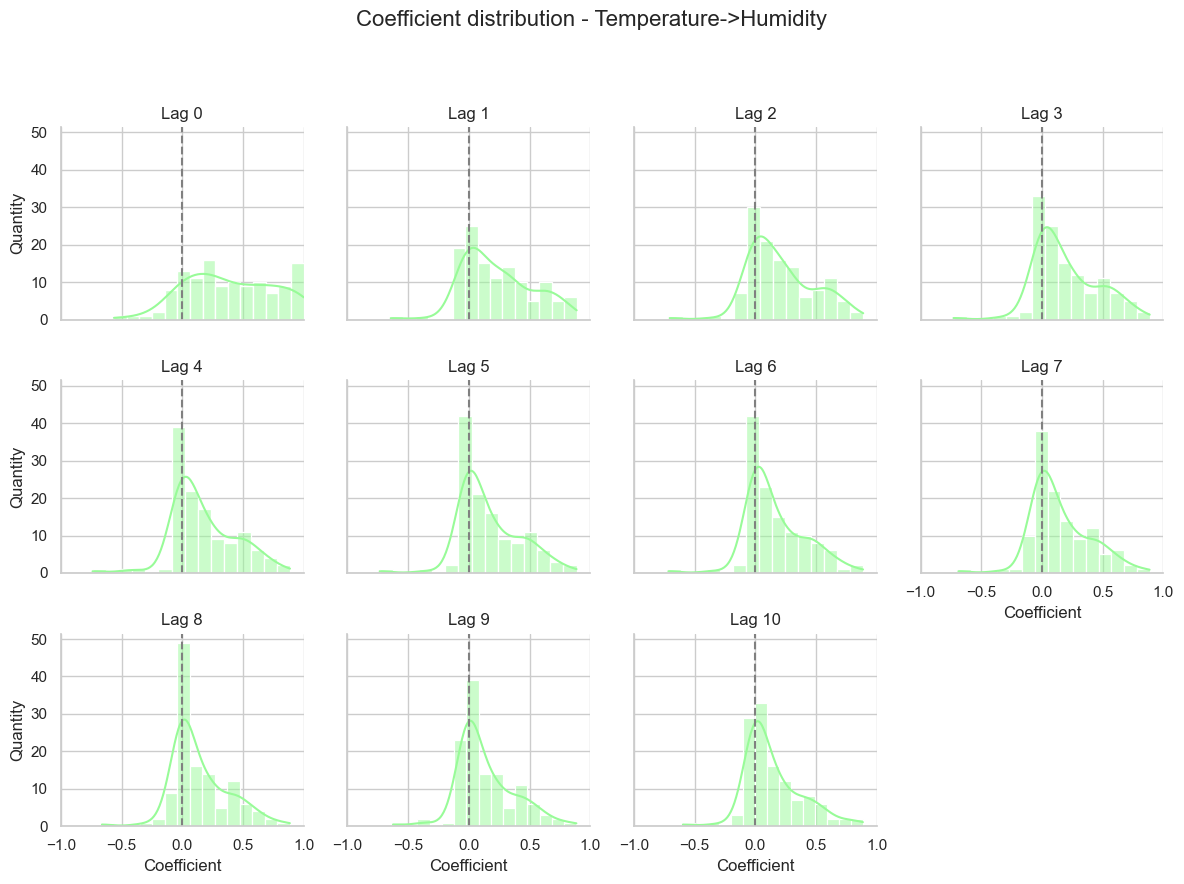

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

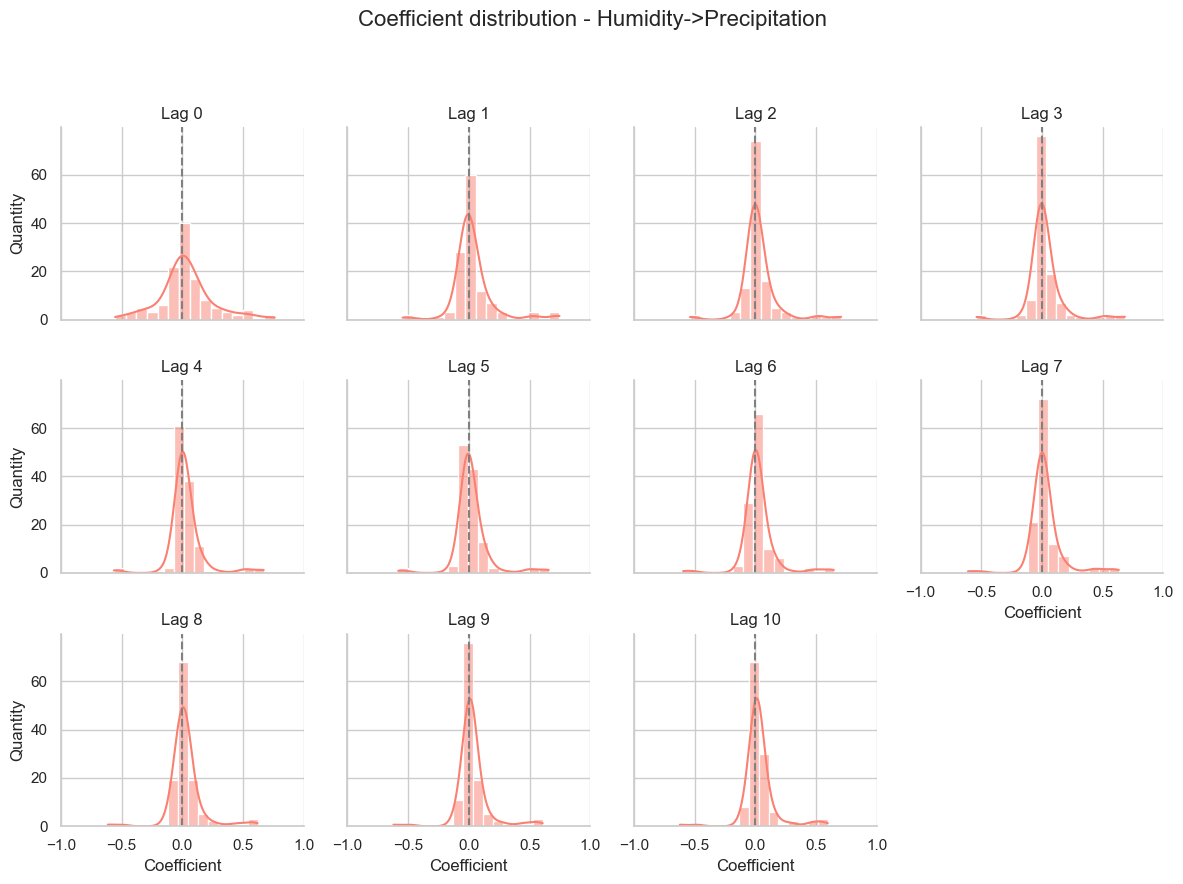

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

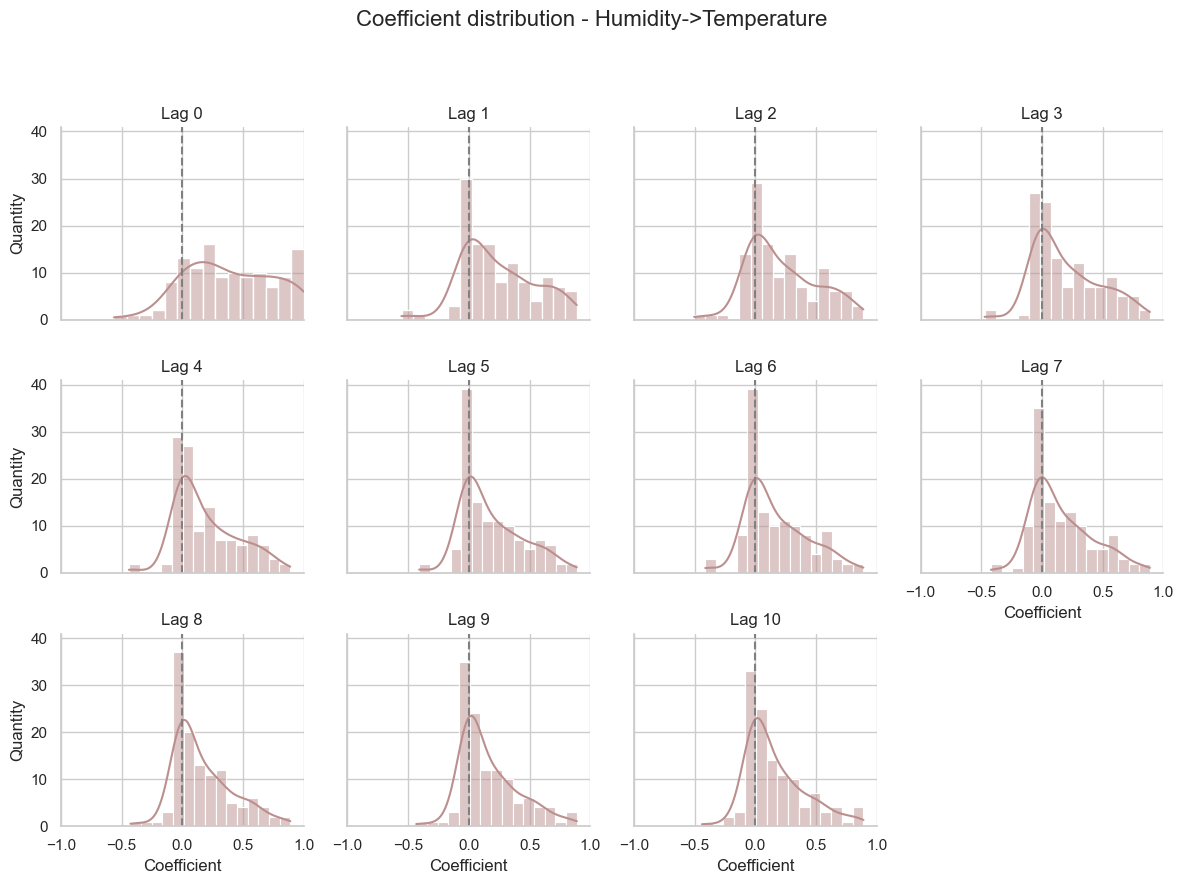

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

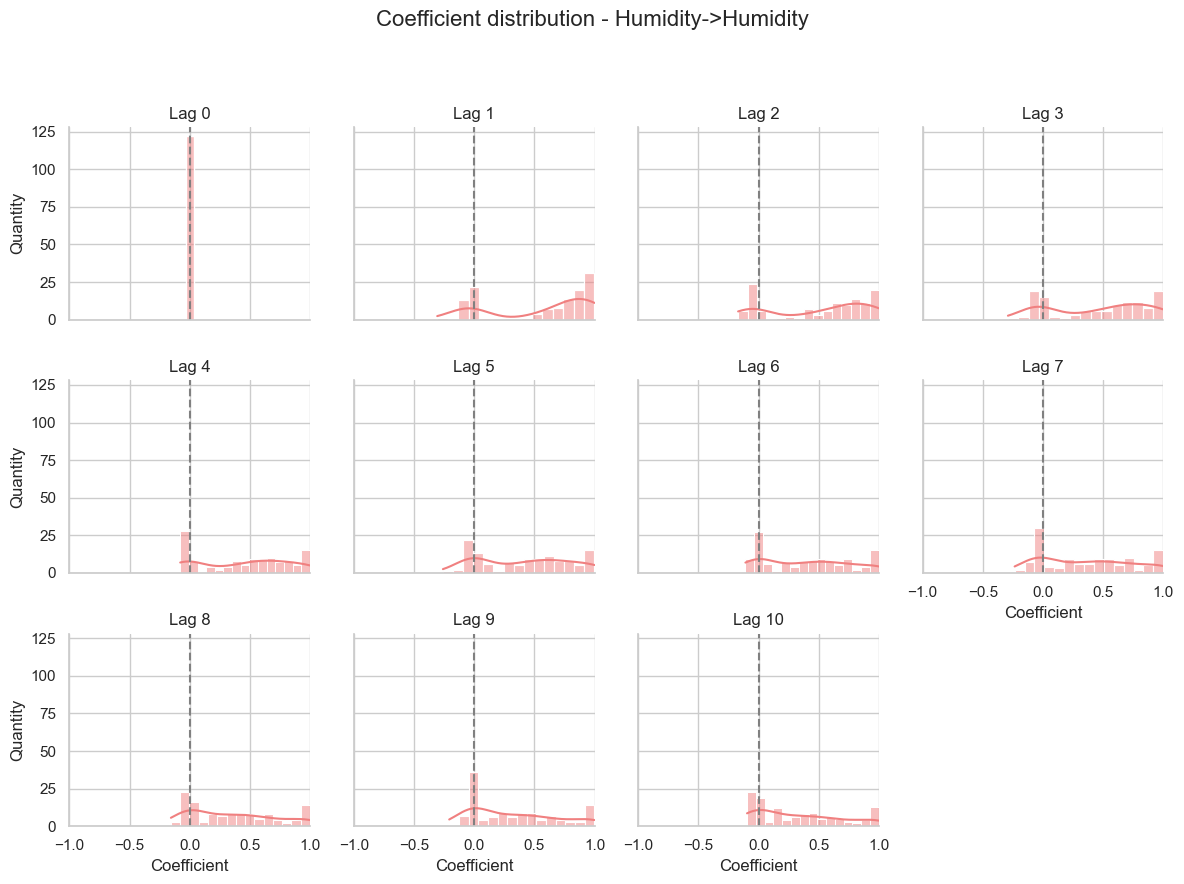

In [135]:
# Variable relations
variable_pairs = df_long['variable_pair'].unique()

relations_vals = ['Precipitation->Precipitation',
                  'Precipitation->Temperature',
                  'Precipitation->Humidity',
                  'Temperature->Precipitation',
                  'Temperature->Temperature',
                  'Temperature->Humidity',
                  'Humidity->Precipitation',
                  'Humidity->Temperature',
                  'Humidity->Humidity',]

colors = ['skyblue',
          'pink',
          'orchid',
          'cyan',
          'plum',
          'palegreen',
          'salmon',
          'rosybrown',
          'lightcoral']

################################### Plotting ###############################################
sns.set(style="whitegrid")

a=0
with PdfPages(f"{site}_robust_coefficient_magnitude_distributions_extended.pdf") as pdf:
    
    for pair in variable_pairs:
        subset = df_long[df_long['variable_pair'] == pair]

        g = sns.FacetGrid(subset, col='lag', col_wrap=4, height=3, sharex=True, sharey=True)
        g.map_dataframe(sns.histplot, x='coefficient', bins=15, kde=True, color=colors[a])
        g.set_titles("Lag {col_name}")
        
        g.set_axis_labels("Coefficient", "Quantity")
        g.fig.suptitle(f'Coefficient distribution - {relations_vals[a]}', fontsize=16)

        # Línea en 0
        for ax in g.axes.flat:
            ax.axvline(0, color='gray', linestyle='--')
            ax.set_xlim(-1.0, 1.0)

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Para que no se superponga el título
        plt.show()
        
        # Save 
        pdf.savefig(g.fig)
        plt.close()

        a=a+1
